# Smokers-EDA+Catboost



https://drive.google.com/file/d/1XQ7LqTk9uP4lbu4wR9w0KnKF8qvv2XsE


**Цель данного эссе** — разработка модели машинного обучения для идентификации курильщиков среди всех представленных в выборке людей. Модель должна эффективно разделять individuals на две категории — курящие и некурящие — на основе предоставленных медицинских и демографических признаков."


**"Цель исследовательского анализа** — комплексное исследование признаков перед построением модели с выявлением их прогностической значимости. В процессе предстоит обнаружить интересные закономерности в данных, построить  визуализации и сформулировать выводы о взаимосвязях между характеристиками человека и наличием привычки к курению. Это позволит  читателю сформировать представление о данных и их взаимосвязи с наличием привычки курения

## 1. Знакомство с данными 


**Описание датасета** 

Этот набор данных представляет собой набор основных данных о клинических показателях людей. Цель состоит в том, чтобы определить, курит человек или нет, на основании показателей.

**Описание столбцов (параметров объекта)**:

- ID - уникальный номер записи (наблюдения)
- age - возраст
- height(cm) - рост
- weight(kg) - вес
- waist(cm) - длина окружность талии
- eyesight(left) - зрение на левом глазу
- eyesight(right) - зрение на правом глазу
- hearing(left) - слышимость левого уха
- hearing(right) - слышимость правого уха
- systolic - систолическое артериальное давление
- relaxation - диастолическое артериальное давление
- fasting blood sugar - тест на сахар в крови натощак
- Cholesterol - холестерин
- triglyceride - триглицерид
- HDL - холестерин липопротеинов высокой плотности
- LDL - липопротеины низкой плотности
- hemoglobin - гемоглобин
- Urine protein - белок в моче
- serum creatinine
- AST - Аспартатаминотрансфераза
- ALT - Аланинаминотрансфераза
- Gtp - Гамма‑глютамилтранспептидаза
- oral
- dental caries - кариес
- tartar - зубной камень
- smoking - курит человек, или нет. Целевой признак


**Файлы**

train.csv - выборка для обучения и валидации модели

test.csv - выборка, на которой нужно предсказать цены и загрузить на Кагл

In [1]:
!pip install jupyter-black -q

In [2]:
# помощник писать код
import jupyter_black

jupyter_black.load()

# импорты основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
#import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    PrecisionRecallDisplay,
    RocCurveDisplay,
)

from catboost import CatBoostClassifier
from catboost import Pool


# для анализа зависимостей между признаками
import phik
from phik.report import plot_correlation_matrix

import warnings


# поможет раскрасить датафрейм
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Скроем лишние предупреждения
warnings.filterwarnings("ignore")
# Настройки Pandas для вывода всех столбцов
pd.set_option("display.max_columns", None)
# улучшение четкости изображения графиков
%config InlineBackend.figure_format = 'retina'

In [4]:
!gdown 1XQ7LqTk9uP4lbu4wR9w0KnKF8qvv2XsE

/bin/bash: line 1: gdown: command not found


In [5]:
!unzip leopard-challenge-classification.zip

unzip:  cannot find or open leopard-challenge-classification.zip, leopard-challenge-classification.zip.zip or leopard-challenge-classification.zip.ZIP.


In [6]:
# чтениек датасета
try:
    train = pd.read_csv("/home/jovyan/work/data/train.csv")
except:
    train = pd.read_csv("../data/train.csv")

In [7]:
train.head(10)

ID  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   2791   65         170          75       91.0             0.6   
1  18280   35         170          85       97.0             1.5   
2   1618   70         165          55       75.0             0.8   
3  16856   35         180          85       83.0             1.2   
4   5885   25         170          65       80.0             1.5   
5   7918   55         155          50       70.1             1.0   
6      2   40         160          50       65.4             1.2   
7  15938   40         170          70       85.0             1.0   
8  10417   35         180          85       81.0             1.0   
9  19048   55         165          65       84.6             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              0.9            1.0             1.0     122.0        79.0   
1              1.5            1.0             1.0     138.0        88.0   
2              1.0            1.0             1.0     115.0        63.0   
3              1.0            1.0             1.0     130.0        80.0   
4              1.2            1.0             1.0     135.0        75.0   
5              1.5            1.0             1.0     109.0        67.0   
6              0.8            1.0             1.0     114.0        72.0   
7              1.0            1.0             1.0     119.0        72.0   
8              0.9            1.0             1.0     120.0        80.0   
9              1.0            1.0             1.0     138.0        82.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                107.0        119.0          51.0  71.0   52.0        14.0   
1                117.0        204.0         239.0  46.0  120.0        14.6   
2                128.0        165.0          60.0  68.0   85.0        14.7   
3                100.0        209.0         155.0  53.0  125.0        17.2   
4                 94.0        153.0          73.0  58.0   80.0        16.5   
5                 85.0        165.0          74.0  58.0   92.0        14.6   
6                 79.0        205.0          36.0  94.0  104.0        16.1   
7                 94.0        165.0         116.0  60.0   82.0        16.1   
8                 94.0        197.0          38.0  60.0  129.0        14.7   
9                202.0        224.0         130.0  60.0  138.0        16.4   

   Urine protein  serum creatinine   AST   ALT    Gtp oral  dental caries  \
0            3.0               1.2  20.0  16.0  122.0    Y              0   
1            1.0               0.7  20.0  25.0   40.0    Y              0   
2            1.0               0.7  15.0  13.0   19.0    Y              0   
3            1.0               0.8  22.0  18.0   17.0    Y              0   
4            1.0               1.0  20.0  13.0   14.0    Y              0   
5            1.0               0.9  26.0  18.0   16.0    Y              0   
6            1.0               1.0  17.0  13.0   37.0    Y              0   
7            1.0               1.1  19.0  18.0   23.0    Y              0   
8            1.0               0.9  28.0  30.0   25.0    Y              0   
9            1.0               0.9  21.0  22.0   31.0    Y              0   

  tartar  smoking  
0      N        0  
1      Y        1  
2      Y        0  
3      Y        0  
4      Y        1  
5      N        0  
6      Y        1  
7      N        0  
8      N        0  
9      Y        0

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height(cm)           13863 non-null  int64  
 3   weight(kg)           13863 non-null  int64  
 4   waist(cm)            13863 non-null  float64
 5   eyesight(left)       13863 non-null  float64
 6   eyesight(right)      13863 non-null  float64
 7   hearing(left)        13863 non-null  float64
 8   hearing(right)       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting blood sugar  13863 non-null  float64
 12  Cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  HDL                  13863 non-null  float64
 15  LDL                  13863 non-null 

In [9]:
train.columns = train.columns.str.lower()

In [10]:
try:
    test = pd.read_csv("/home/jovyan/work/data/test.csv")
except:
    test = pd.read_csv("../data/test.csv")

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height(cm)           5942 non-null   int64  
 3   weight(kg)           5942 non-null   int64  
 4   waist(cm)            5942 non-null   float64
 5   eyesight(left)       5942 non-null   float64
 6   eyesight(right)      5942 non-null   float64
 7   hearing(left)        5942 non-null   float64
 8   hearing(right)       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting blood sugar  5942 non-null   float64
 12  Cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  HDL                  5942 non-null   float64
 15  LDL                  5942 non-null   f

In [12]:
test.columns = test.columns.str.lower()

In [13]:
train = train.rename(
    columns={
        "fasting blood sugar": "fasting_blood_sugar",
        "urine protein": "urine_protein",
        "serum creatinine": "serum_creatinine",
        "dental caries": "dental_caries",
    }
)
test = test.rename(
    columns={
        "fasting blood sugar": "fasting_blood_sugar",
        "urine protein": "urine_protein",
        "serum creatinine": "serum_creatinine",
        "dental caries": "dental_caries",
    }
)

In [14]:
cols = train.columns.to_list()

for col in cols:
    print(f"Признак: {col}, пропуски: {train[col].isnull().sum()}")

Признак: id, пропуски: 0
Признак: age, пропуски: 0
Признак: height(cm), пропуски: 0
Признак: weight(kg), пропуски: 0
Признак: waist(cm), пропуски: 0
Признак: eyesight(left), пропуски: 0
Признак: eyesight(right), пропуски: 0
Признак: hearing(left), пропуски: 0
Признак: hearing(right), пропуски: 0
Признак: systolic, пропуски: 0
Признак: relaxation, пропуски: 0
Признак: fasting_blood_sugar, пропуски: 0
Признак: cholesterol, пропуски: 0
Признак: triglyceride, пропуски: 0
Признак: hdl, пропуски: 0
Признак: ldl, пропуски: 0
Признак: hemoglobin, пропуски: 0
Признак: urine_protein, пропуски: 0
Признак: serum_creatinine, пропуски: 0
Признак: ast, пропуски: 0
Признак: alt, пропуски: 0
Признак: gtp, пропуски: 0
Признак: oral, пропуски: 0
Признак: dental_caries, пропуски: 0
Признак: tartar, пропуски: 0
Признак: smoking, пропуски: 0


## 2. Исследовательский анализ данных EDA

**Цель анализа:**

Провести исследовательский анализ данных (EDA), чтобы изучить структуру датасета, выявить закономерности, очистить и подготовить данные для построения модели машинного обучения, предсказывающей признак `"smoking"`.

В данных для исследования нет пропусков. Проверим признаки на соответствие типов и дубликаты.

Крайне важно проверить количество выбросов (если таковые имеются), которые могут присутствовать в любом наборе данных. Это помогает обрабатывать их для получения данных хорошего качества и повышения производительности модели.

In [15]:
display(train["oral"].value_counts())
test["oral"].value_counts()

oral
Y    13863
Name: count, dtype: int64

oral
Y    5942
Name: count, dtype: int64

Признак нам не понадобится для исследования, так как у него отсутсвует описание в данных и ему присвоено одно значение "Y" для всех наблюдений.

У признака tartar поменяем значение на Y на 1, N на 0


In [16]:
train["tartar"] = train["tartar"].replace({"Y": 1, "N": 0})
test["tartar"] = test["tartar"].replace({"Y": 1, "N": 0})

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height(cm)           13863 non-null  int64  
 3   weight(kg)           13863 non-null  int64  
 4   waist(cm)            13863 non-null  float64
 5   eyesight(left)       13863 non-null  float64
 6   eyesight(right)      13863 non-null  float64
 7   hearing(left)        13863 non-null  float64
 8   hearing(right)       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

### 2.1 Пропуски и выбросы

In [18]:
def count_outliers(df):
    """
    Функция анализирует выбросы в числовых столбцах DataFrame,
    используя метод межквартильного размаха (IQR).
    Возвращает DataFrame с количеством и процентом выбросов.
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns

    features, lower_outliers, upper_outliers = [], [], []

    for col in numeric_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_limit, upper_limit = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        lower_count = (df[col] < lower_limit).sum()
        upper_count = (df[col] > upper_limit).sum()

        if lower_count > 0 or upper_count > 0:
            features.append(col)
            lower_outliers.append(lower_count)
            upper_outliers.append(upper_count)

    if features:
        return pd.DataFrame(
            {
                "variables": features,
                "lower_outliers": lower_outliers,
                "upper_outliers": upper_outliers,
                "lower_outliers%": [
                    round(x / len(df) * 100, 2) for x in lower_outliers
                ],
                "upper_outliers%": [
                    round(x / len(df) * 100, 2) for x in upper_outliers
                ],
            }
        )

    return None

In [19]:
print("Число дубликатов наблюдений: ", train.duplicated().sum())
len(train)

Число дубликатов наблюдений:  0


13863

In [20]:
count_outliers(train)

variables  lower_outliers  upper_outliers  lower_outliers%  \
0                   age               0               8             0.00   
1            height(cm)               2               0             0.01   
2            weight(kg)               5             143             0.04   
3             waist(cm)              21             166             0.15   
4        eyesight(left)             186             159             1.34   
5       eyesight(right)             187             158             1.35   
6         hearing(left)               0             389             0.00   
7        hearing(right)               0             380             0.00   
8              systolic              43             197             0.31   
9            relaxation               7             118             0.05   
10  fasting_blood_sugar              33             868             0.24   
11          cholesterol              16             141             0.12   
12         triglyceride               0             499             0.00   
13                  hdl               3             304             0.02   
14                  ldl              19             115             0.14   
15           hemoglobin             175              67             1.26   
16        urine_protein               0             836             0.00   
17     serum_creatinine              39             105             0.28   
18                  ast               0             831             0.00   
19                  alt               0             985             0.00   
20                  gtp               0            1164             0.00   
21        dental_caries               0            2940             0.00   
22              smoking               0            2800             0.00   

    upper_outliers%  
0              0.06  
1              0.00  
2              1.03  
3              1.20  
4              1.15  
5              1.14  
6              2.81  
7              2.74  
8              1.42  
9              0.85  
10             6.26  
11             1.02  
12             3.60  
13             2.19  
14             0.83  
15             0.48  
16             6.03  
17             0.76  
18             5.99  
19             7.11  
20             8.40  
21            21.21  
22            20.20

In [21]:
# серый стиль оформления и убираем предупреждения
sns.set_style("darkgrid")
sns.set_palette("twilight_r")

# Игнорировать все предупреждения
warnings.filterwarnings("ignore")

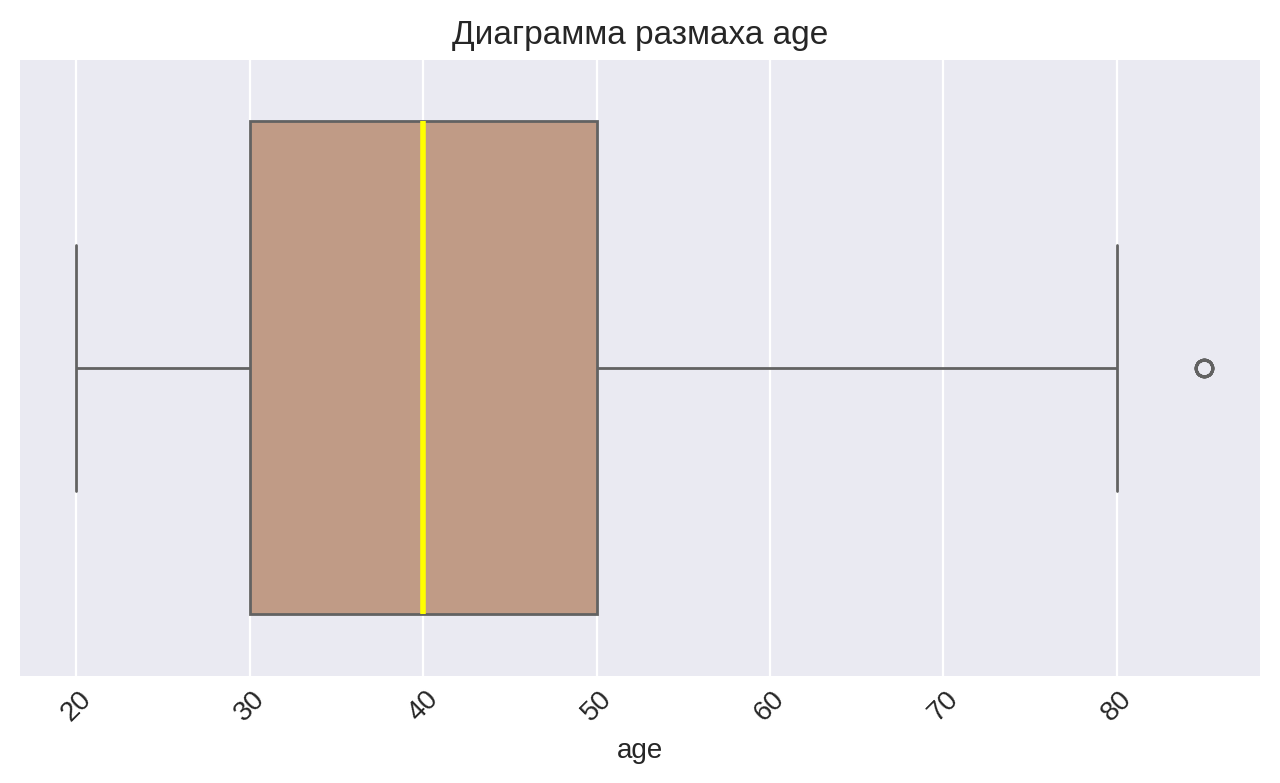

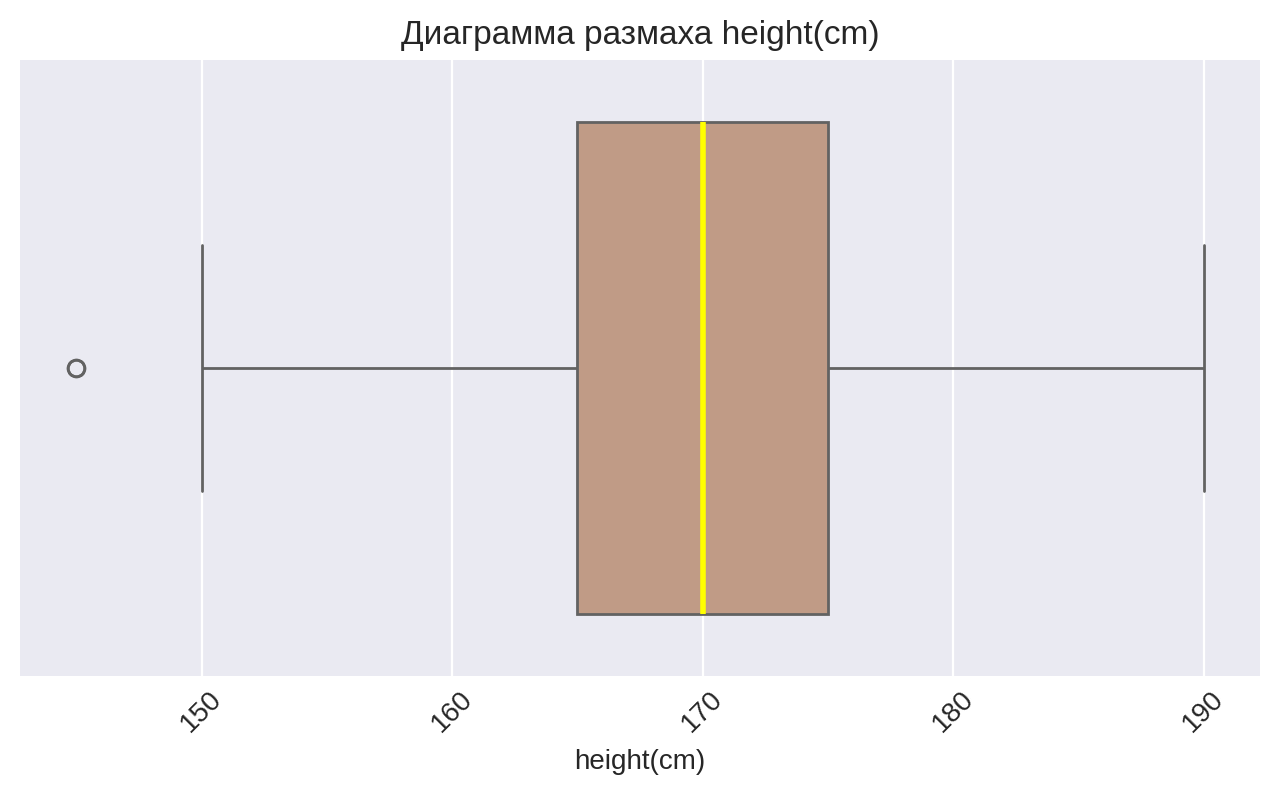

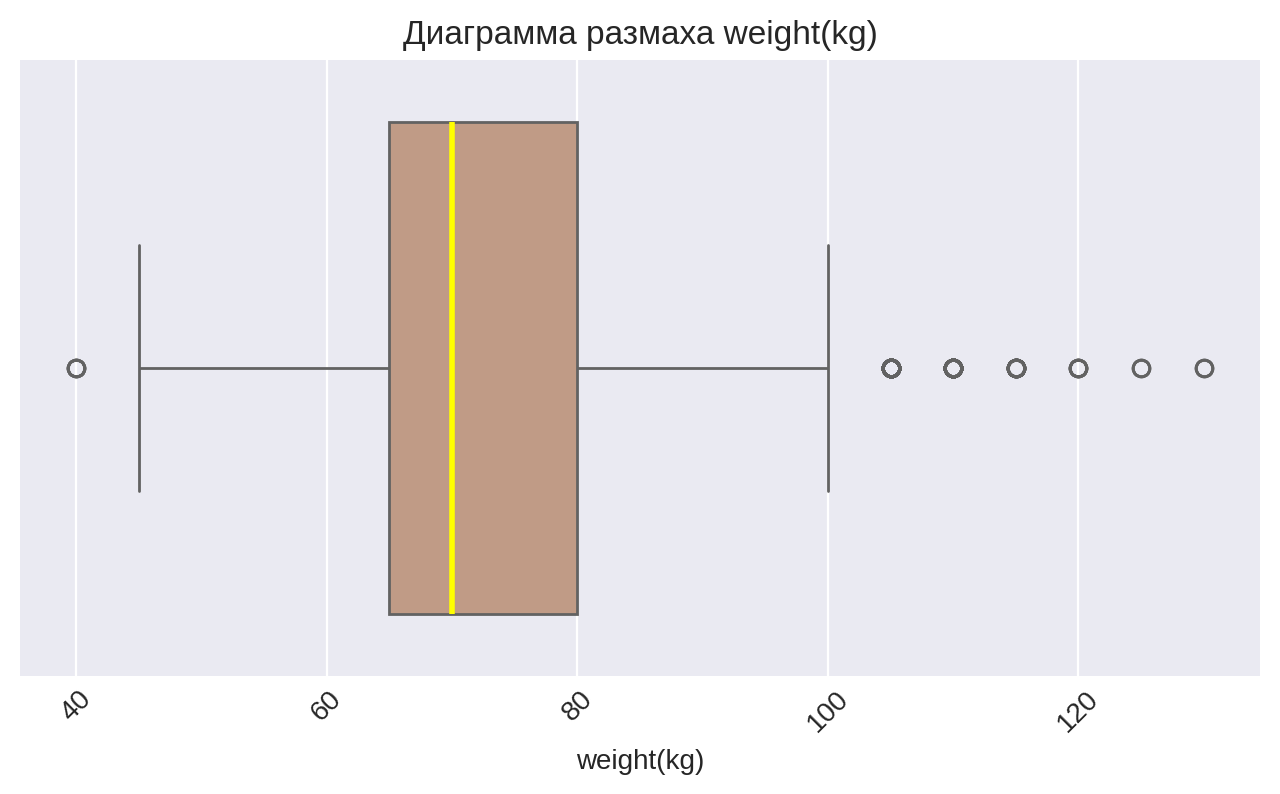

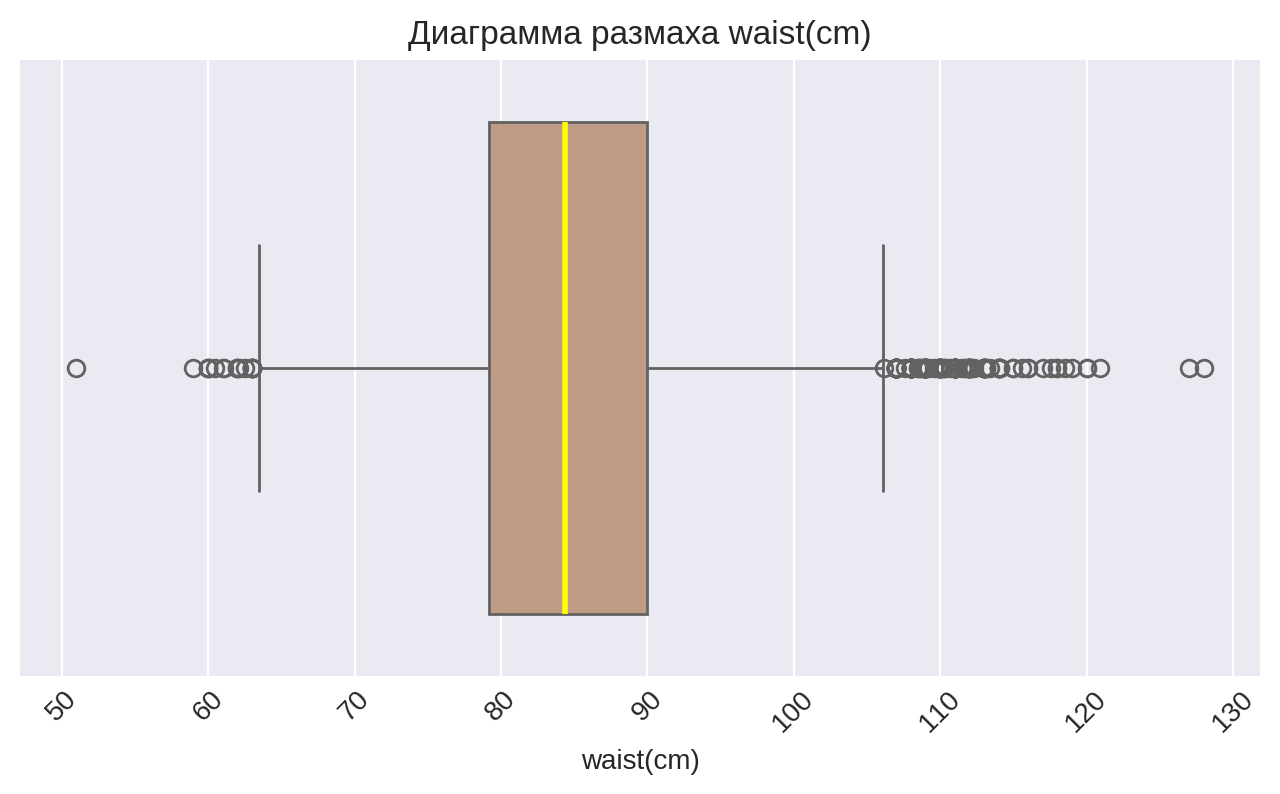

In [22]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("twilight_r")
for col in ["age", "height(cm)", "weight(kg)", "waist(cm)"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col], medianprops={"color": "yellow", "linewidth": 2})
    plt.title(f"Диаграмма размаха {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

### 2.2 Анализ целевого признака `smoking`

In [23]:
train["smoking"].value_counts(normalize=True)

smoking
0    0.798024
1    0.201976
Name: proportion, dtype: float64

In [24]:
train["dental_caries"].value_counts()

dental_caries
0    10923
1     2940
Name: count, dtype: int64

Сразу бросается в глаза наблюдение, что в рассматриваемом датасете соотношение курильщиков и людей с кариесом имеют одинаковое значение ~ 20%

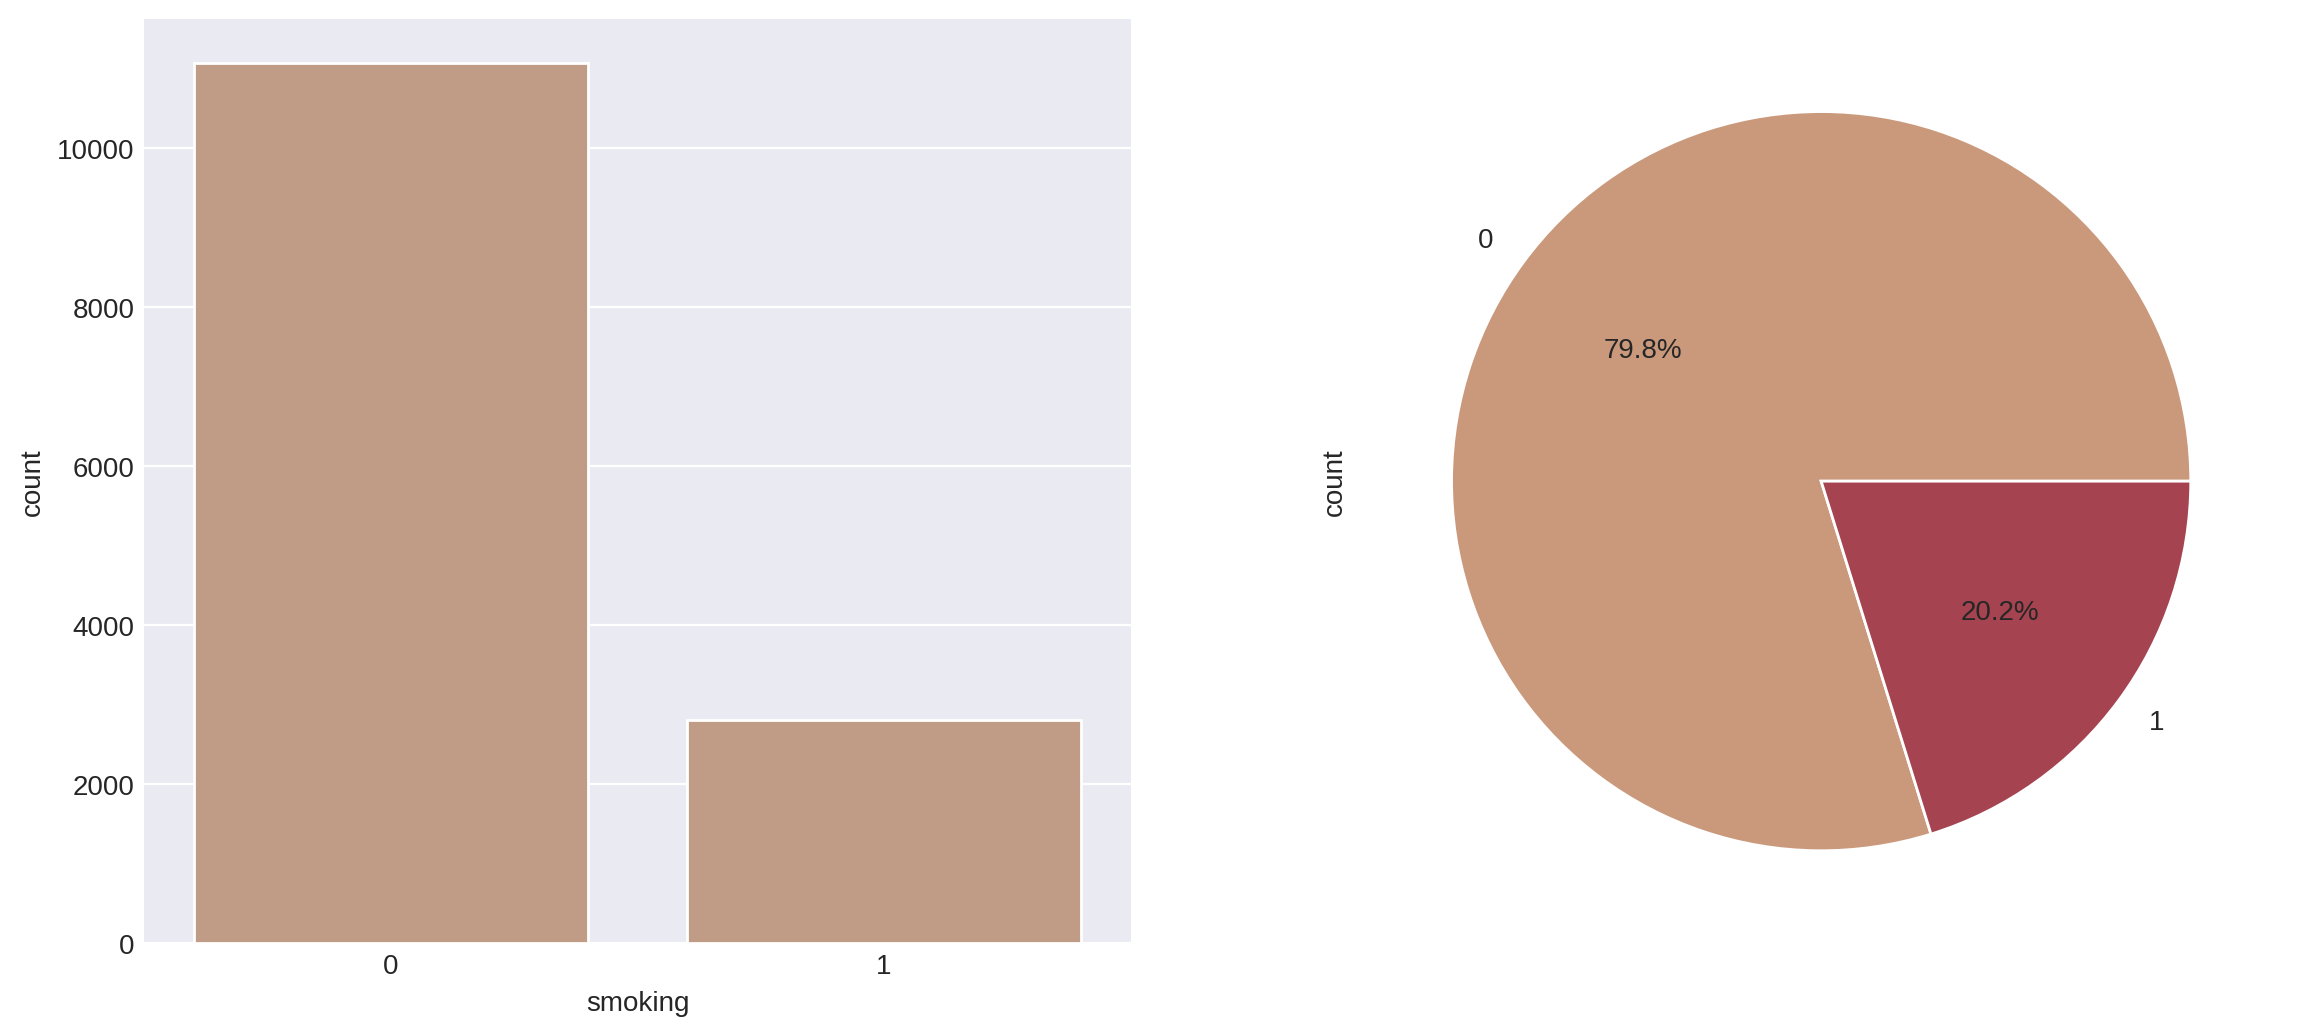

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=train["smoking"], ax=ax[0])
train["smoking"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax[1])
plt.show()

smoke_1 = train[train["smoking"] == 1].shape[0]
smoke_0 = train[train["smoking"] == 0].shape[0]

In [26]:
display("Курят: ", smoke_1)
display("Не курят: ", smoke_0)

'Курят: '

2800

'Не курят: '

11063

### 2.3 Анализ распределениях данных в числовых признаках

Анализ распределениях данных в числовых признаках с помощью «фай-корреляции». Работает для смешанных, чиловых и категориальных признаков


Она основана на обобщённой χ² (хи-квадрат) статистике и:

работает и для числовых, и для категориальных признаков;

даёт значения в диапазоне от 0 до 1, где

- 0 — независимость признаков,

- 1 — сильная зависимость (функциональная связь).

In [27]:
import phik

In [28]:
phik_overview = train.phik_matrix()

interval columns not set, guessing: ['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'tartar', 'smoking']


In [29]:
phik_overview["smoking"].drop("smoking").sort_values(ascending=False).to_frame()

smoking
triglyceride         0.190446
age                  0.183295
gtp                  0.142844
hemoglobin           0.112074
tartar               0.104475
dental_caries        0.089120
waist(cm)            0.062694
serum_creatinine     0.055594
hdl                  0.050773
weight(kg)           0.045916
height(cm)           0.045292
fasting_blood_sugar  0.041979
relaxation           0.039642
hearing(left)        0.035273
urine_protein        0.030645
hearing(right)       0.024720
ldl                  0.022210
systolic             0.016672
cholesterol          0.015907
alt                  0.014651
ast                  0.001957
eyesight(right)      0.000000
eyesight(left)       0.000000
id                   0.000000

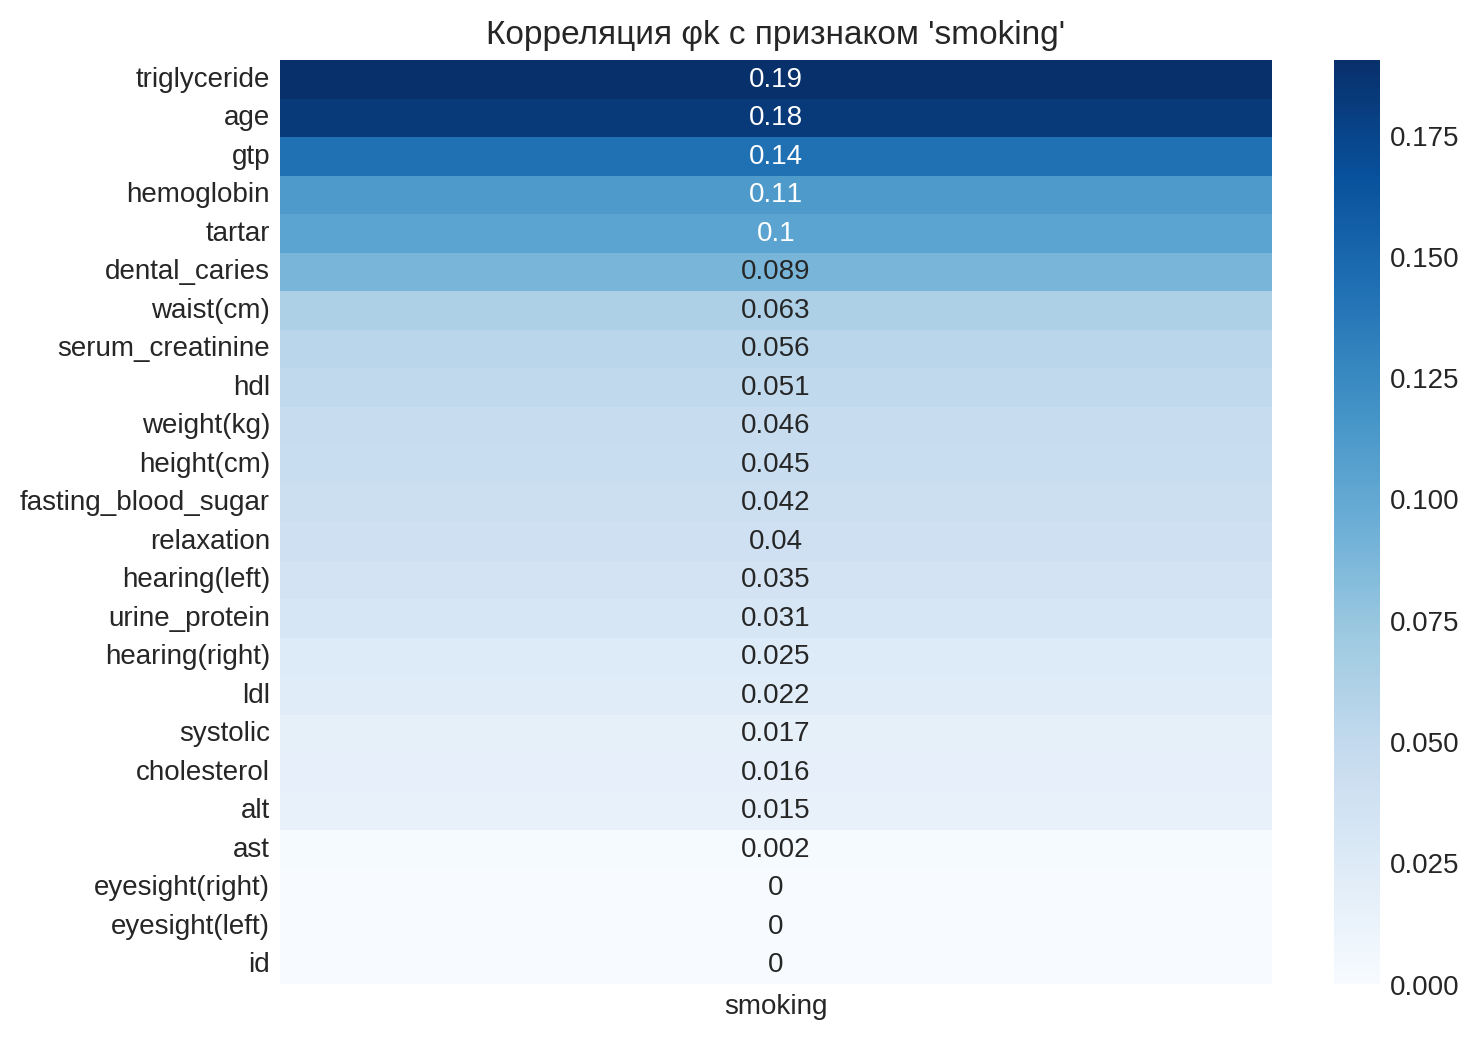

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    phik_overview[["smoking"]]
    .drop("smoking")
    .sort_values(by="smoking", ascending=False),
    annot=True,
    cmap="Blues",
)
plt.title("Корреляция φk с признаком 'smoking'")
plt.show()

**Наиболее значимые признаки**

triglyceride (0.190) и age (0.183) имеют наибольшую корреляцию с курением. Это означает, что уровень триглицеридов и возраст имеют сильное влияние на предсказание курения. gtp (0.143) и hemoglobin (0.112) также заметно коррелируют с курением.

**Менее очевидные зависимости**

tartar (0.104) и dental_caries (0.089) (наличие зубного камня и кариеса) также связаны с курением. Это логично, так как курение влияет на здоровье зубов. waist(cm) (0.063) и serum_creatinine (0.056) показывают небольшую, но всё же заметную зависимость.

**Наименее полезные признаки**

eyesight(left) (0.000) и eyesight(right) (0.000) не дают никакой полезной информации. Их можно удалить. id (0.000) тоже бесполезен — это просто идентификатор. cholesterol (0.016), ast (0.002), alt (0.015), systolic (0.017), ldl (0.022) имеют очень слабую связь, их влияние незначительно.

### 2.4 Анализ признаков

#### 2.4.1 Анализ `age`.

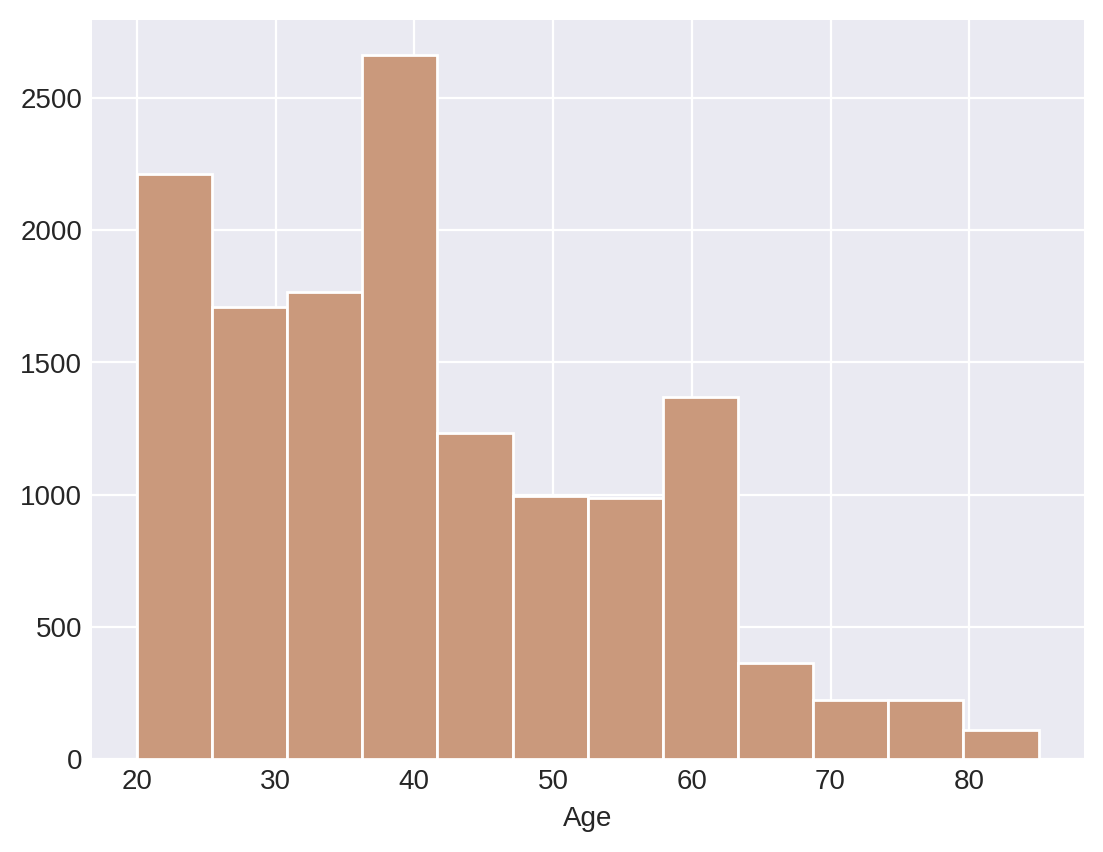

In [31]:
train["age"].hist(bins=12)
plt.xlabel("Age");

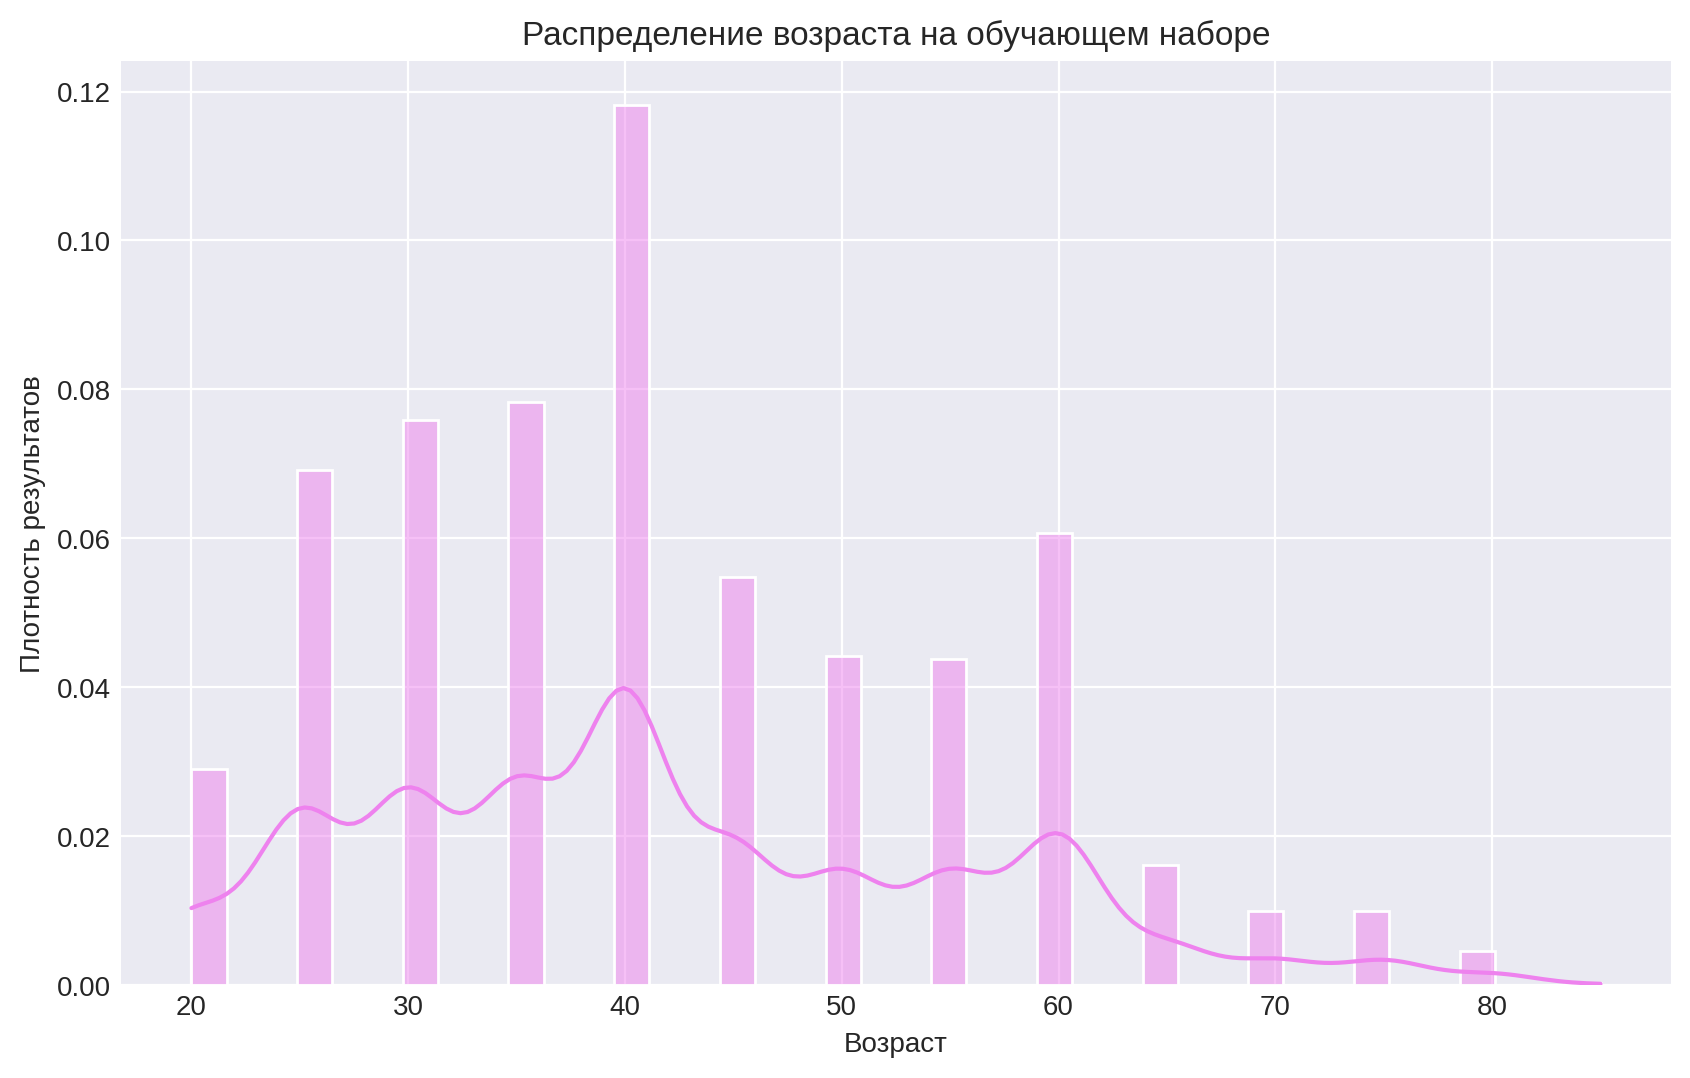

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(train["age"], kde=True, color="violet", stat="density", alpha=0.5)
plt.xlabel("Возраст")
plt.ylabel("Плотность результатов")
plt.title("Распределение возраста на обучающем наборе")
plt.show()

In [33]:
train["age"].describe()

count    13863.000000
mean        41.743851
std         13.624383
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         85.000000
Name: age, dtype: float64

Медианный возраст в выборке - 40 лет

Минимальный - 20 лет

Максимальный - 85 лет

при этом выбросов в этом признаке всего 8


In [34]:
# создадим отдельно датасеты курящих и некурящих
df_smokers = train[train["smoking"] == 1]
df_non_smokers = train[train["smoking"] == 0]
age_smoking = df_smokers.groupby("age")["smoking"].agg(["count"])
age_non_smoking = df_non_smokers.groupby("age")["smoking"].agg(["count"])
print("Распределение курящих по возрастам")
age_smoking

Распределение курящих по возрастам


count
age       
20     112
25     258
30     280
35     303
40     735
45     338
50     256
55     208
60     231
65      46
70      16
75      12
80       5

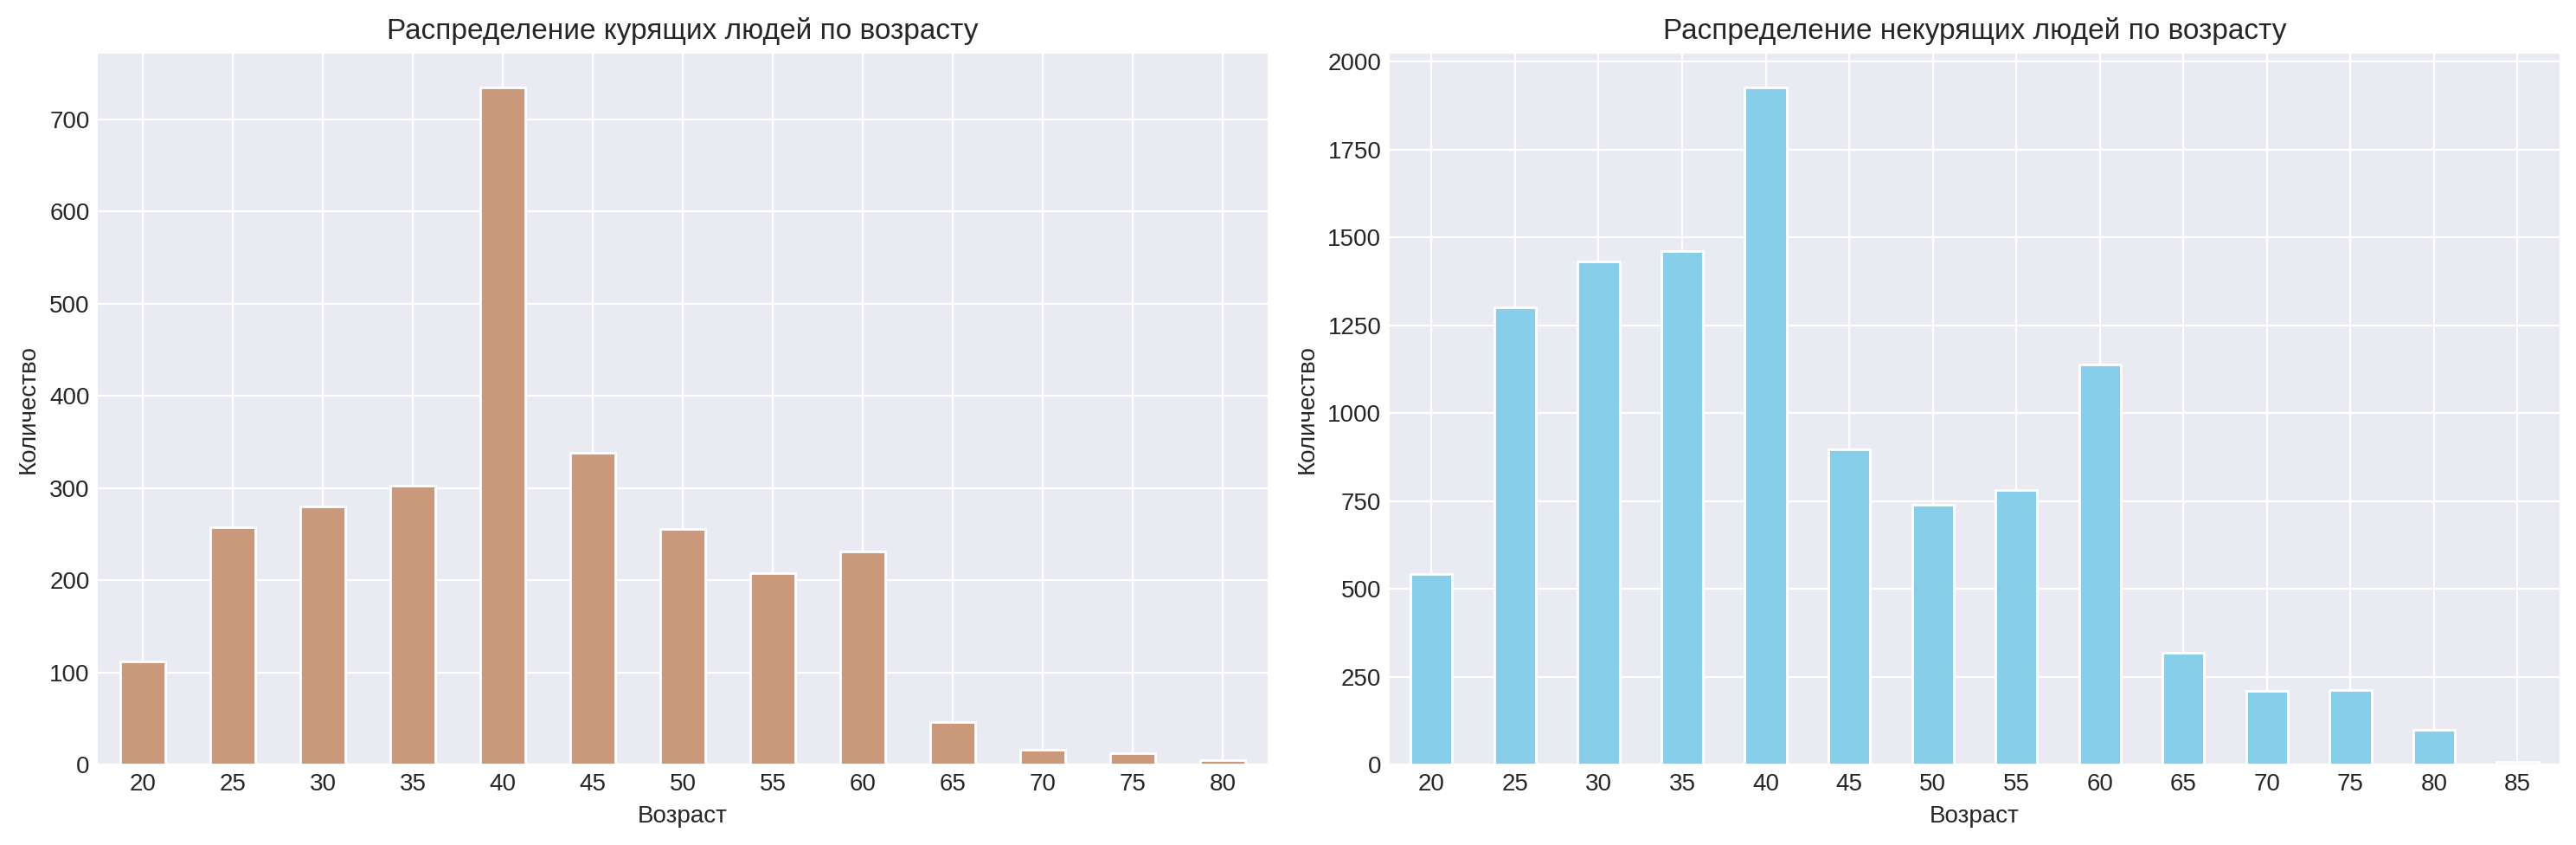

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

age_smoking["count"].plot(kind="bar", rot=0, ax=ax[0])
ax[0].set_title("Распределение курящих людей по возрасту")
ax[0].set_xlabel("Возраст")
ax[0].set_ylabel("Количество")

age_non_smoking["count"].plot(kind="bar", rot=0, ax=ax[1], color="skyblue")
ax[1].set_title("Распределение некурящих людей по возрасту")
ax[1].set_xlabel("Возраст")
ax[1].set_ylabel("Количество")

plt.tight_layout()
plt.show()

Построим график оценки плотности вероятности (Kernel Density Estimate) —  кривую, показывающую, как распределены значения признака  `age` в выборках

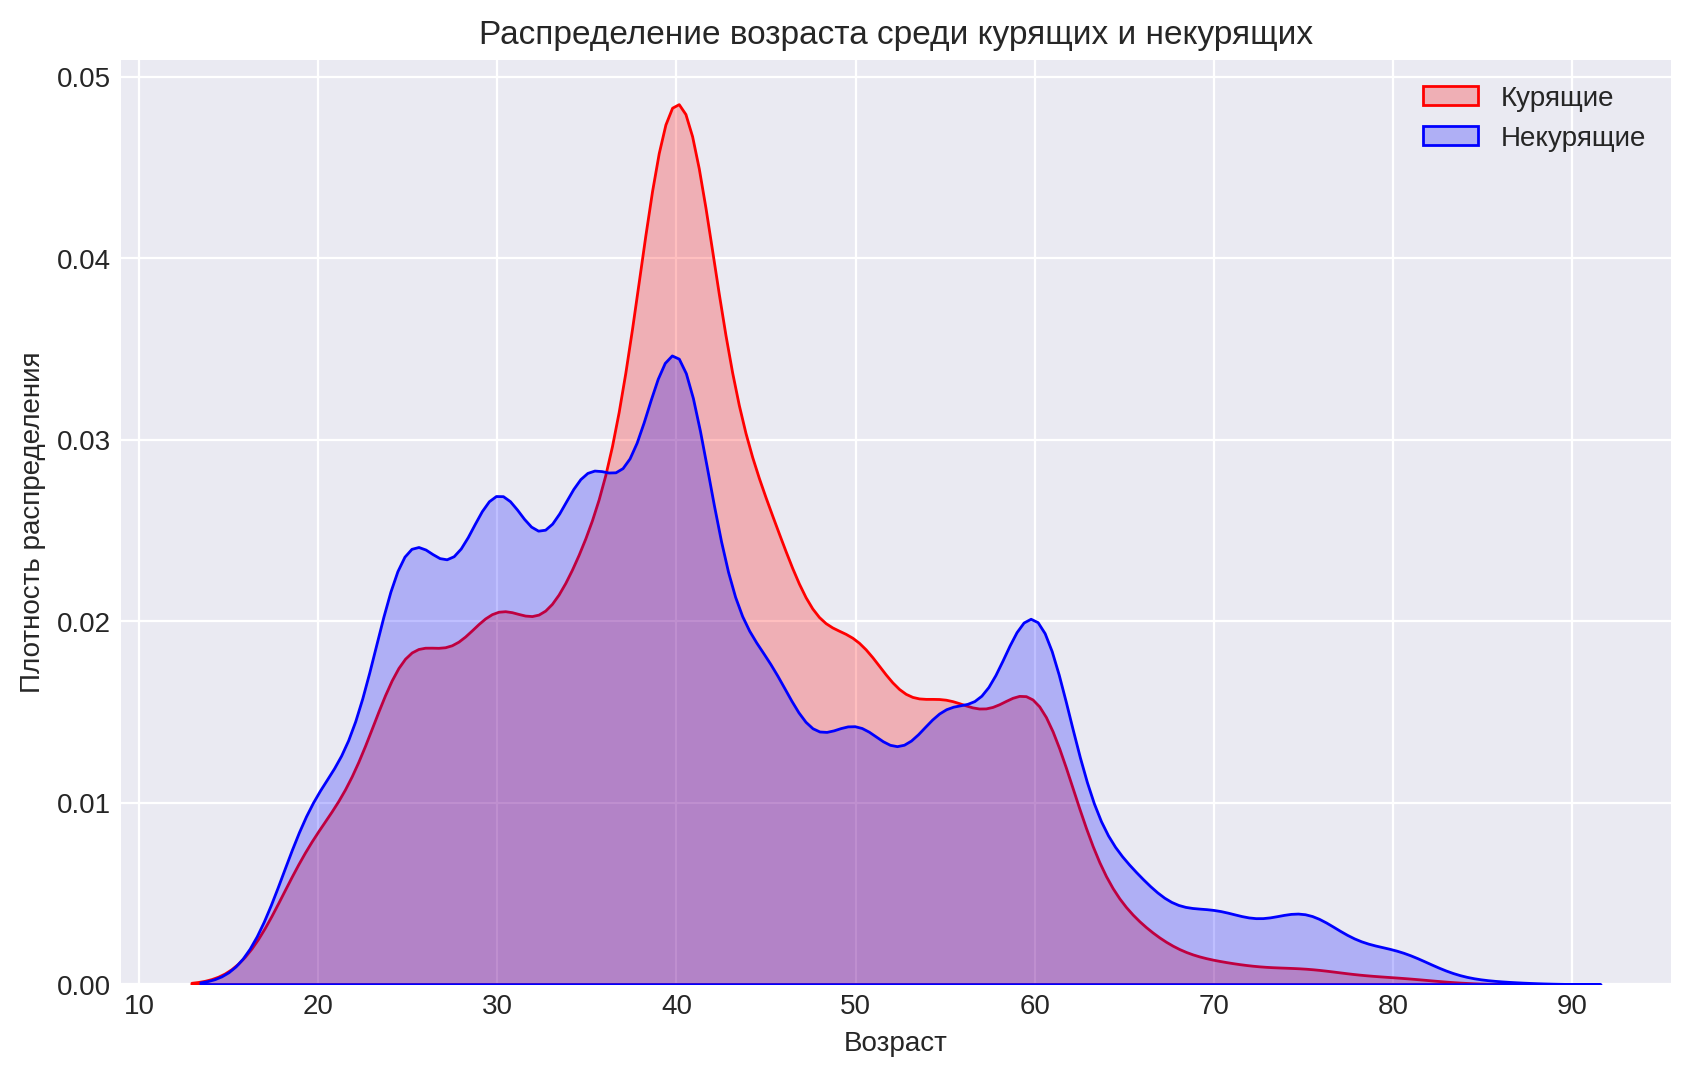

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_smokers["age"], label="Курящие", fill=True, color="red")
sns.kdeplot(df_non_smokers["age"], label="Некурящие", fill=True, color="blue")
plt.title("Распределение возраста среди курящих и некурящих")
plt.xlabel("Возраст")
plt.ylabel("Плотность распределения")
plt.legend()
plt.show()

Большинство курящих сосредоточены в возрасте 35–50 лет, с максимальной плотностью около 40 лет.
Распределения обеих групп имеют схожую форму, но у некурящих видны отдельные наблюдения в старшем возрасте, что может указывать на выбросы или меньшую плотность данных.

In [37]:
smokers_40 = (
    (age_smoking[age_smoking.index == 40]["count"].values[0])
    / train["smoking"].sum()
    * 100
)
smokers_40
print(f"Доля курильщиков в возрасте 40 лет от общего числа курящих: {smokers_40:.2f}%")

Доля курильщиков в возрасте 40 лет от общего числа курящих: 26.25%


In [38]:
age_smoking["mean"] = (age_smoking["count"] / age_smoking["count"].sum()).round(2)
age_smoking.sort_values(by="mean", ascending=False)
age_smoking_sorted = age_smoking.sort_values(by="mean", ascending=False)

age_smoking_sorted.style.background_gradient(cmap="coolwarm", subset=["mean"])

**Вывод:** Пик доли курящих приходится на возраст 40–45 лет; после 45 лет наблюдается устойчивое снижение.

#### 2.4.2 Анализ `height(cm), weight(kg), waist(cm)`

Для этих признаков построим Q-Q график чтобы сравнить распределение величин в них с нормальным

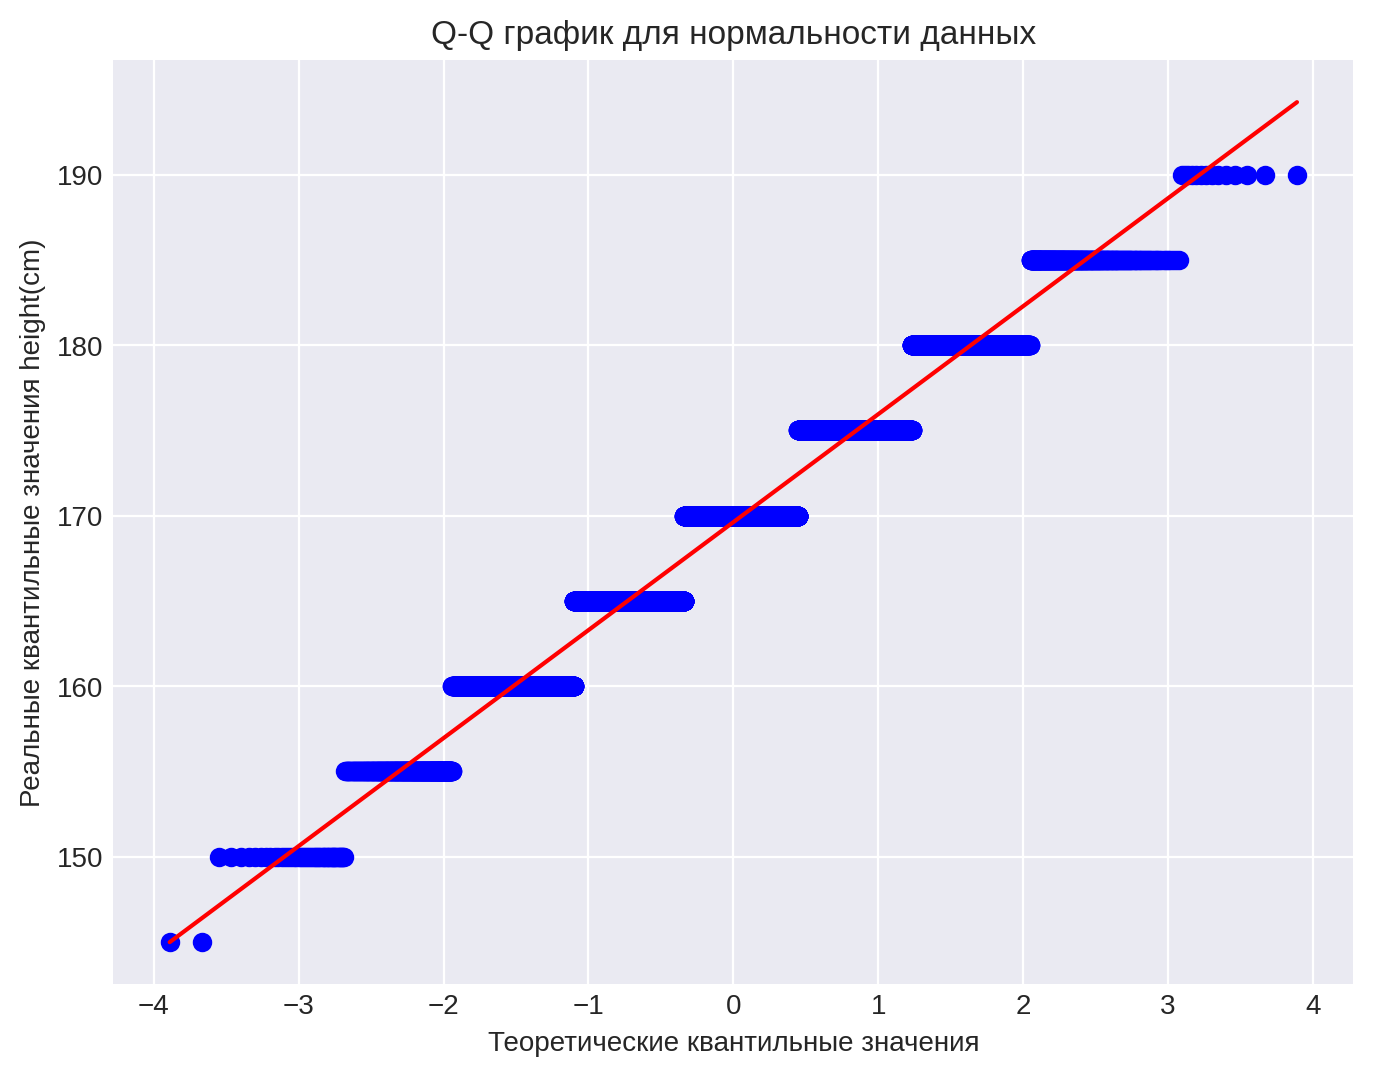

In [39]:
plt.figure(figsize=(8, 6))
stats.probplot(train["height(cm)"], dist="norm", plot=plt)
plt.title("Q-Q график для нормальности данных")
plt.xlabel("Теоретические квантильные значения")
plt.ylabel("Реальные квантильные значения height(cm)")
plt.show()

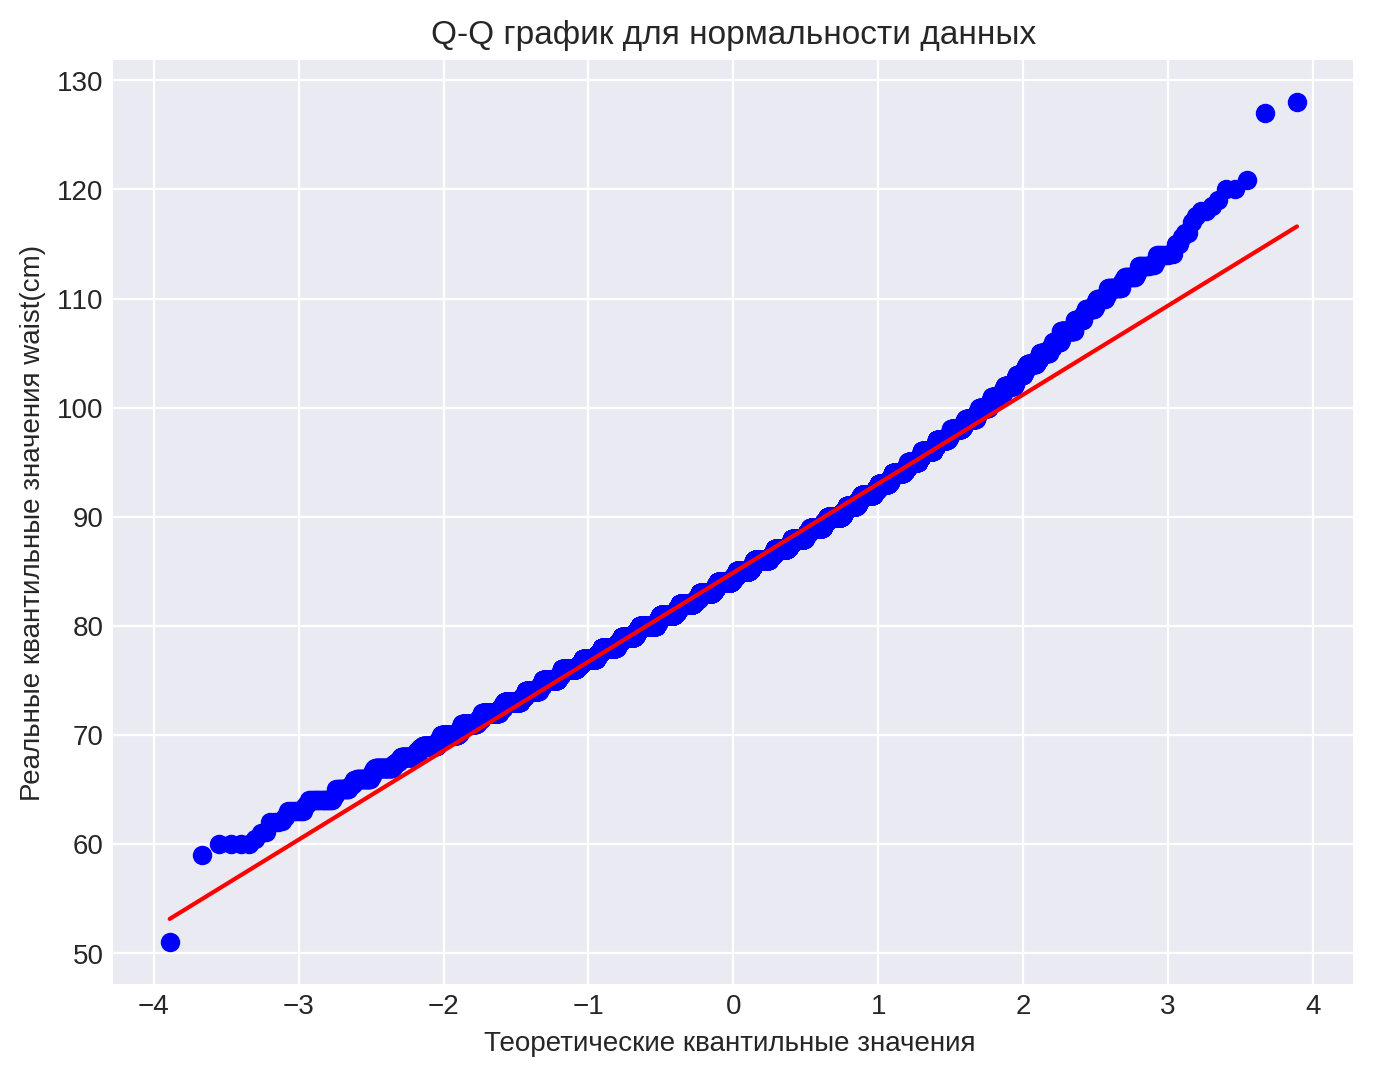

In [40]:
plt.figure(figsize=(8, 6))
stats.probplot(train["waist(cm)"], dist="norm", plot=plt)
plt.title("Q-Q график для нормальности данных")
plt.xlabel("Теоретические квантильные значения ")
plt.ylabel("Реальные квантильные значения waist(cm)")
plt.show()

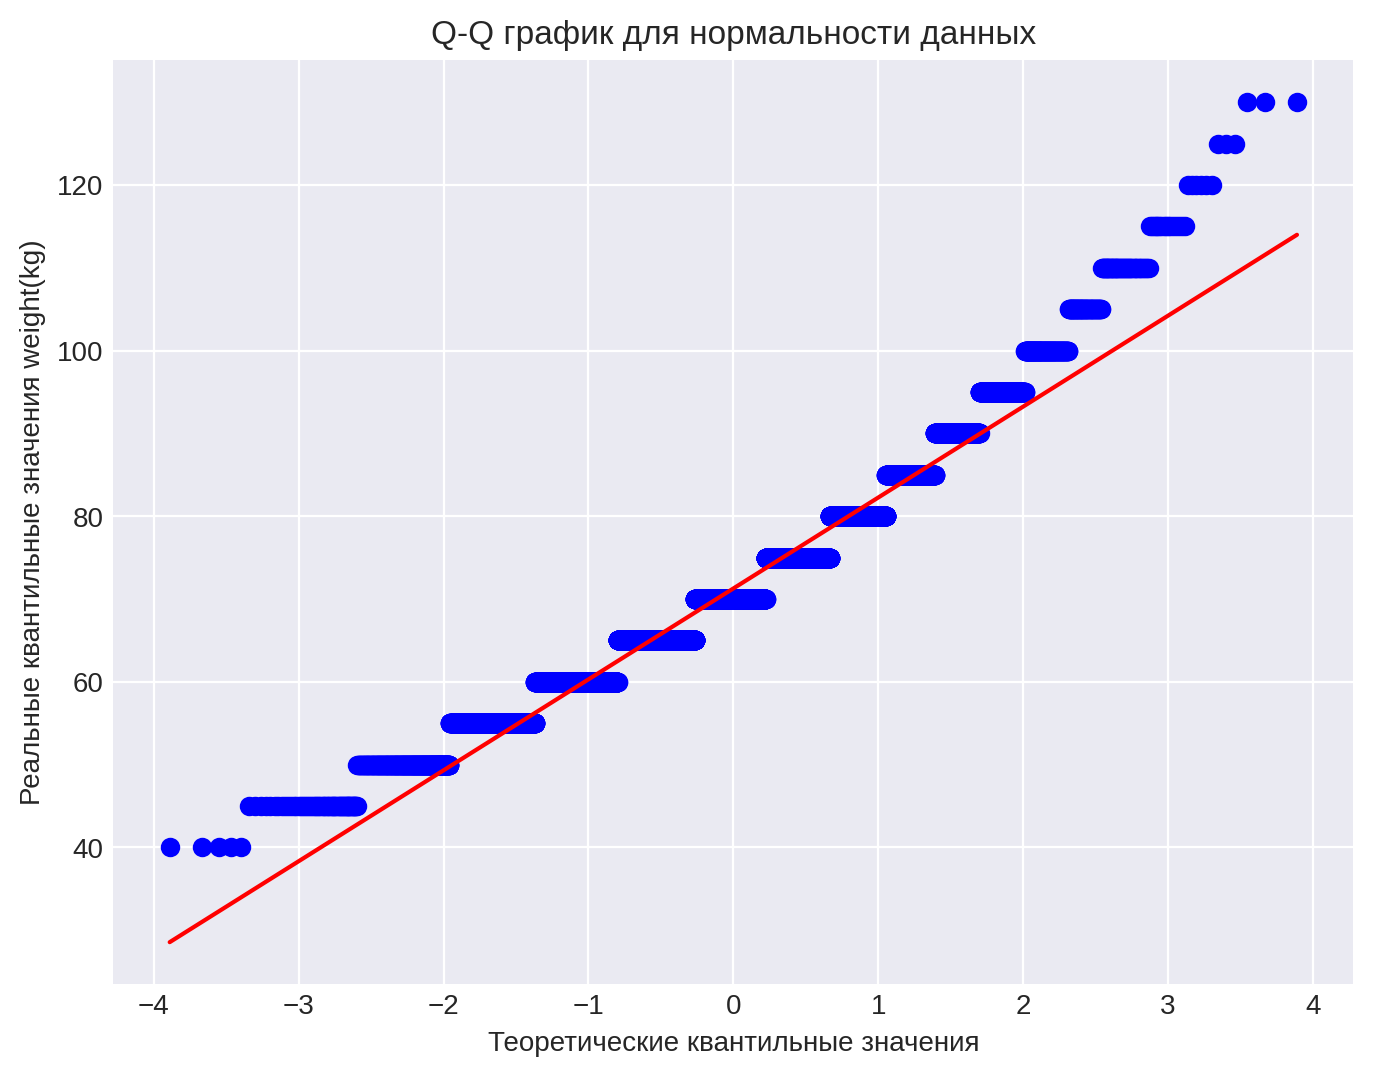

In [41]:
plt.figure(figsize=(8, 6))
stats.probplot(train["weight(kg)"], dist="norm", plot=plt)
plt.title("Q-Q график для нормальности данных")
plt.xlabel("Теоретические квантильные значения")
plt.ylabel("Реальные квантильные значения weight(kg)")
plt.show()

Распределение в признаках приближается к нормальному но имеет отклонения

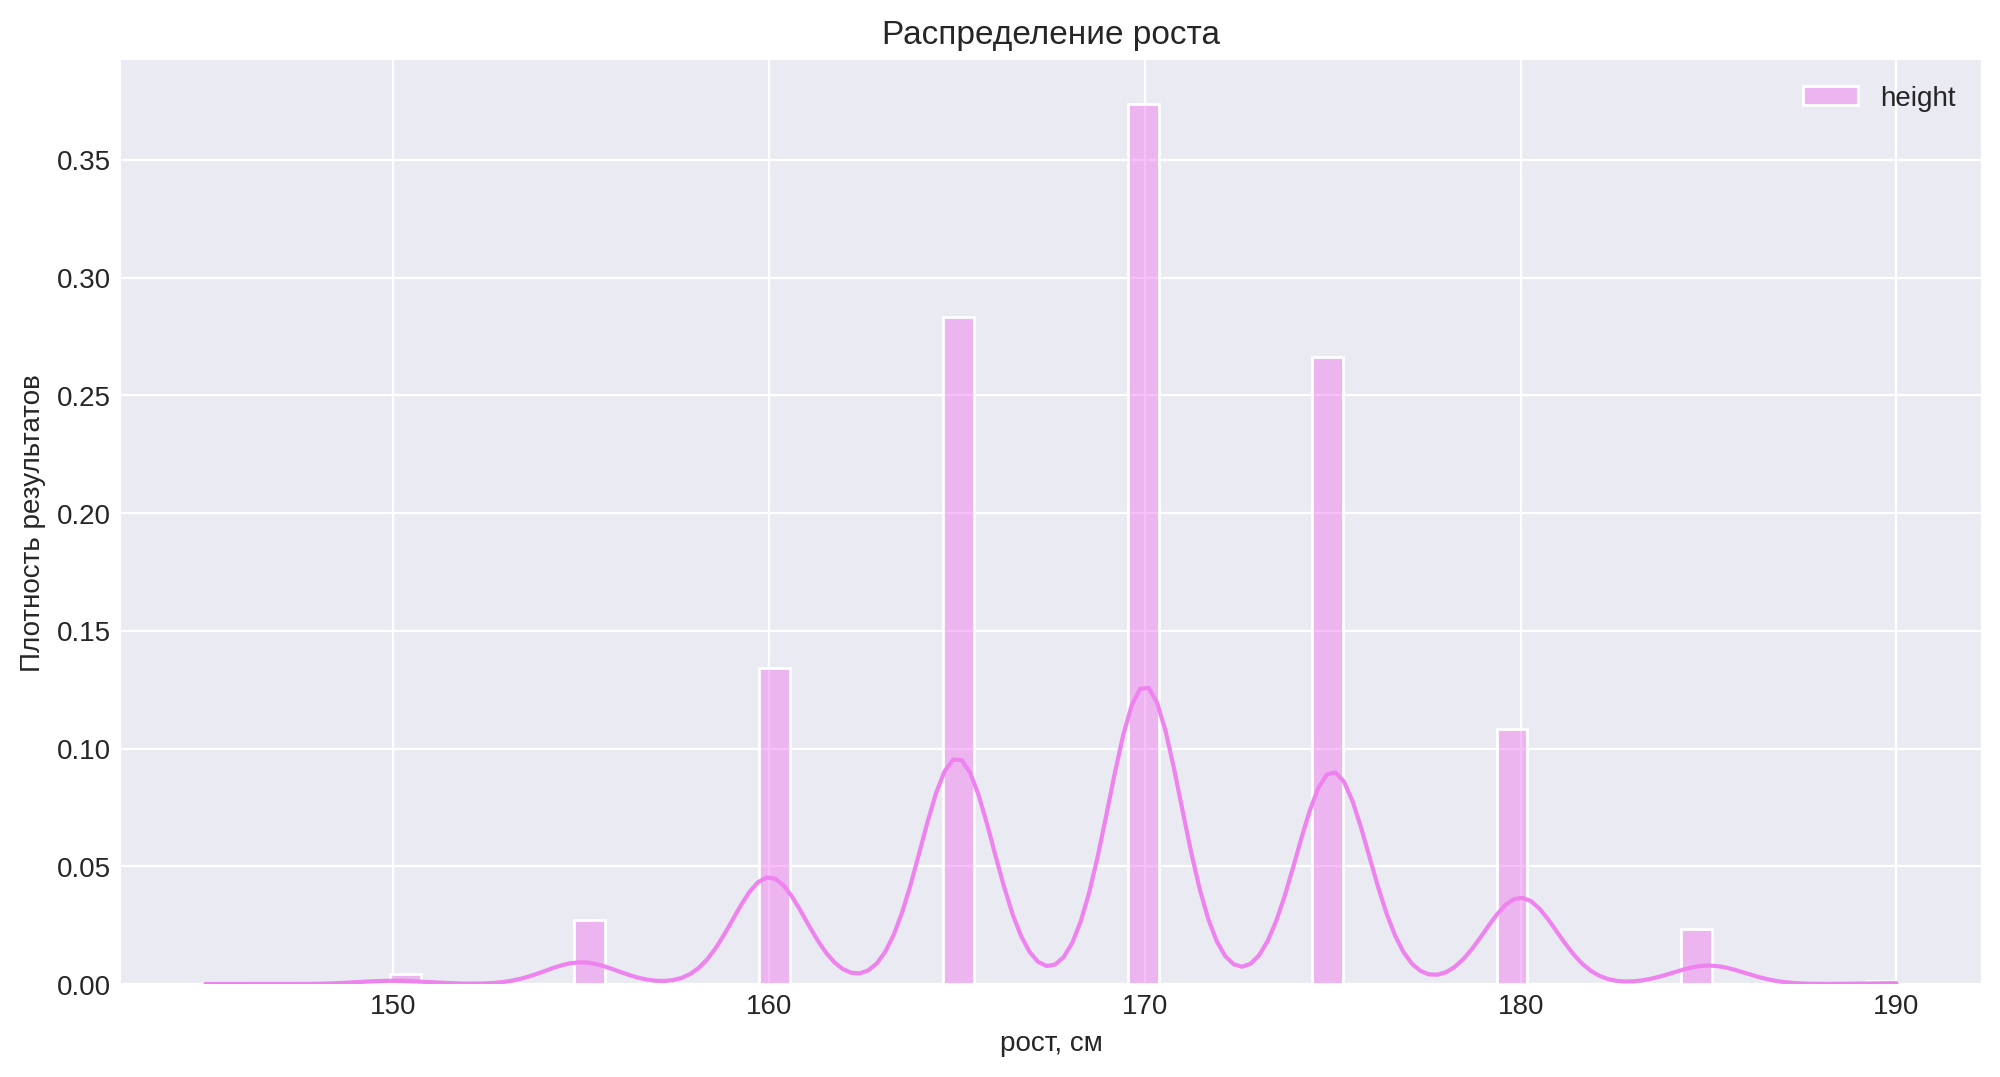

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(
    train["height(cm)"],
    kde=True,
    color="violet",
    stat="density",
    label="height",
    alpha=0.5,
)
plt.xticks()
plt.xlabel("рост, см")
plt.ylabel(
    "Плотность результатов",
)
plt.title("Распределение роста")
plt.legend()
plt.show()

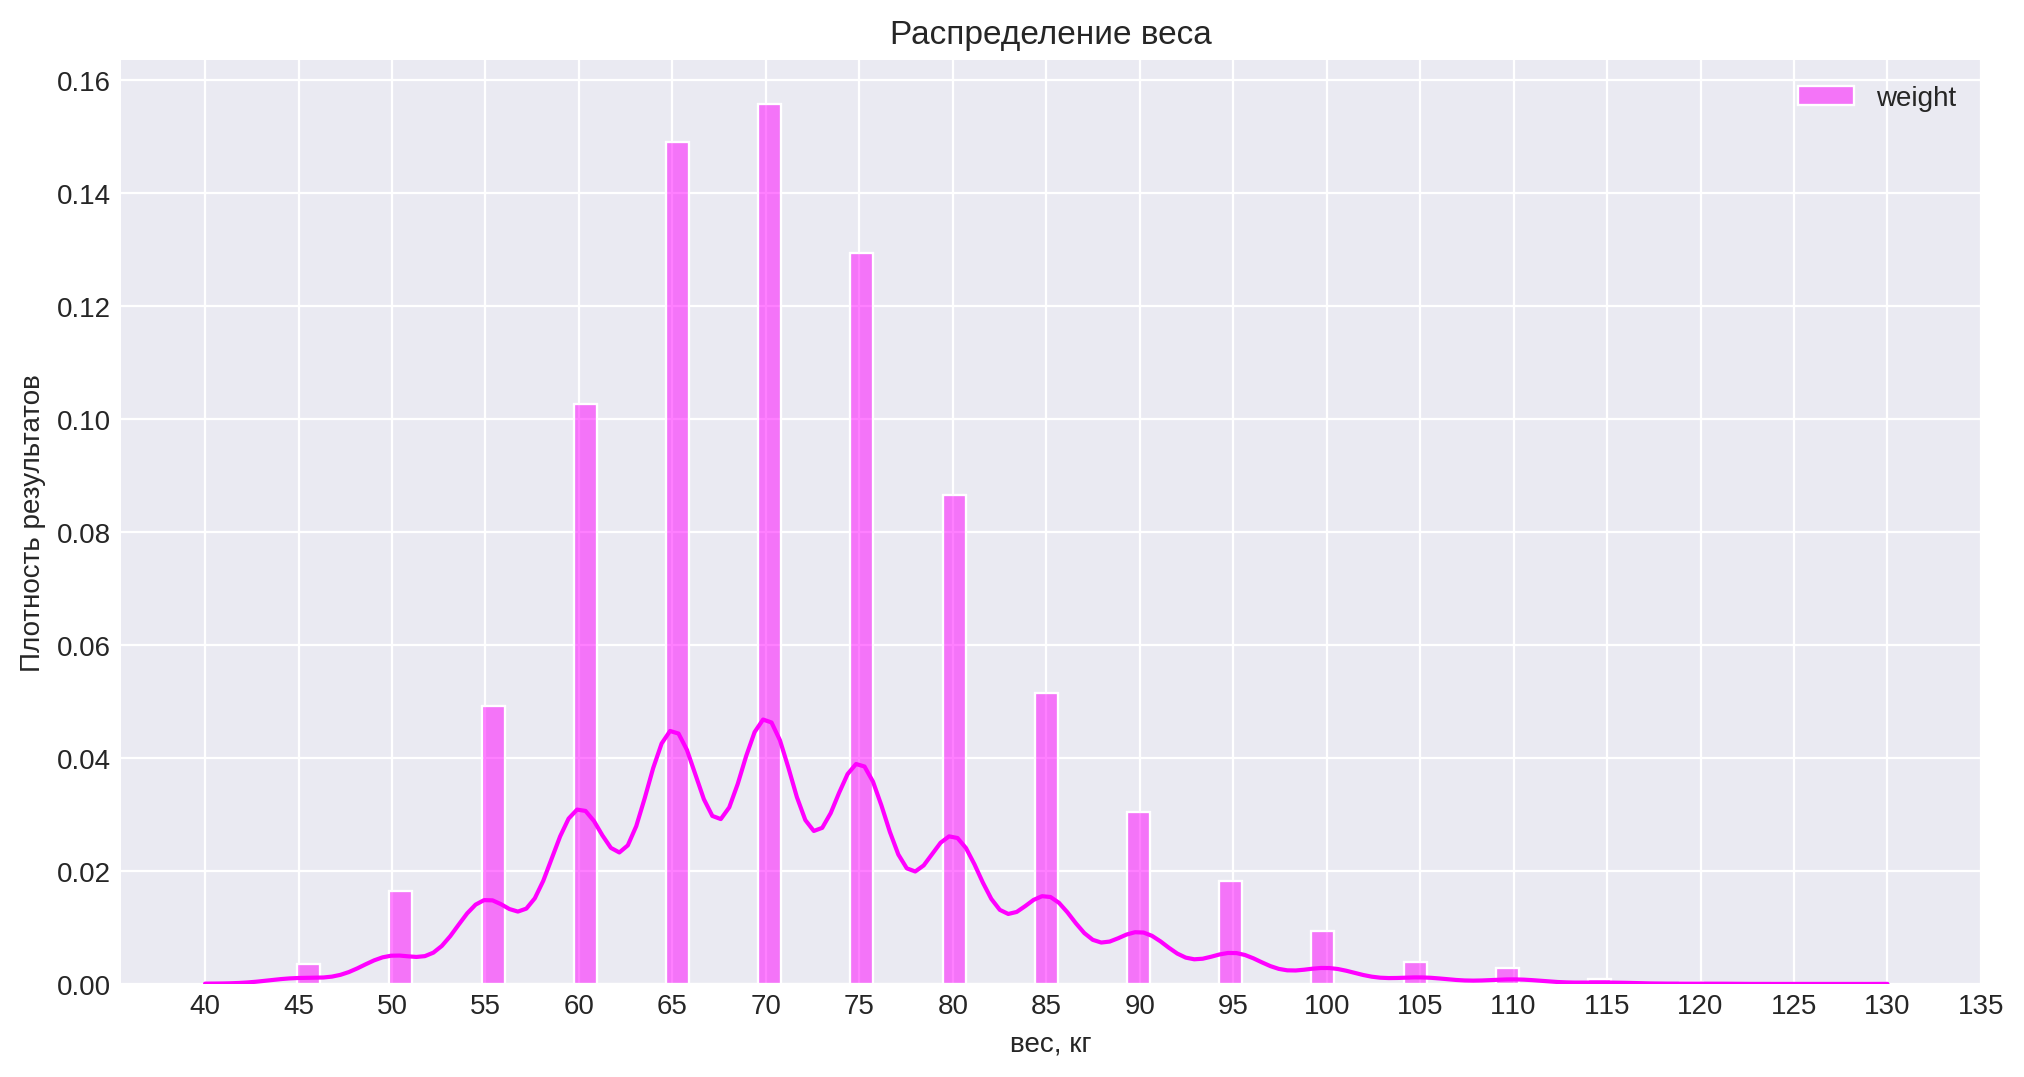

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(
    train["weight(kg)"],
    kde=True,
    color="magenta",
    stat="density",
    label="weight",
    alpha=0.5,
)
plt.xticks(range(40, 140, 5))
plt.xlabel("вес, кг")
plt.ylabel(
    "Плотность результатов",
)
plt.title("Распределение веса")
plt.legend()
plt.show()

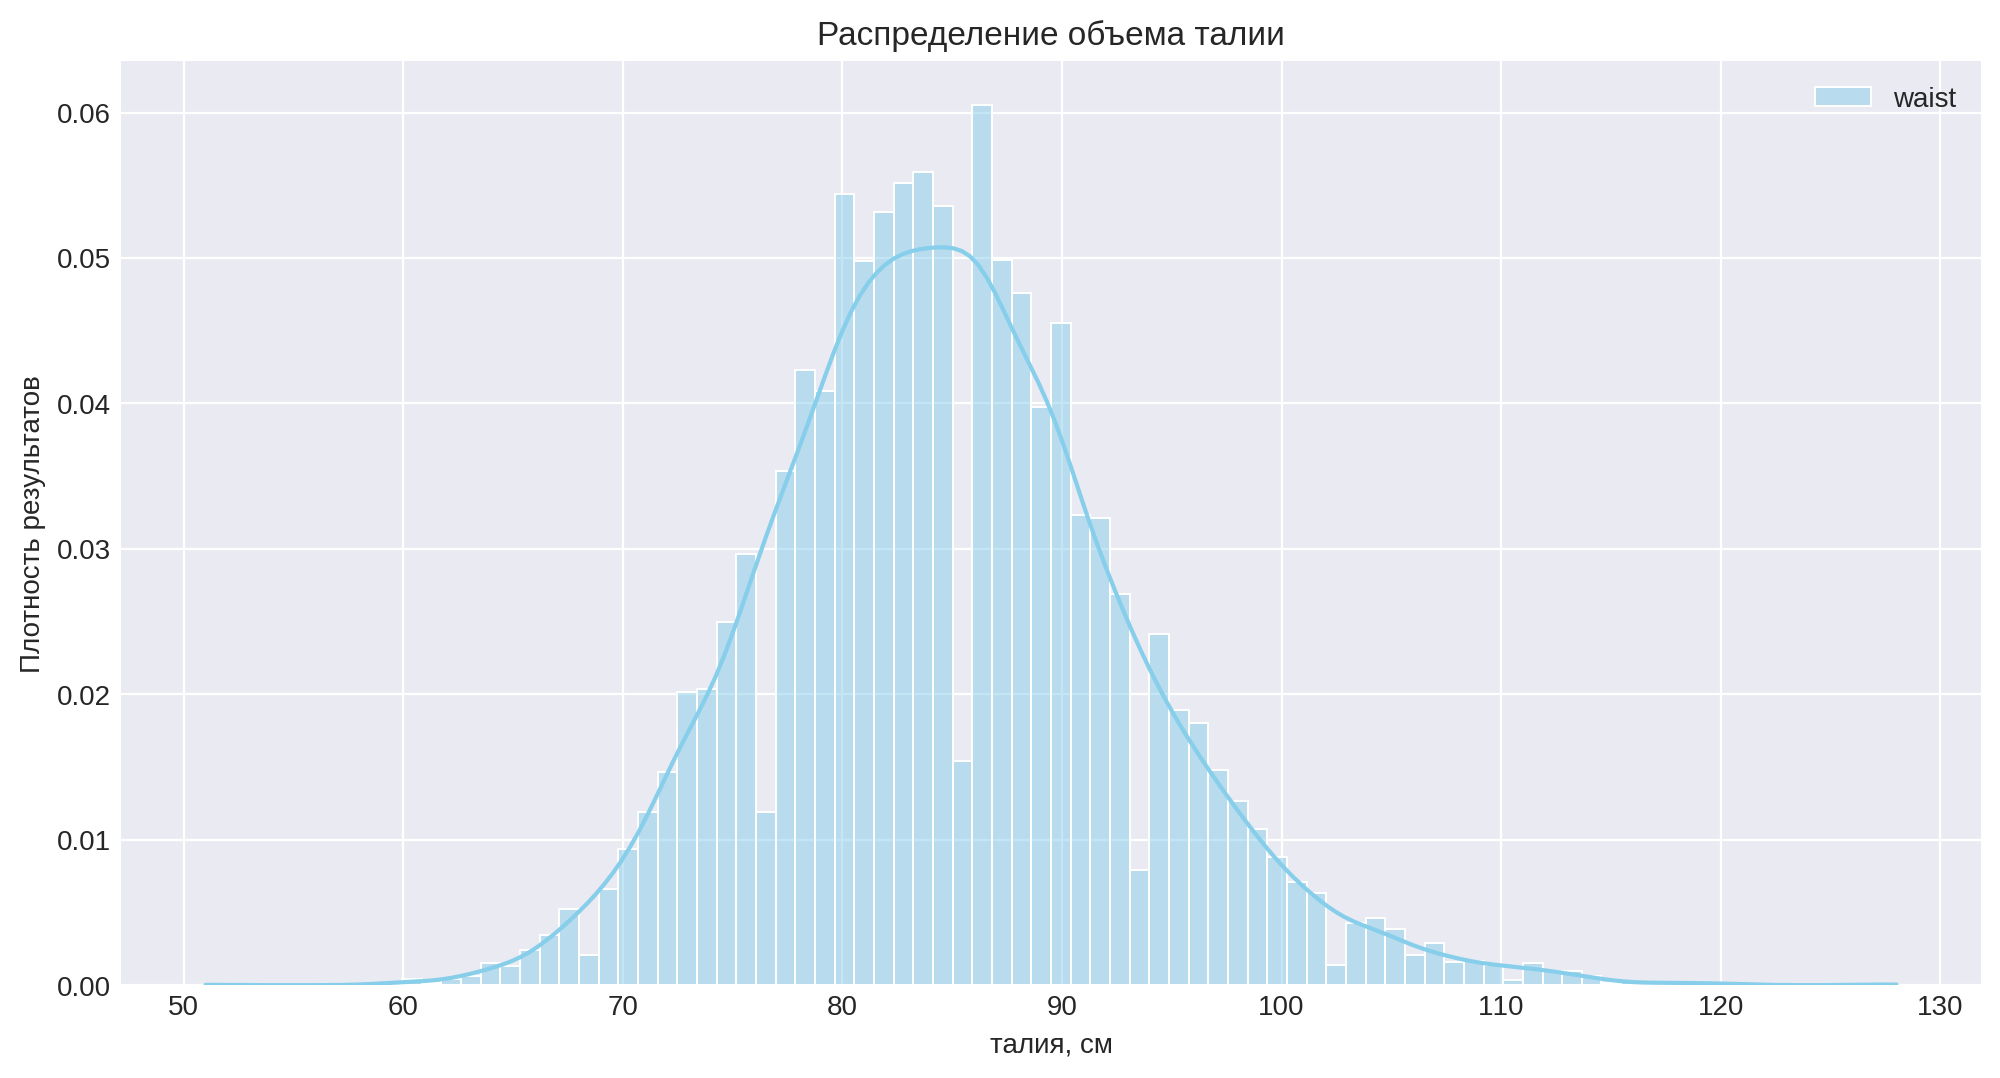

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(
    train["waist(cm)"],
    kde=True,
    color="skyblue",
    stat="density",
    label="waist",
    alpha=0.5,
)
# plt.xticks(range(40,130,5))
plt.xlabel("талия, см")
plt.ylabel(
    "Плотность результатов",
)
plt.title("Распределение объема талии")
plt.legend()
plt.show()

In [45]:
train["height(cm)"].value_counts()

height(cm)
170    4238
165    3213
175    3021
160    1521
180    1230
155     311
185     265
150      48
190      14
145       2
Name: count, dtype: int64

Значения роста указаны для диапазонов с шагом 5. Также указаны значения веса. Найдем средние значения веса, роста и объема талии для нашего датасета. Обратим также внимание что данных о поле не предоставлено

In [46]:
for col in ["height(cm)", "weight(kg)", "waist(cm)"]:
    print(f"Среднее значение {col}: {train[col].mean().round(2)}")

Среднее значение height(cm): 169.62
Среднее значение weight(kg): 71.27
Среднее значение waist(cm): 84.87


Проведем статистический тест для нашей выборки чтобы оценить распределение данных числовых величин.

H0 - данные распределены нормально

Н1 - данные распределены отлично от нормального

Если p-value < 0.05, то отвергаем H0, то есть данные не являются нормальными.

In [47]:
from scipy.stats import normaltest

for col in ["height(cm)", "weight(kg)", "waist(cm)"]:
    stat, p = normaltest(train[col])
    print(f"{col}: статистика={stat:.2f}, p-value={p:.5f}")

    if p < 0.05:
        print(f"⚠️ {col}: Данные НЕ распределены нормально (p < 0.05)")
    else:
        print(f"✅ {col}: Данные можно считать нормально распределёнными (p >= 0.05)")

height(cm): статистика=13.85, p-value=0.00098
⚠️ height(cm): Данные НЕ распределены нормально (p < 0.05)
weight(kg): статистика=1035.31, p-value=0.00000
⚠️ weight(kg): Данные НЕ распределены нормально (p < 0.05)
waist(cm): статистика=458.02, p-value=0.00000
⚠️ waist(cm): Данные НЕ распределены нормально (p < 0.05)


**Вывод:**

описательные признаки не имеют нормального распределения поэтому в качестве модели лучше использовать методы, устойчивые к ненормальному распределению (например, градиентный бустинг или деревья решений).

### 2.5 Анализ медицинских показателей

Обратим внимание на показатели, имеющие наибольшую линейную зависимость с целевым признаком `triglyceride`, `hemoglobin`, `gtp` а также `dental_caries` и `tartar`

In [48]:
med_features = [
    "eyesight(left)",
    "eyesight(right)",
    "hearing(left)",
    "hearing(right)",
    "systolic",
    "relaxation",
    "fasting_blood_sugar",
    "cholesterol",
    "triglyceride",
    "hdl",
    "ldl",
    "hemoglobin",
    "urine_protein",
    "serum_creatinine",
    "ast",
    "alt",
    "gtp",
]

In [49]:
def investigate_column(column):
    """
    функция принимает значение столбца df и выводит его описание для анализа,
    считает пропуски, уникальные значения ,
    тип данных и строит диаграмму размаха для числовых типов данных
    """

    print(column.name)
    print("Кол-во Null и Na значений:", column.isna().sum())
    print("Кол-во уникальных значений:", column.nunique())
    print("Data type:", column.dtype)

    # Описание статистики
    print(column.describe())

    # Частота уникальных значений
    print("Частота уникальных значений столбца:\n", column.value_counts())

    # Минимальное и максимальное значение (для числовых данных)
    if pd.api.types.is_numeric_dtype(column) and not pd.api.types.is_bool_dtype(column):
        print("Minimum:", column.min())
        print("Maximum:", column.max())

        # Построение boxplot
        plt.figure(figsize=(10, 6))
        # Удаляем NaN для отображения и разворачиваем график
        plt.boxplot(column.dropna(), vert=False)
        plt.title(f"Диаграмма размаха для столбца {column.name}")
        plt.xlabel("Значения")
        plt.show()

eyesight(left)
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 18
Data type: float64
count    13863.000000
mean         1.057304
std          0.514618
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight(left), dtype: float64
Частота уникальных значений столбца:
 eyesight(left)
1.2    3558
1.0    3028
1.5    2334
0.9    1182
0.8    1102
0.7     913
0.6     539
0.5     422
0.4     249
0.3     179
2.0     130
0.2     111
0.1      75
9.9      28
1.6       8
1.3       3
1.1       1
1.9       1
Name: count, dtype: int64
Minimum: 0.1
Maximum: 9.9


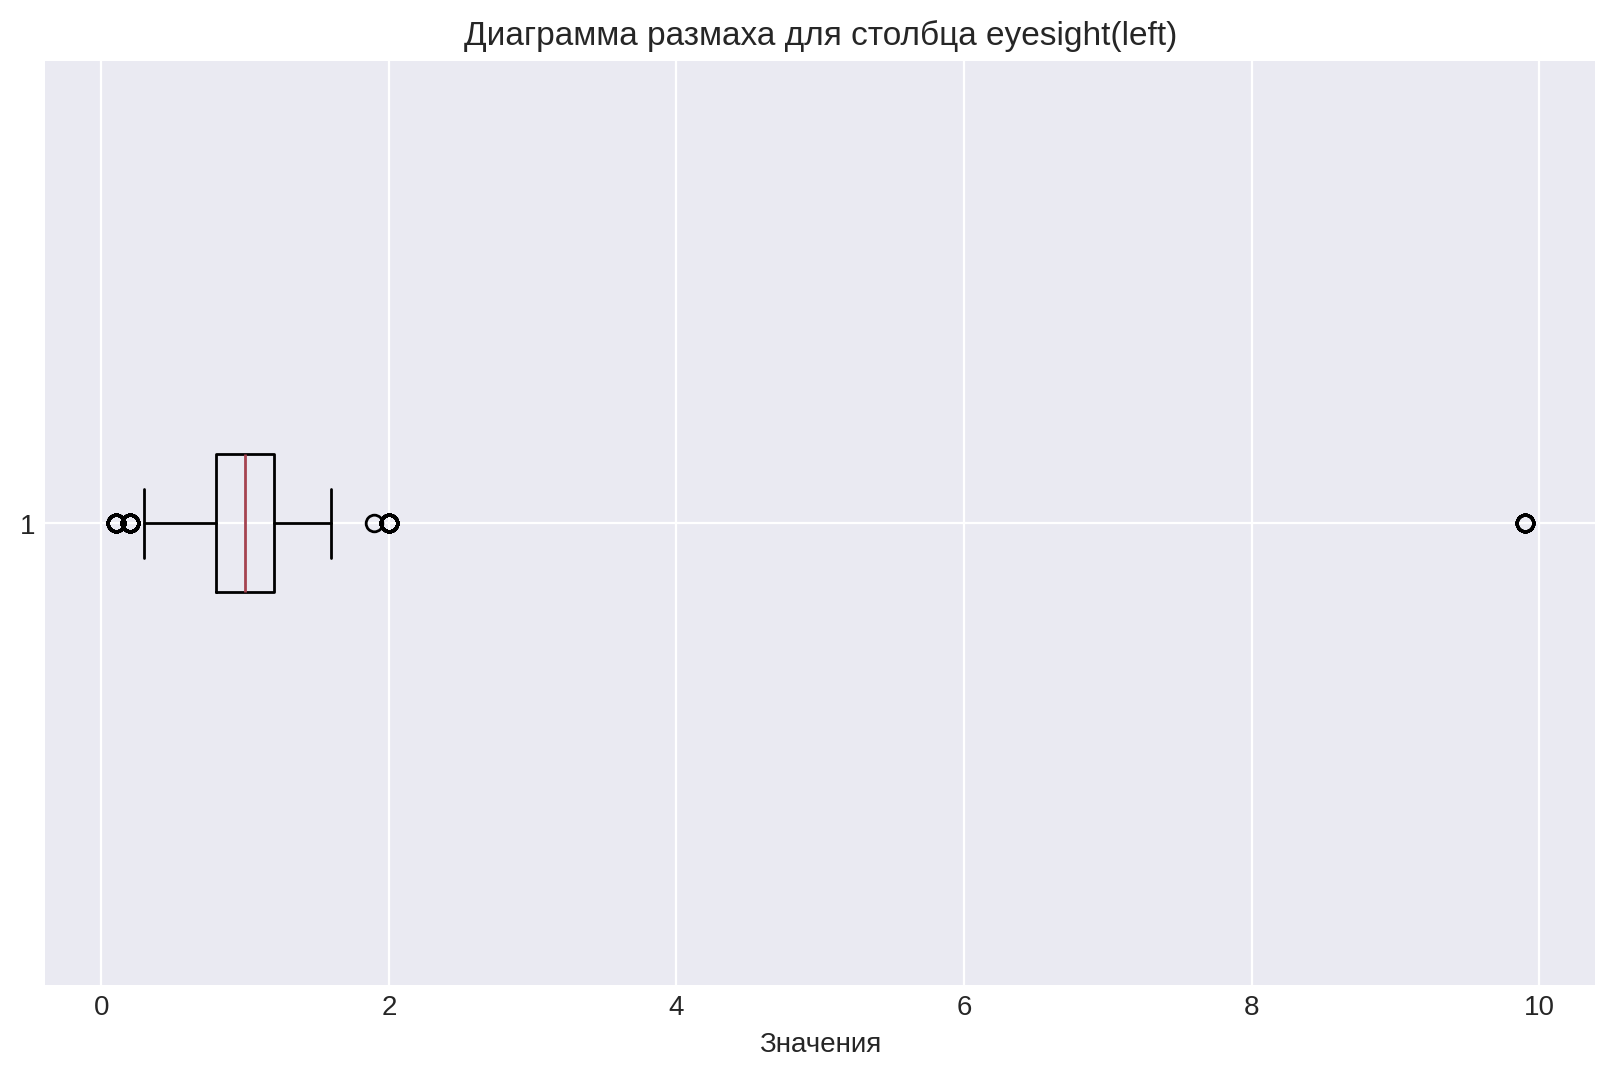

eyesight(right)
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 16
Data type: float64
count    13863.000000
mean         1.053740
std          0.514613
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight(right), dtype: float64
Частота уникальных значений столбца:
 eyesight(right)
1.2    3422
1.0    3097
1.5    2318
0.9    1248
0.8    1172
0.7     871
0.6     494
0.5     434
0.4     273
0.3     180
2.0     130
0.2     111
0.1      76
9.9      28
1.6       6
1.3       3
Name: count, dtype: int64
Minimum: 0.1
Maximum: 9.9


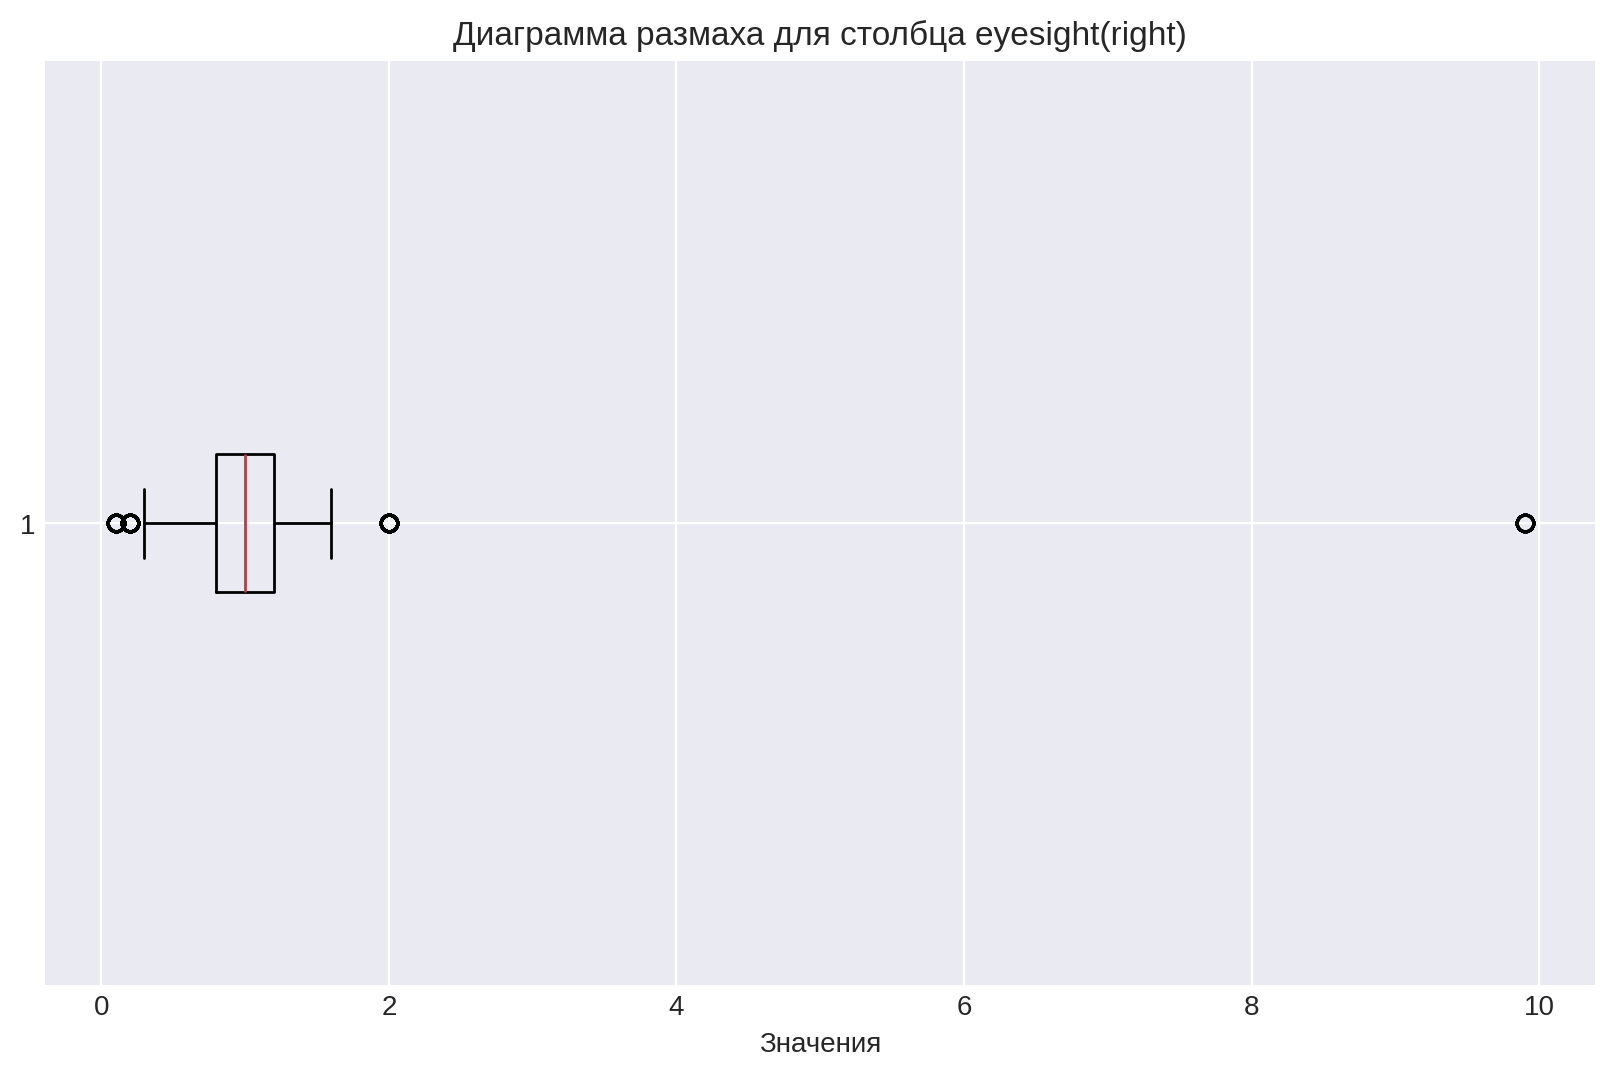

hearing(left)
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 2
Data type: float64
count    13863.000000
mean         1.028060
std          0.165151
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing(left), dtype: float64
Частота уникальных значений столбца:
 hearing(left)
1.0    13474
2.0      389
Name: count, dtype: int64
Minimum: 1.0
Maximum: 2.0


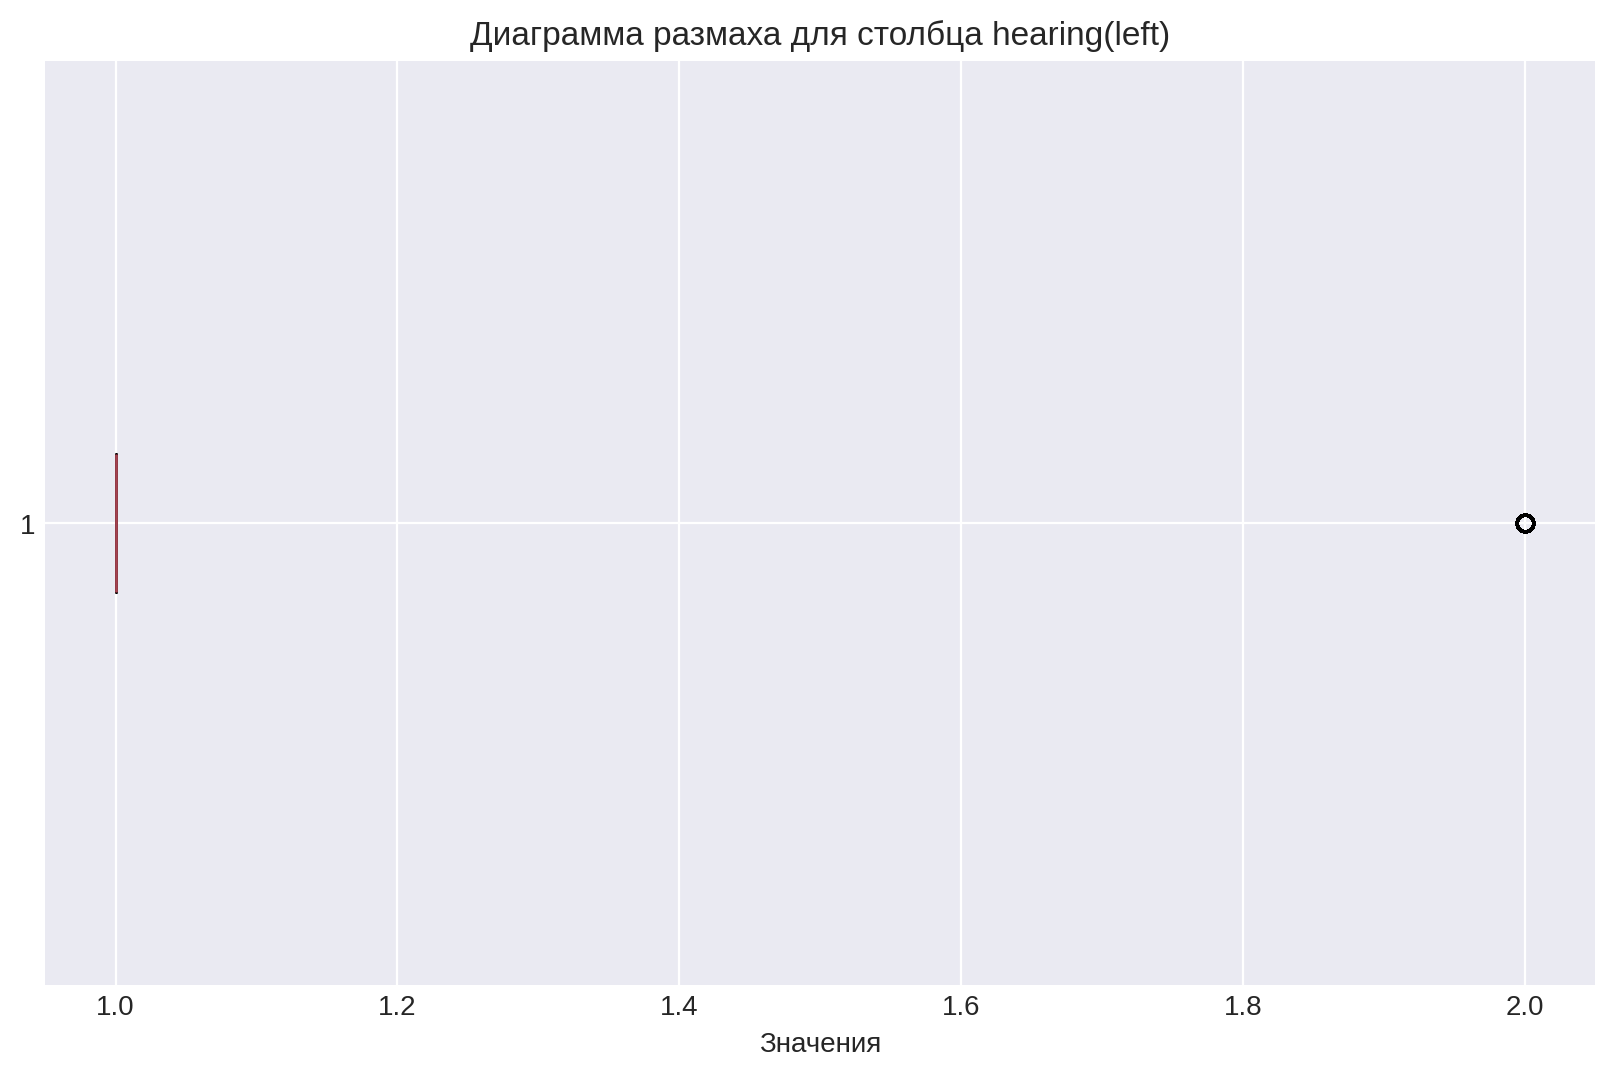

hearing(right)
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 2
Data type: float64
count    13863.000000
mean         1.027411
std          0.163284
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing(right), dtype: float64
Частота уникальных значений столбца:
 hearing(right)
1.0    13483
2.0      380
Name: count, dtype: int64
Minimum: 1.0
Maximum: 2.0


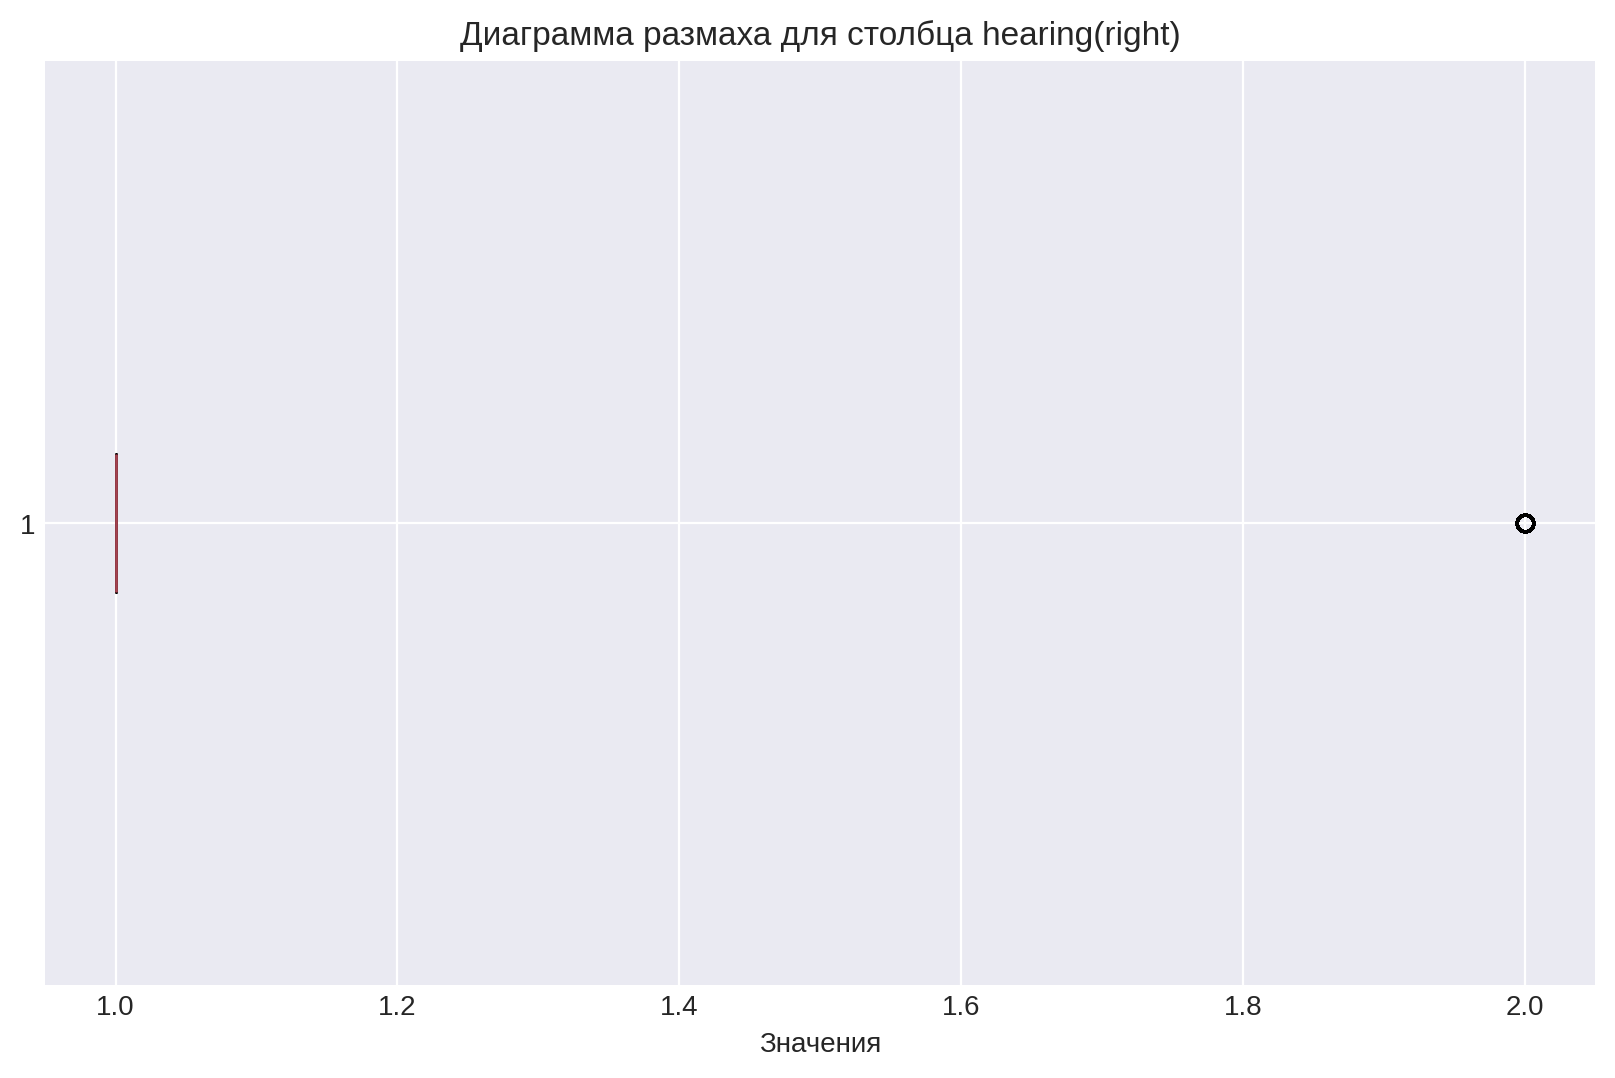

systolic
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 101
Data type: float64
count    13863.000000
mean       123.430643
std         12.964684
min         74.000000
25%        115.000000
50%        122.000000
75%        131.000000
max        240.000000
Name: systolic, dtype: float64
Частота уникальных значений столбца:
 systolic
130.0    947
120.0    912
110.0    881
118.0    816
128.0    469
        ... 
88.0       1
186.0      1
80.0       1
240.0      1
198.0      1
Name: count, Length: 101, dtype: int64
Minimum: 74.0
Maximum: 240.0


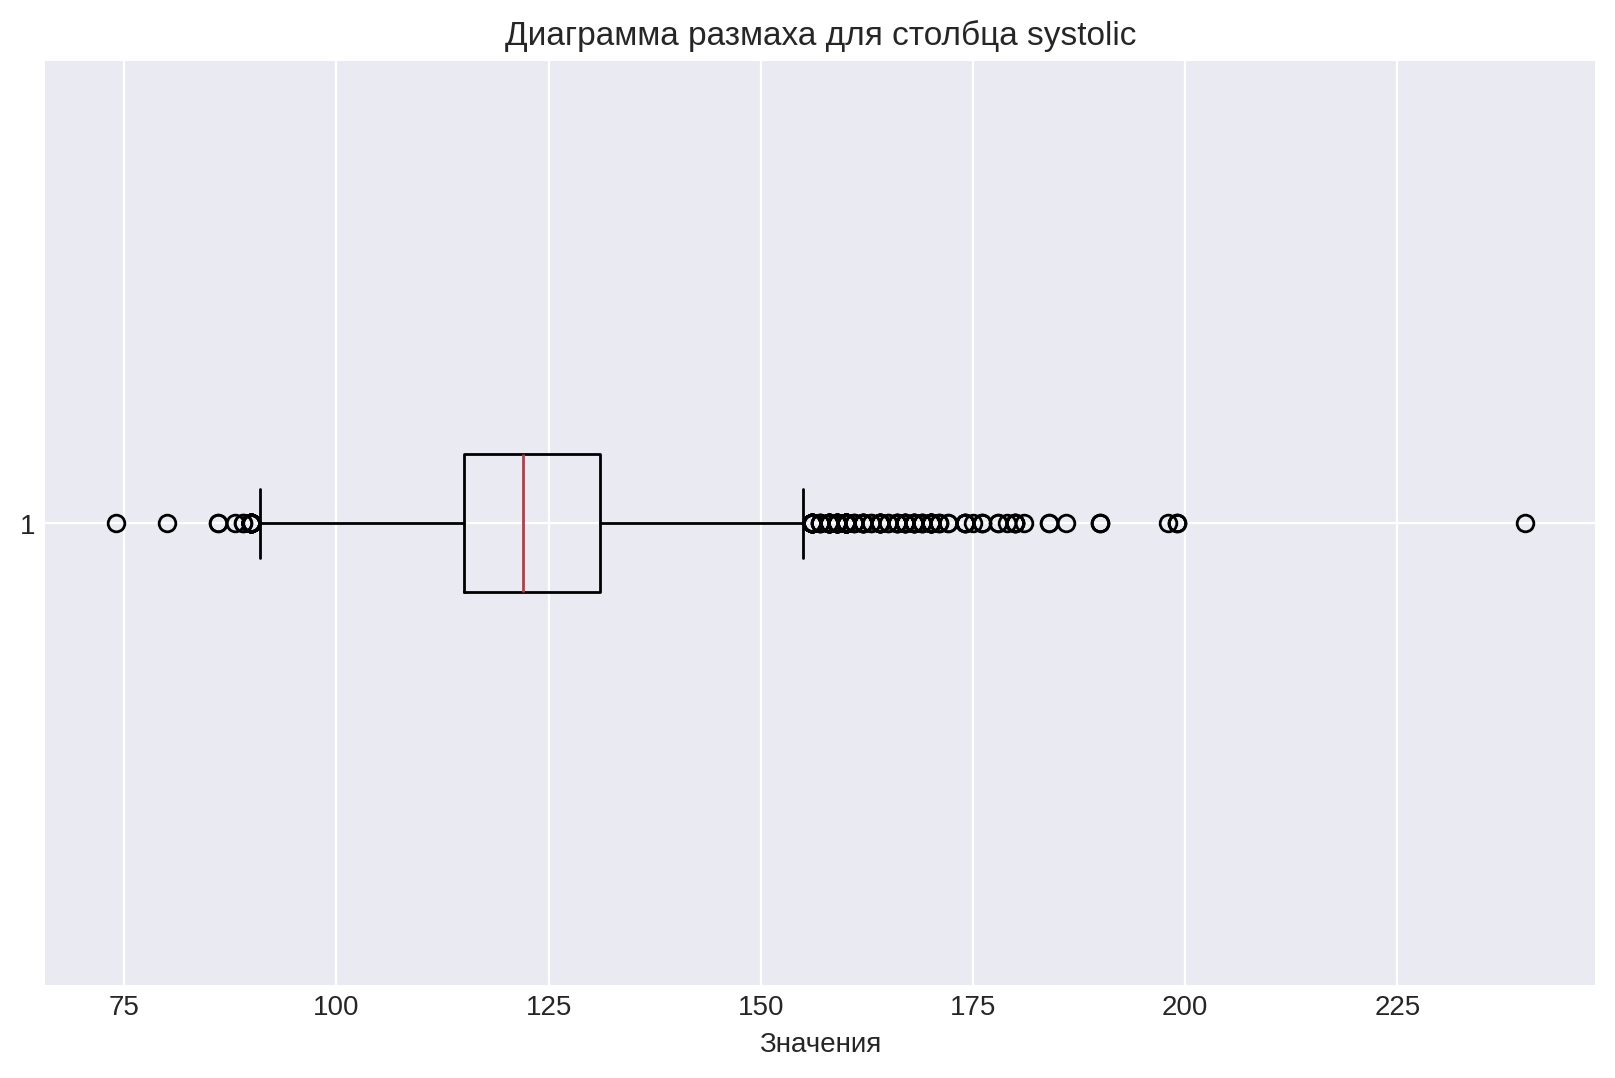

relaxation
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 77
Data type: float64
count    13863.000000
mean        77.166703
std          9.459288
min         40.000000
25%         70.000000
50%         78.000000
75%         83.000000
max        140.000000
Name: relaxation, dtype: float64
Частота уникальных значений столбца:
 relaxation
80.0     1447
70.0     1303
78.0      841
76.0      578
74.0      546
         ... 
123.0       1
48.0        1
117.0       1
140.0       1
46.0        1
Name: count, Length: 77, dtype: int64
Minimum: 40.0
Maximum: 140.0


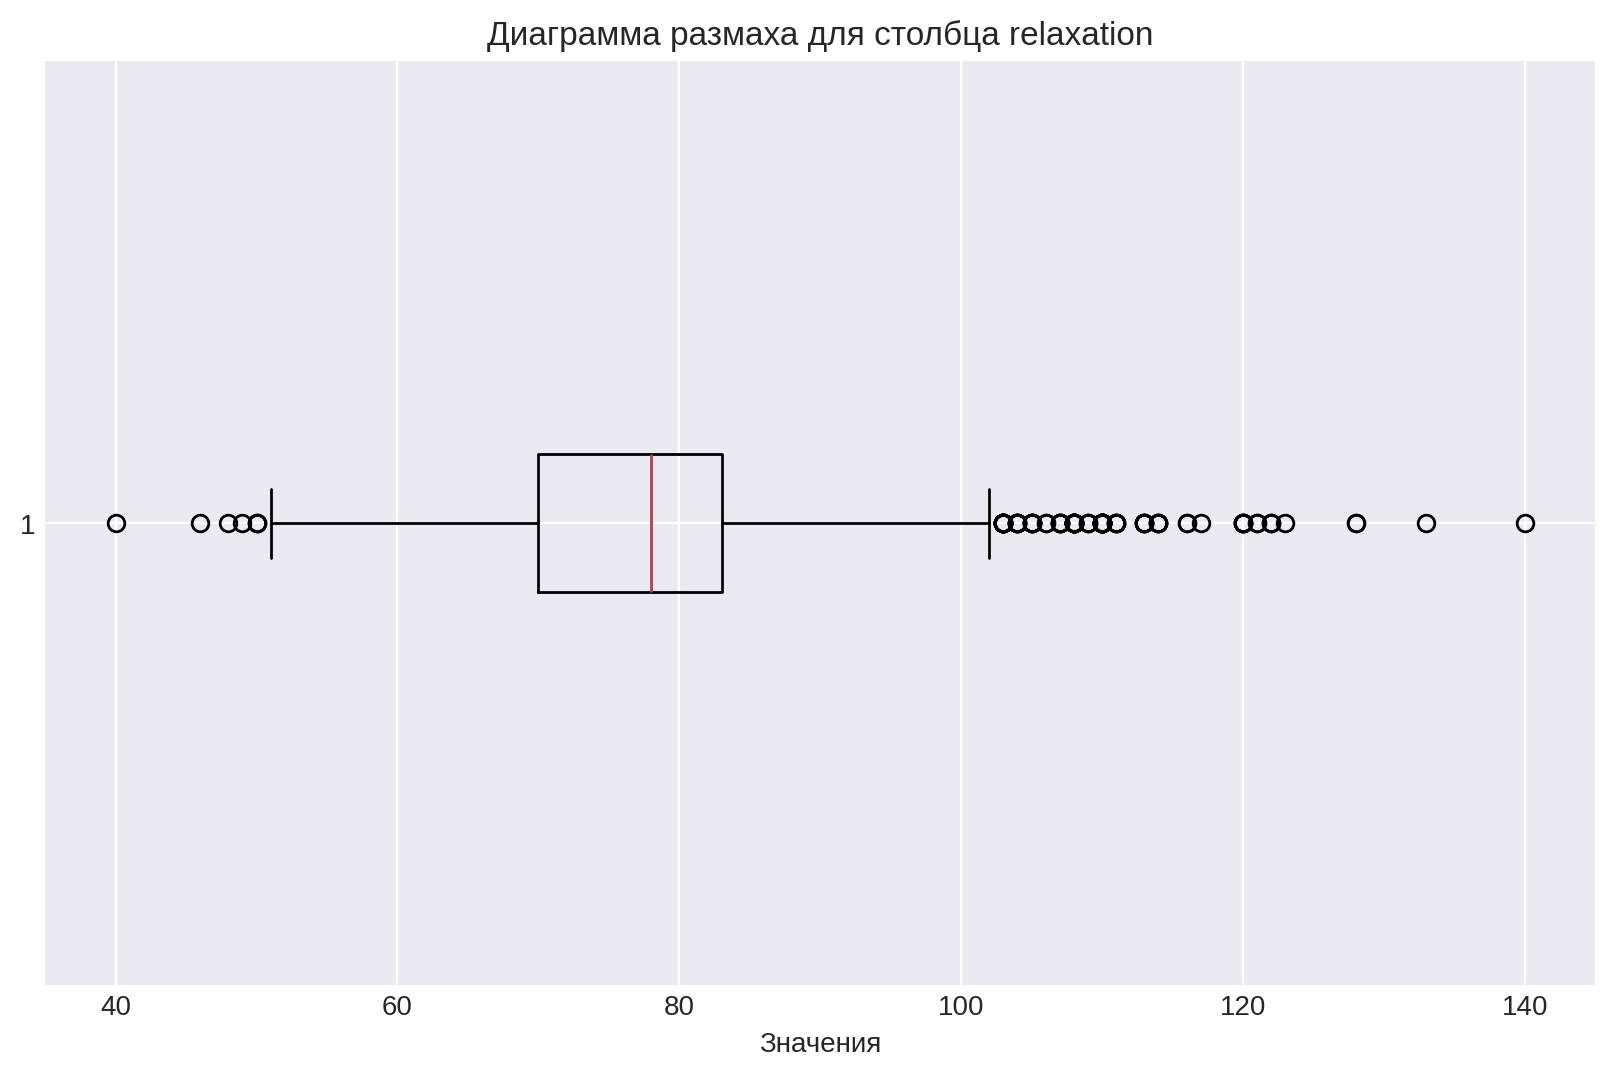

fasting_blood_sugar
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 201
Data type: float64
count    13863.000000
mean        99.937387
std         20.682085
min         48.000000
25%         90.000000
50%         96.000000
75%        104.000000
max        475.000000
Name: fasting_blood_sugar, dtype: float64
Частота уникальных значений столбца:
 fasting_blood_sugar
97.0     588
96.0     567
94.0     555
95.0     541
93.0     540
        ... 
326.0      1
325.0      1
246.0      1
285.0      1
283.0      1
Name: count, Length: 201, dtype: int64
Minimum: 48.0
Maximum: 475.0


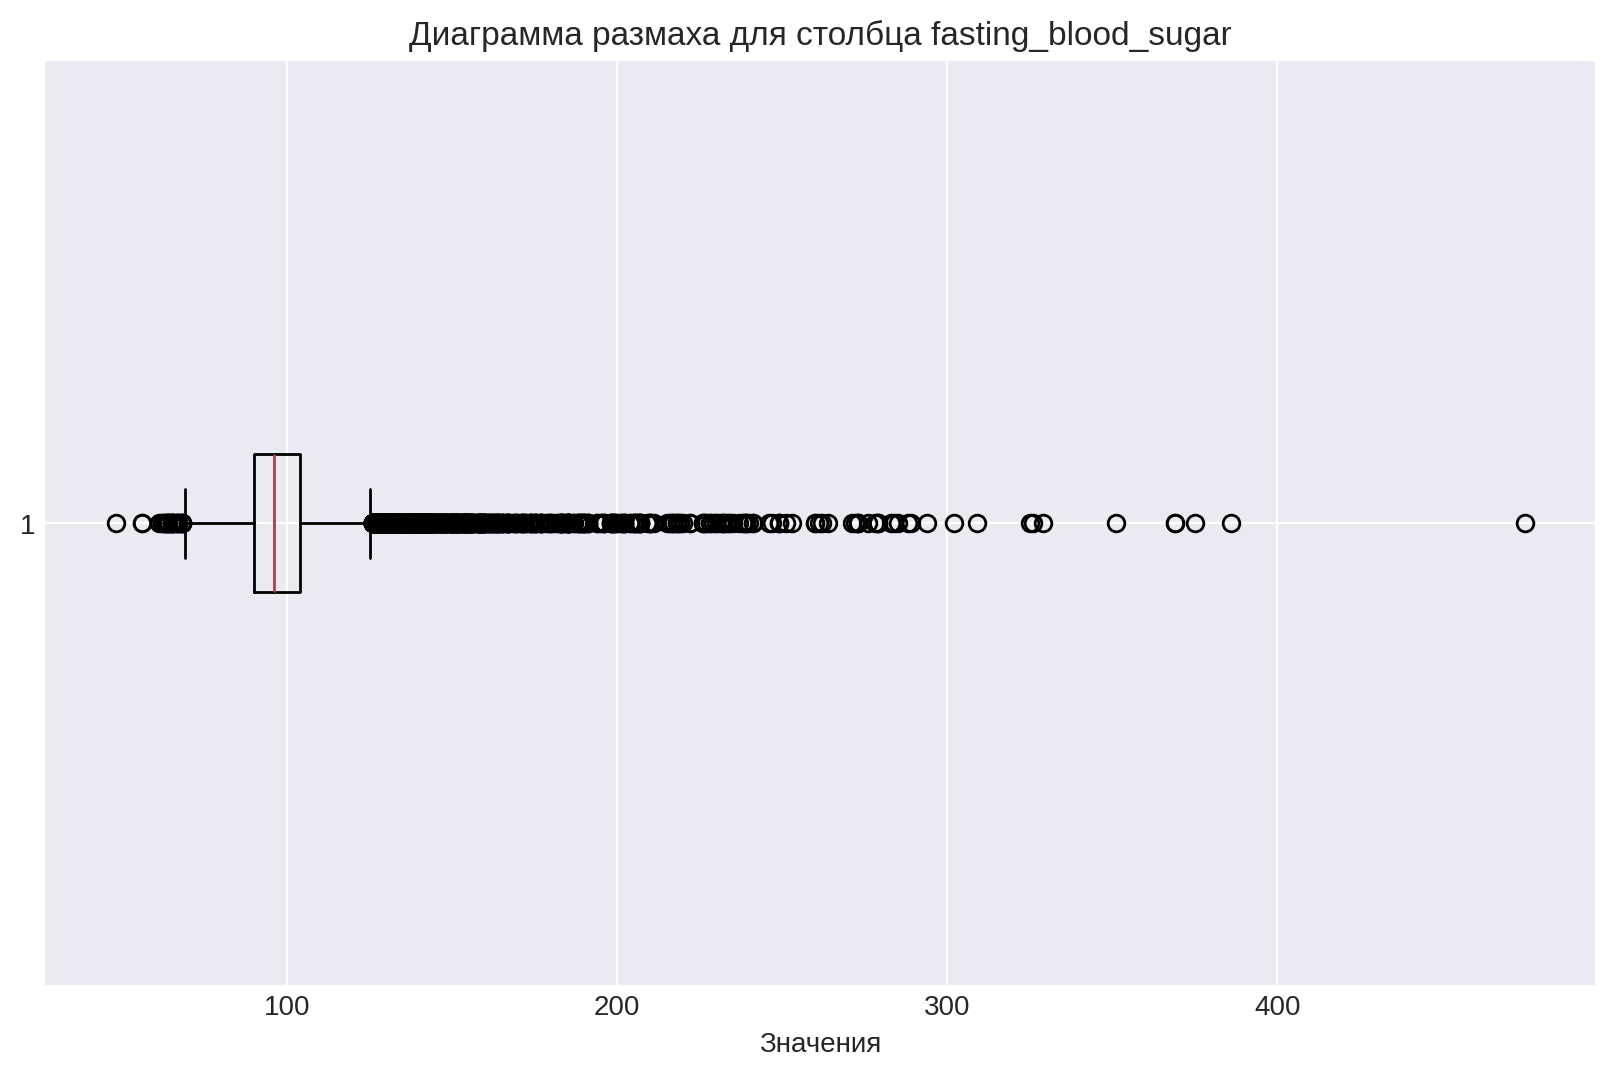

cholesterol
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 241
Data type: float64
count    13863.000000
mean       193.864387
std         35.658783
min         84.000000
25%        169.000000
50%        192.000000
75%        216.000000
max        441.000000
Name: cholesterol, dtype: float64
Частота уникальных значений столбца:
 cholesterol
193.0    186
199.0    179
176.0    174
190.0    172
192.0    171
        ... 
90.0       1
319.0      1
101.0      1
303.0      1
311.0      1
Name: count, Length: 241, dtype: int64
Minimum: 84.0
Maximum: 441.0


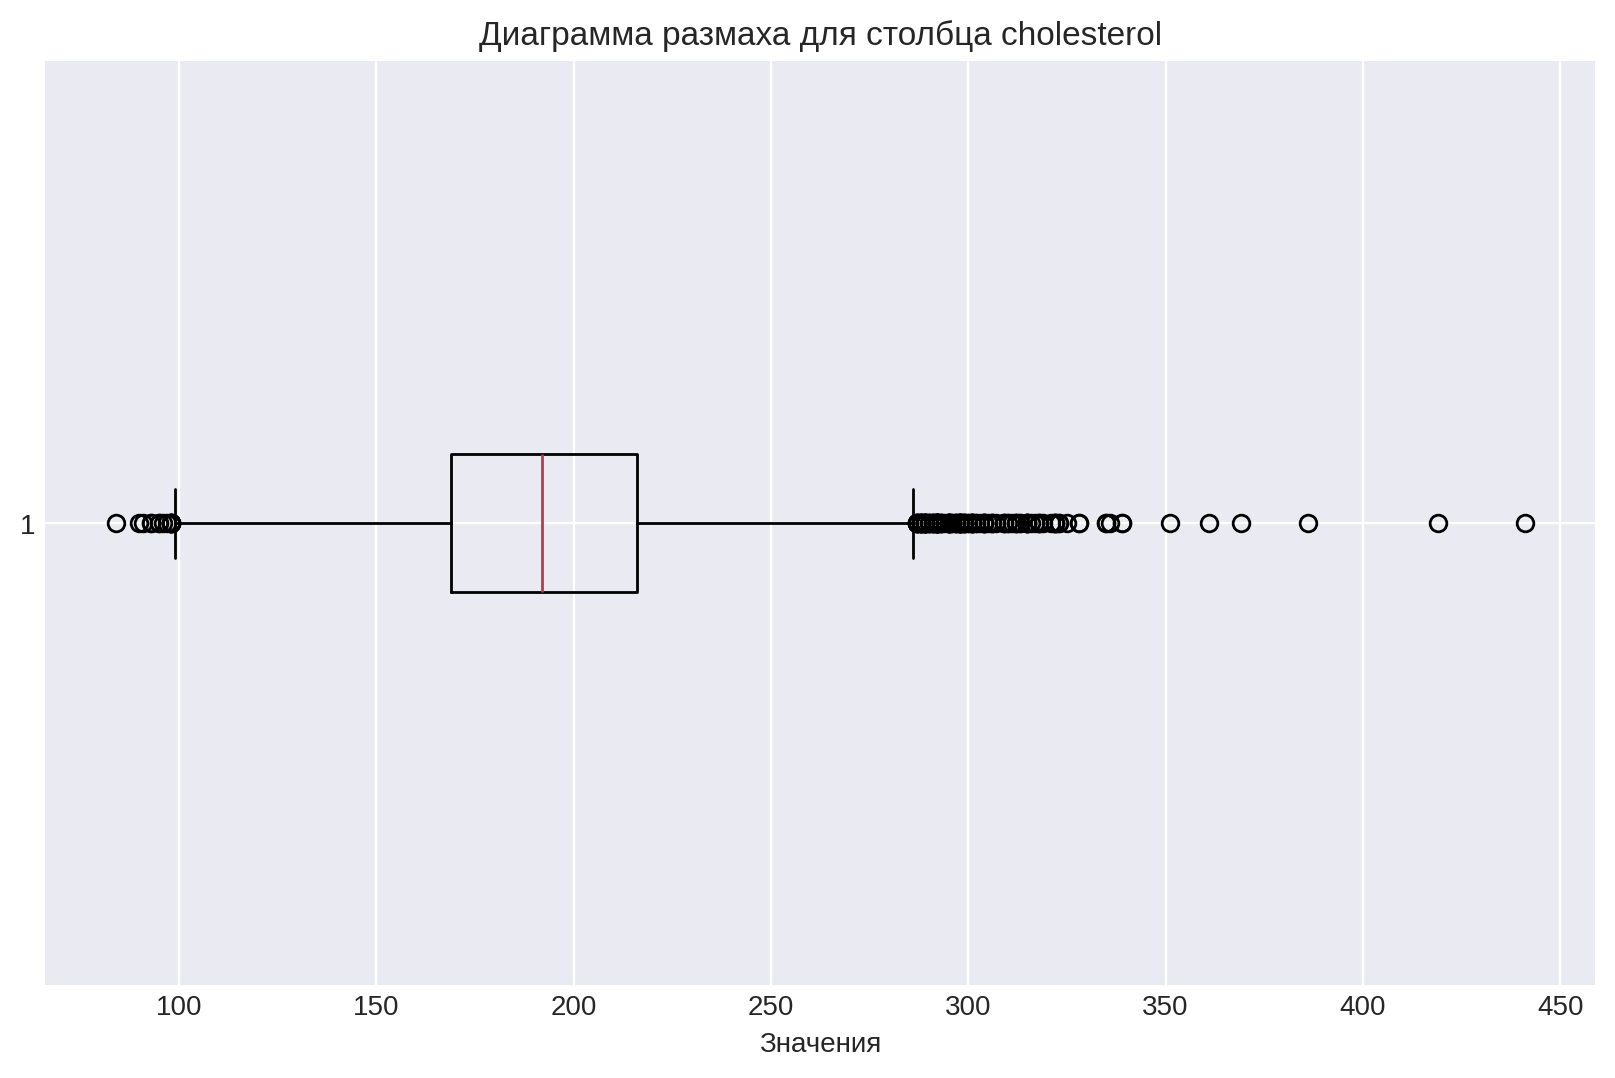

triglyceride
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 380
Data type: float64
count    13863.000000
mean       130.917767
std         71.348298
min         16.000000
25%         78.000000
50%        113.000000
75%        166.000000
max        466.000000
Name: triglyceride, dtype: float64
Частота уникальных значений столбца:
 triglyceride
82.0     130
79.0     126
74.0     124
71.0     122
101.0    116
        ... 
405.0      1
466.0      1
373.0      1
381.0      1
369.0      1
Name: count, Length: 380, dtype: int64
Minimum: 16.0
Maximum: 466.0


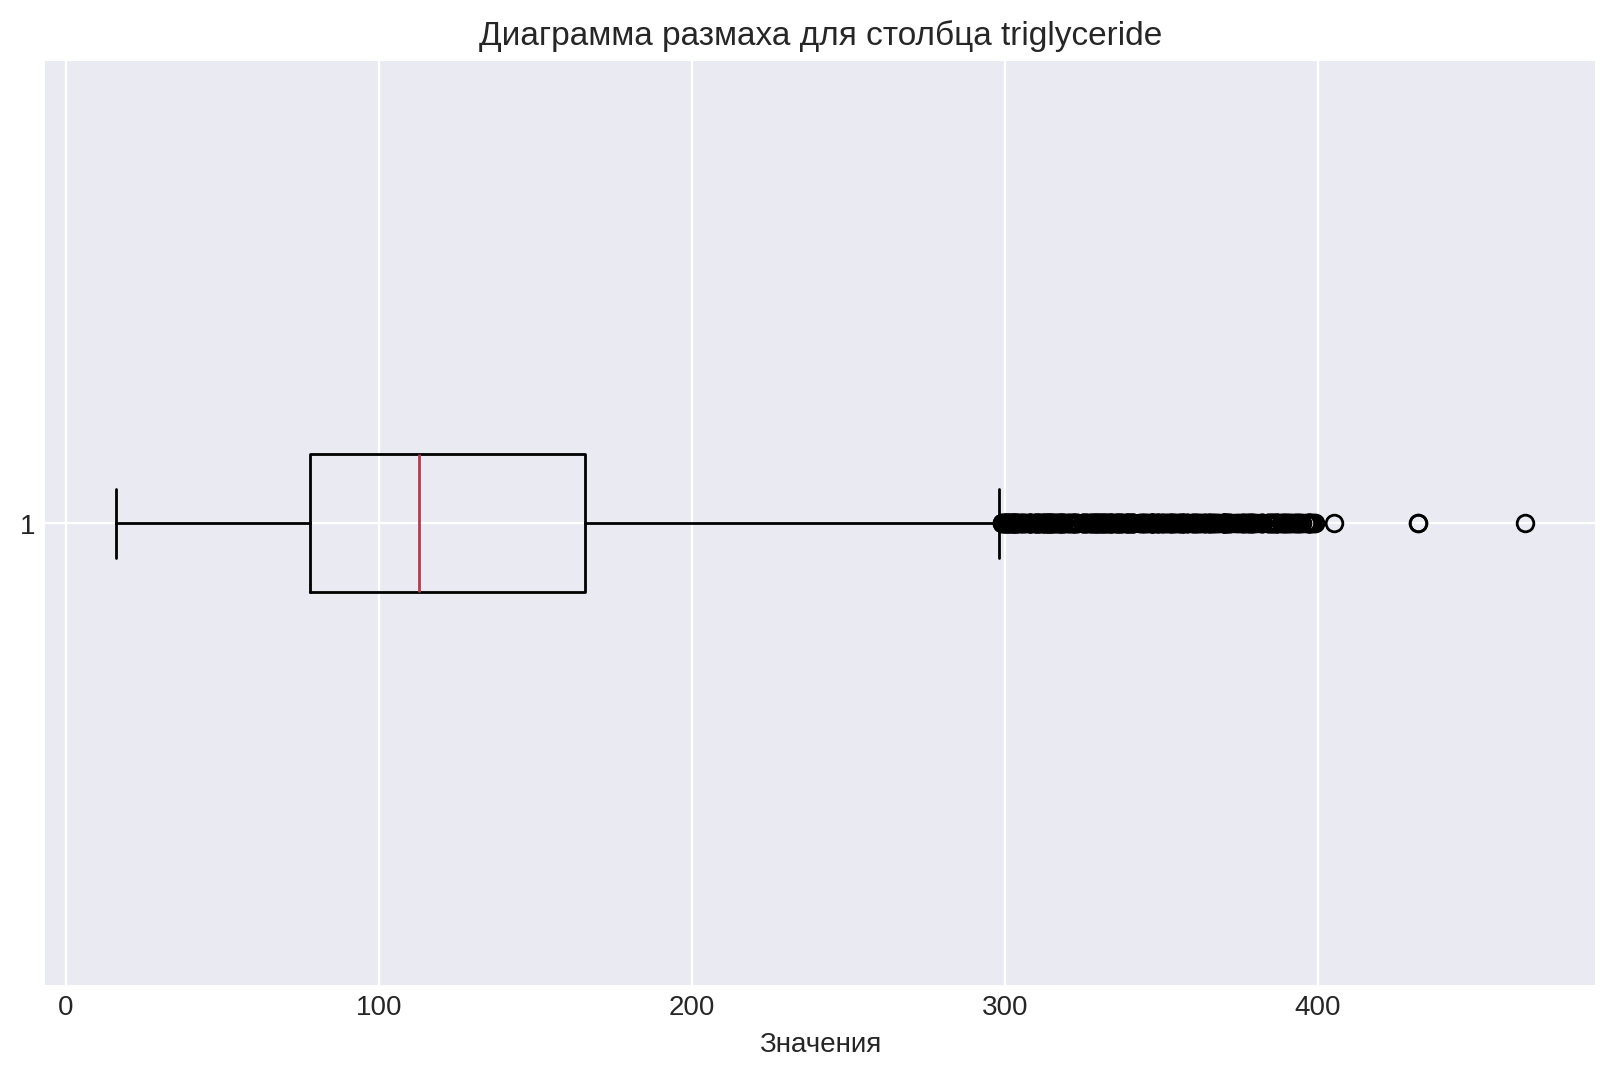

hdl
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 105
Data type: float64
count    13863.000000
mean        54.204357
std         13.168432
min          4.000000
25%         45.000000
50%         53.000000
75%         61.000000
max        359.000000
Name: hdl, dtype: float64
Частота уникальных значений столбца:
 hdl
46.0     519
47.0     498
53.0     472
49.0     466
45.0     463
        ... 
128.0      1
121.0      1
131.0      1
117.0      1
116.0      1
Name: count, Length: 105, dtype: int64
Minimum: 4.0
Maximum: 359.0


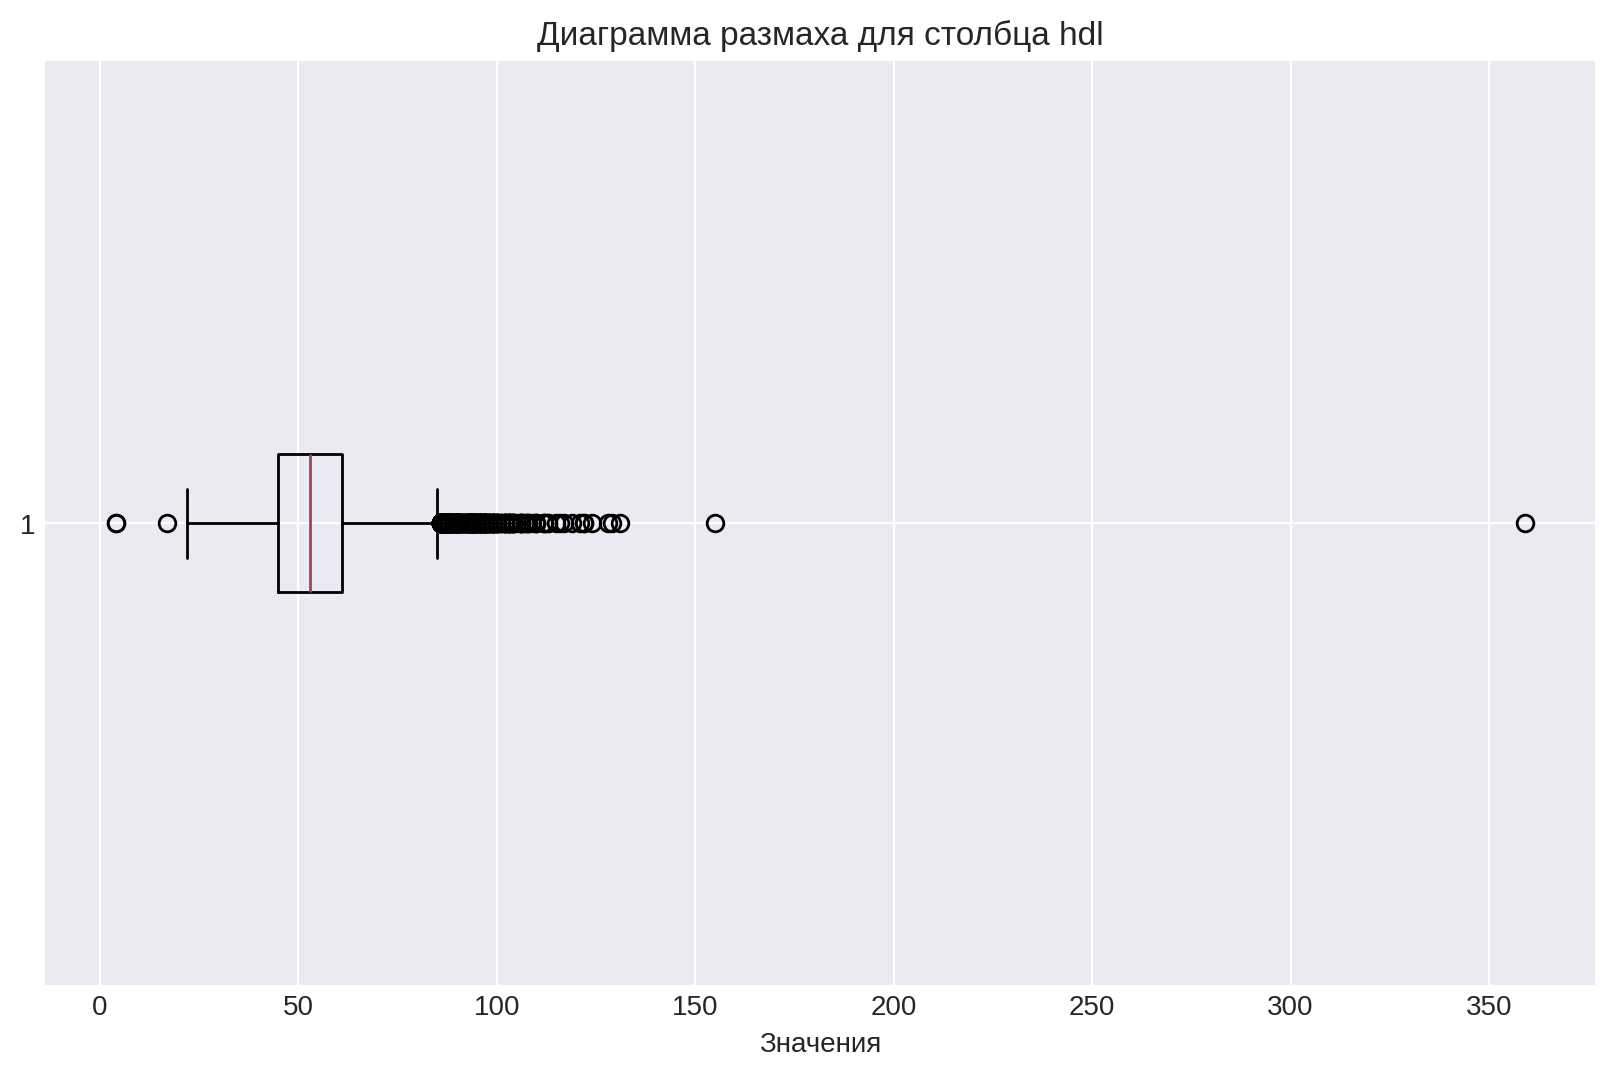

ldl
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 233
Data type: float64
count    13863.000000
mean       114.435476
std         42.050428
min          7.000000
25%         91.000000
50%        113.000000
75%        135.000000
max       1340.000000
Name: ldl, dtype: float64
Частота уникальных значений столбца:
 ldl
112.0     192
104.0     187
96.0      186
106.0     185
121.0     182
         ... 
250.0       1
311.0       1
1070.0      1
251.0       1
15.0        1
Name: count, Length: 233, dtype: int64
Minimum: 7.0
Maximum: 1340.0


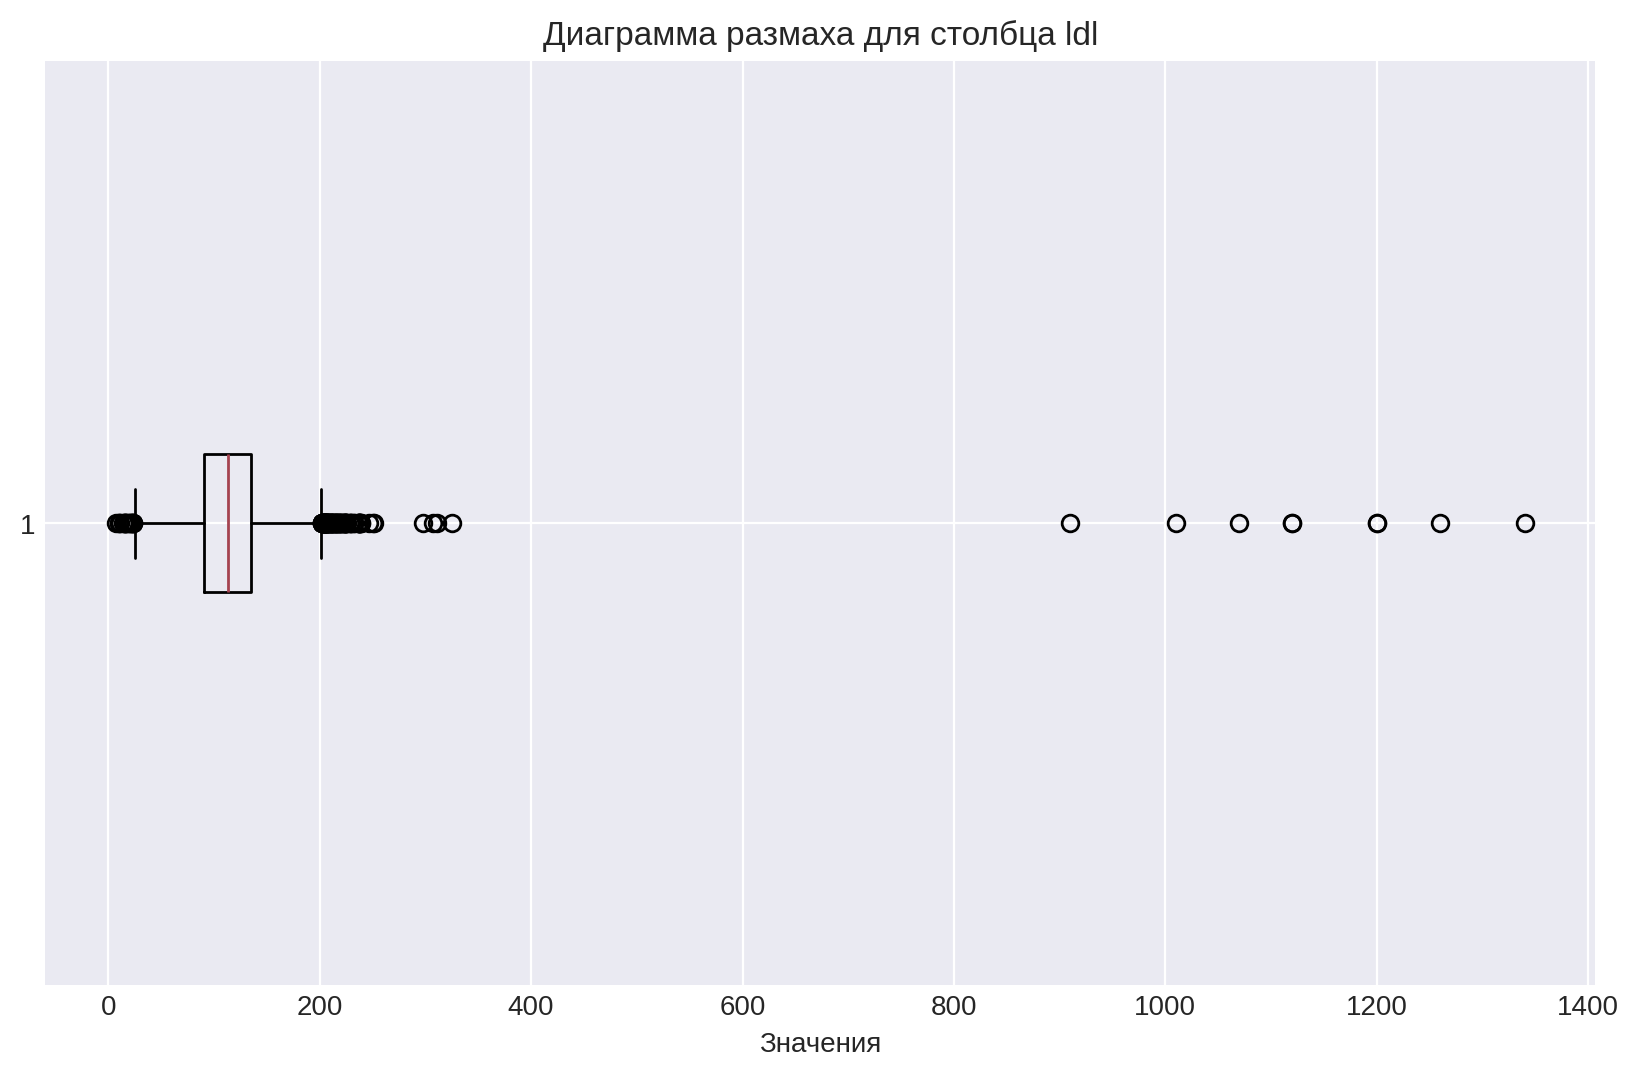

hemoglobin
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 103
Data type: float64
count    13863.000000
mean        15.402200
std          1.052598
min          6.300000
25%         14.800000
50%         15.400000
75%         16.100000
max         19.600000
Name: hemoglobin, dtype: float64
Частота уникальных значений столбца:
 hemoglobin
15.4    597
15.7    585
15.3    552
15.6    551
15.5    545
       ... 
10.7      1
19.4      1
10.0      1
11.2      1
7.1       1
Name: count, Length: 103, dtype: int64
Minimum: 6.3
Maximum: 19.6


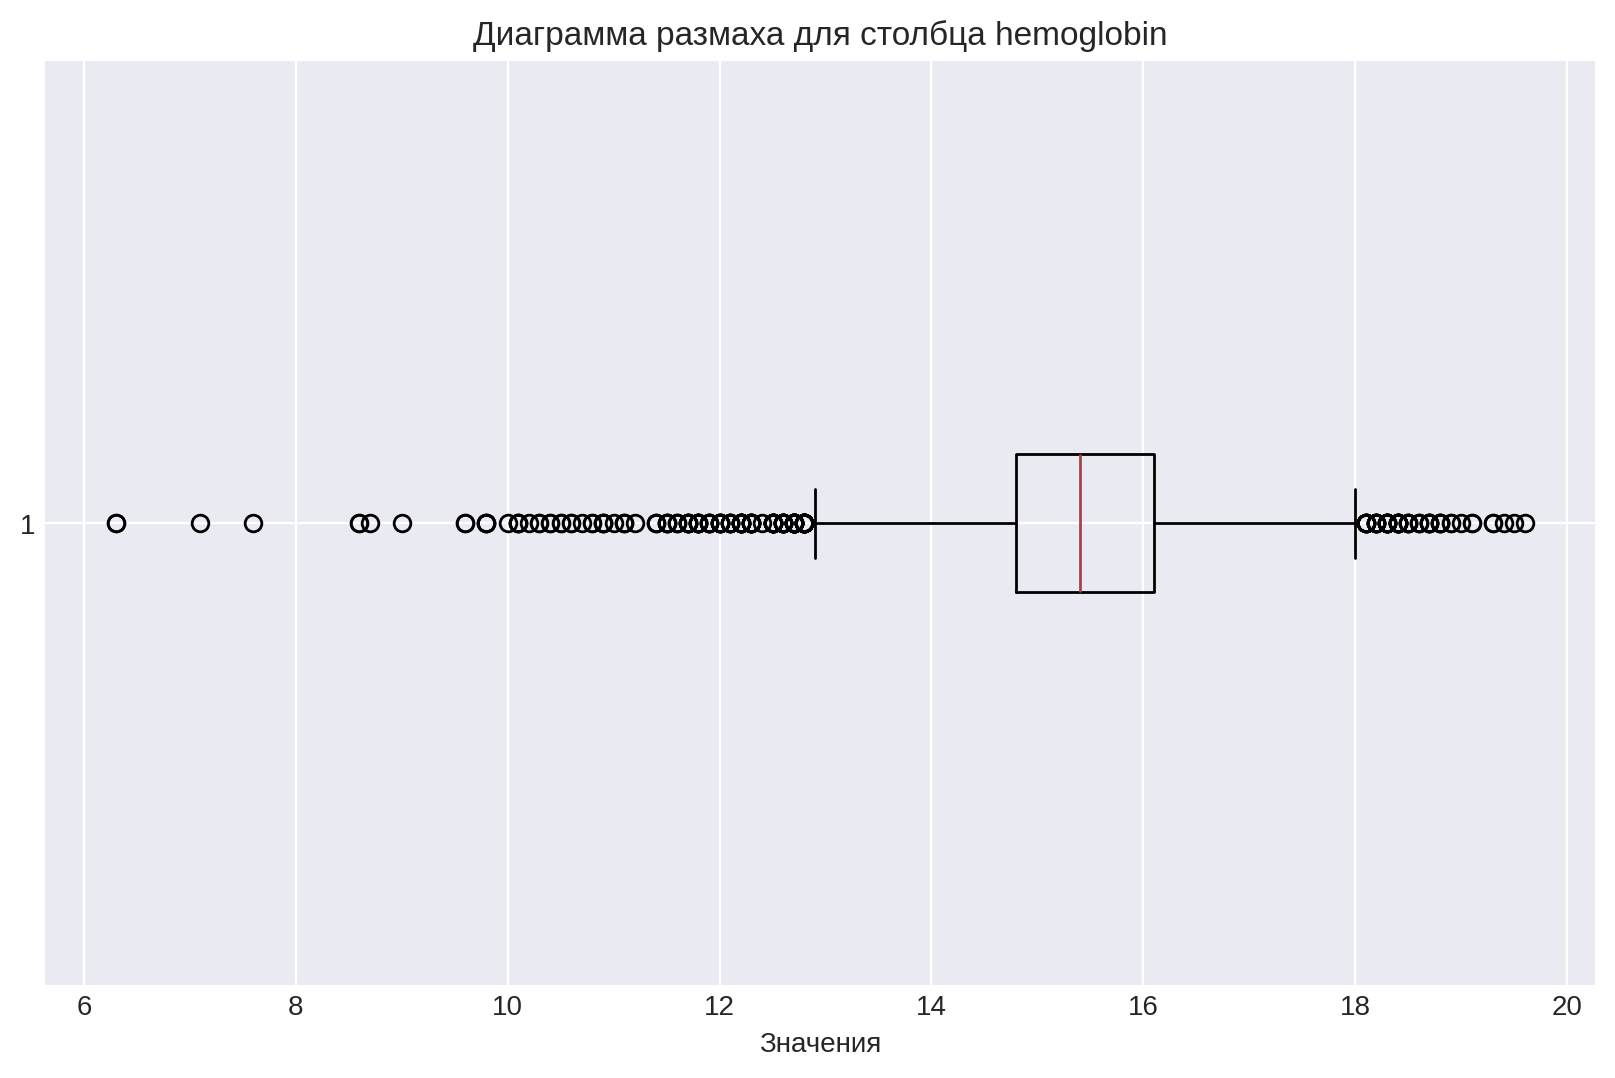

urine_protein
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 6
Data type: float64
count    13863.000000
mean         1.093775
std          0.421272
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: urine_protein, dtype: float64
Частота уникальных значений столбца:
 urine_protein
1.0    13027
2.0      514
3.0      214
4.0       75
5.0       32
6.0        1
Name: count, dtype: int64
Minimum: 1.0
Maximum: 6.0


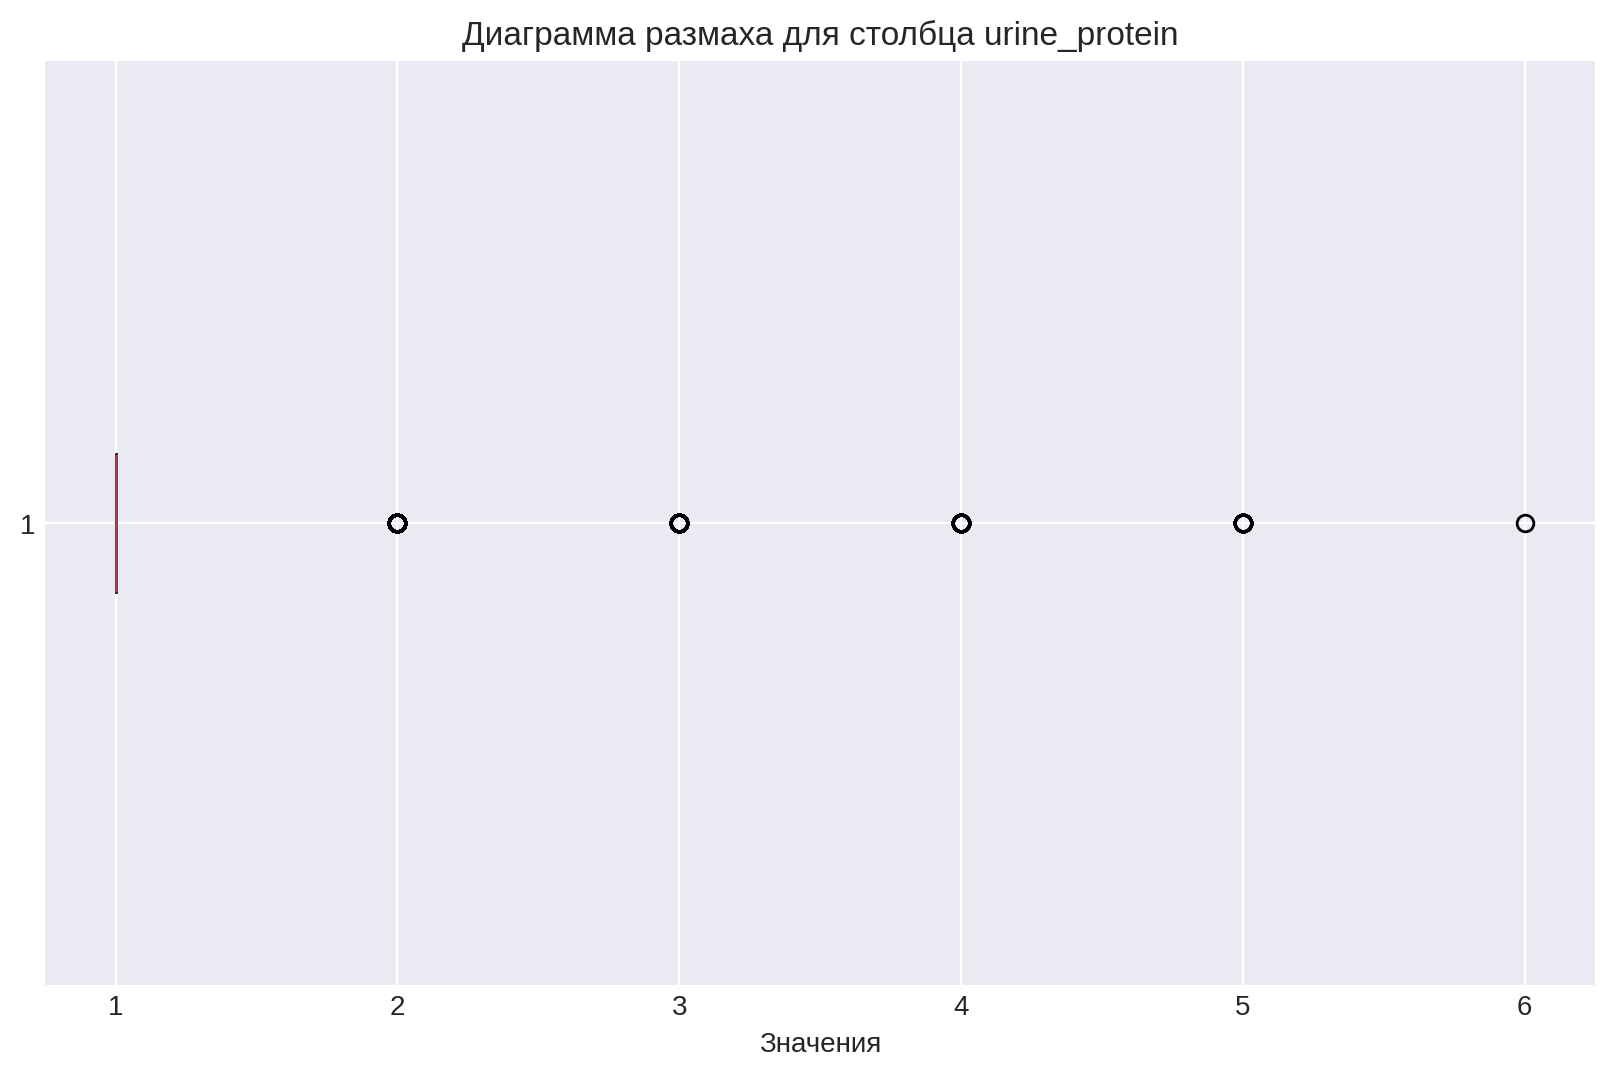

serum_creatinine
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 30
Data type: float64
count    13863.000000
mean         0.981808
std          0.240337
min          0.100000
25%          0.900000
50%          1.000000
75%          1.100000
max         10.000000
Name: serum_creatinine, dtype: float64
Частота уникальных значений столбца:
 serum_creatinine
1.0     3544
0.9     3279
1.1     2340
0.8     1940
1.2     1239
0.7      708
1.3      374
0.6      165
1.4      130
1.5       53
0.5       27
1.6       14
1.7       10
0.1        9
1.8        5
2.1        3
2.0        3
1.9        3
2.2        2
7.4        2
10.0       2
2.5        2
0.3        2
3.4        1
0.2        1
2.6        1
6.4        1
9.9        1
5.0        1
7.5        1
Name: count, dtype: int64
Minimum: 0.1
Maximum: 10.0


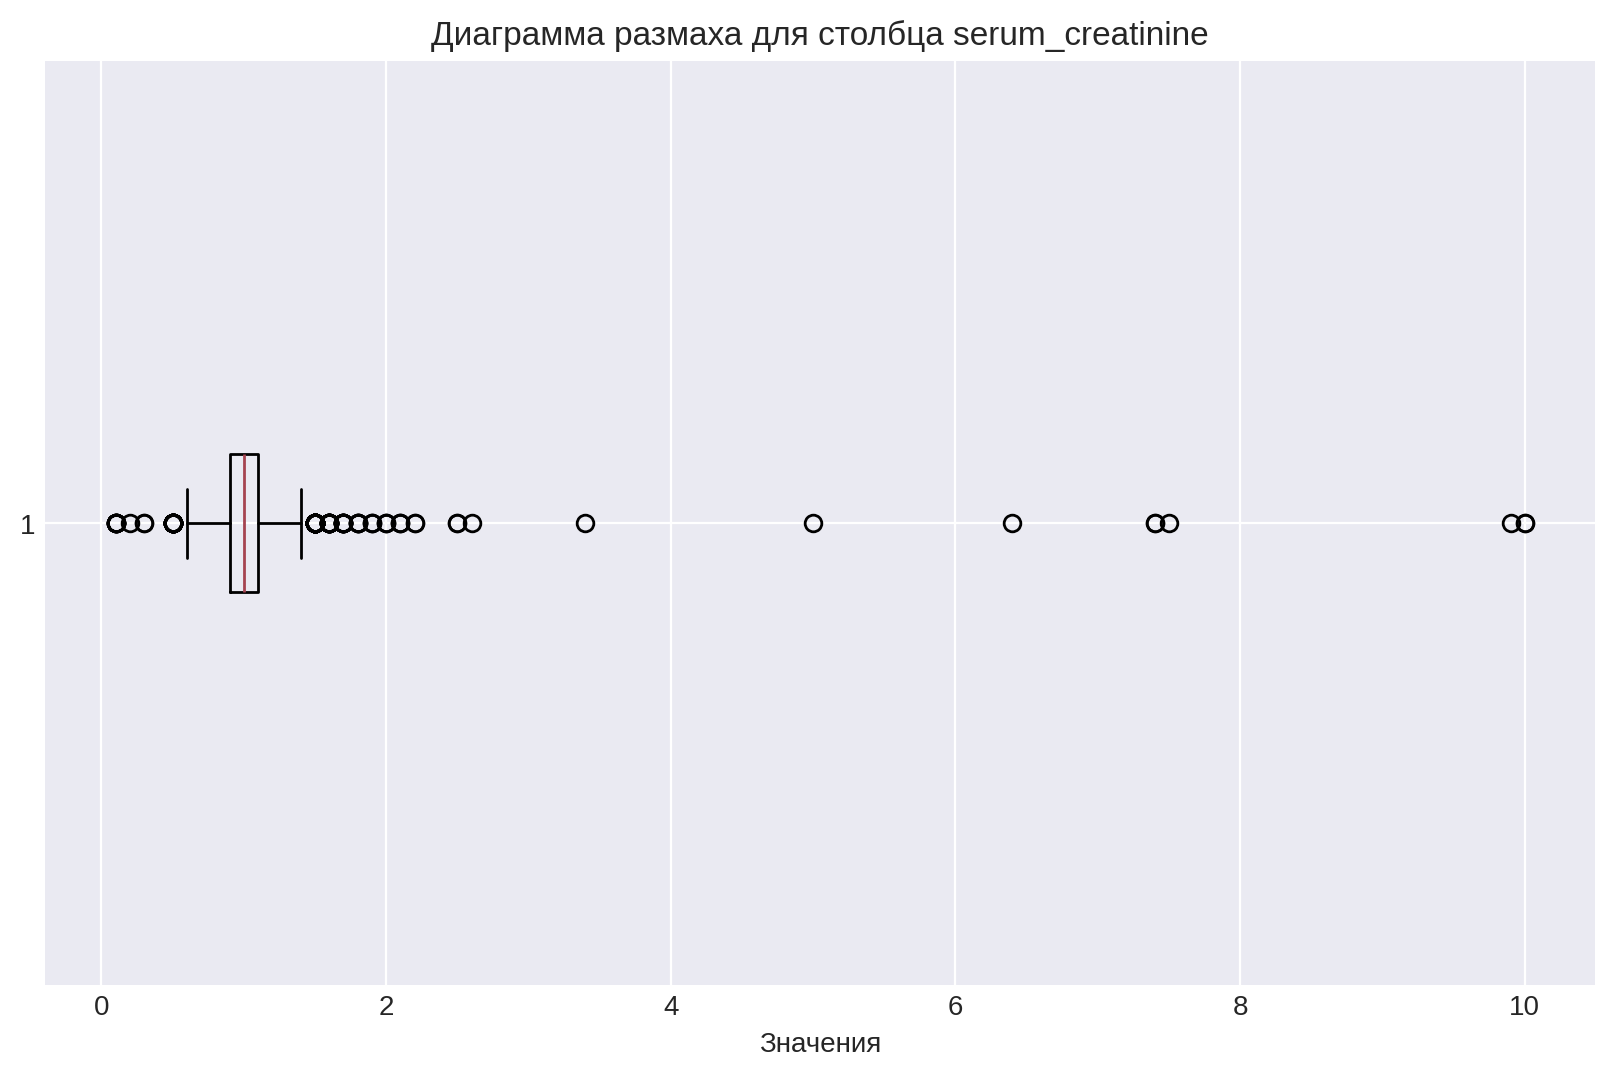

ast
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 151
Data type: float64
count    13863.000000
mean        27.597562
std         21.559820
min          7.000000
25%         20.000000
50%         24.000000
75%         30.000000
max        981.000000
Name: ast, dtype: float64
Частота уникальных значений столбца:
 ast
22.0     875
20.0     868
21.0     850
23.0     849
24.0     805
        ... 
92.0       1
324.0      1
320.0      1
341.0      1
189.0      1
Name: count, Length: 151, dtype: int64
Minimum: 7.0
Maximum: 981.0


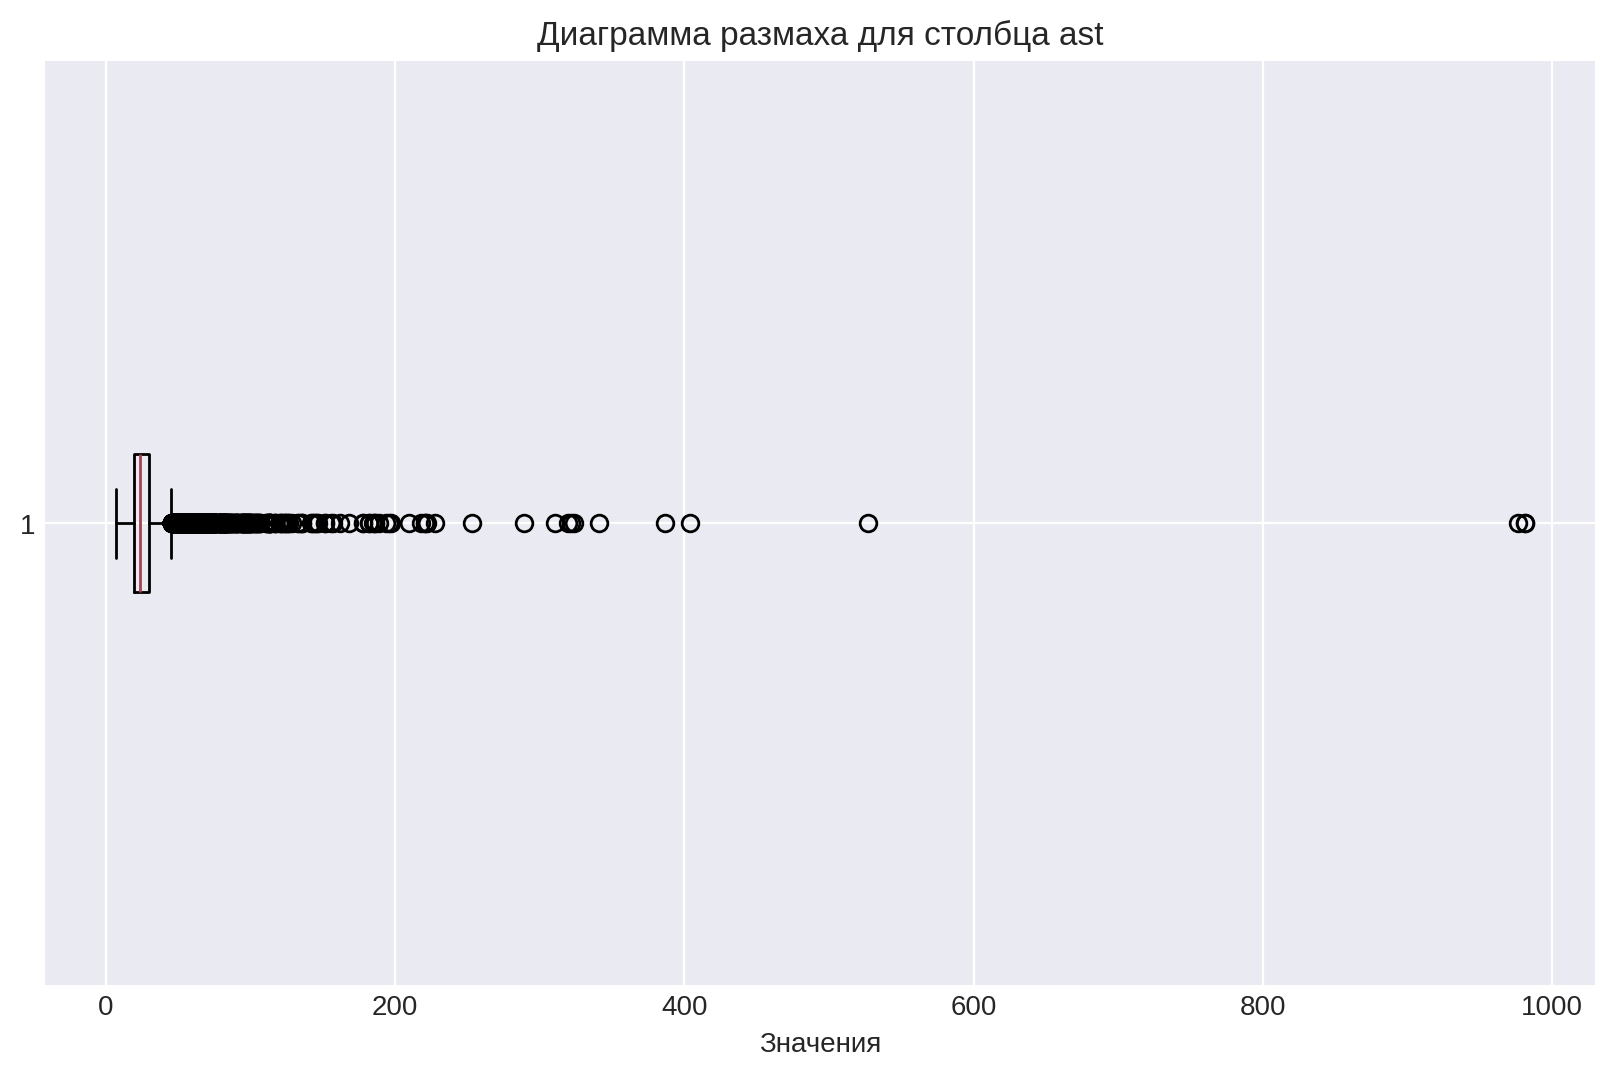

alt
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 192
Data type: float64
count    13863.000000
mean        30.772921
std         36.441688
min          2.000000
25%         18.000000
50%         24.000000
75%         35.000000
max       2914.000000
Name: alt, dtype: float64
Частота уникальных значений столбца:
 alt
17.0      624
18.0      603
19.0      592
20.0      575
16.0      561
         ... 
133.0       1
2914.0      1
183.0       1
327.0       1
113.0       1
Name: count, Length: 192, dtype: int64
Minimum: 2.0
Maximum: 2914.0


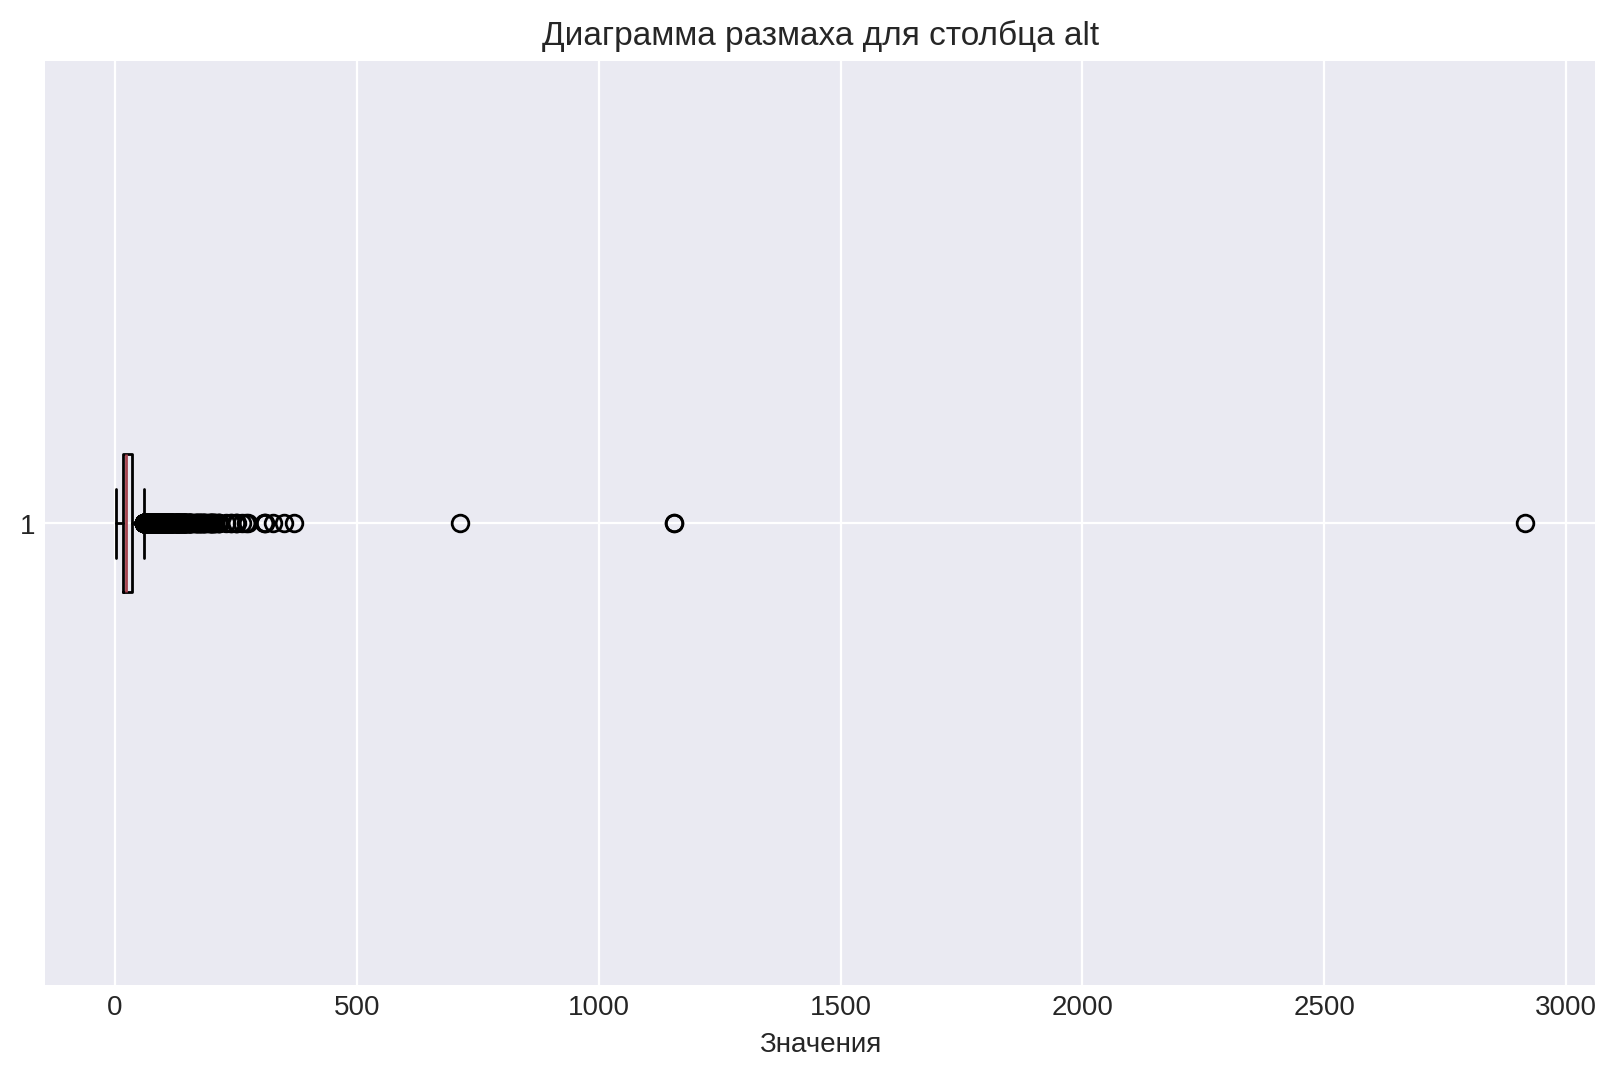

gtp
Кол-во Null и Na значений: 0
Кол-во уникальных значений: 336
Data type: float64
count    13863.000000
mean        43.442978
std         50.342097
min          2.000000
25%         20.000000
50%         29.000000
75%         48.000000
max        999.000000
Name: gtp, dtype: float64
Частота уникальных значений столбца:
 gtp
18.0     499
19.0     465
20.0     456
22.0     452
21.0     443
        ... 
497.0      1
181.0      1
397.0      1
275.0      1
766.0      1
Name: count, Length: 336, dtype: int64
Minimum: 2.0
Maximum: 999.0


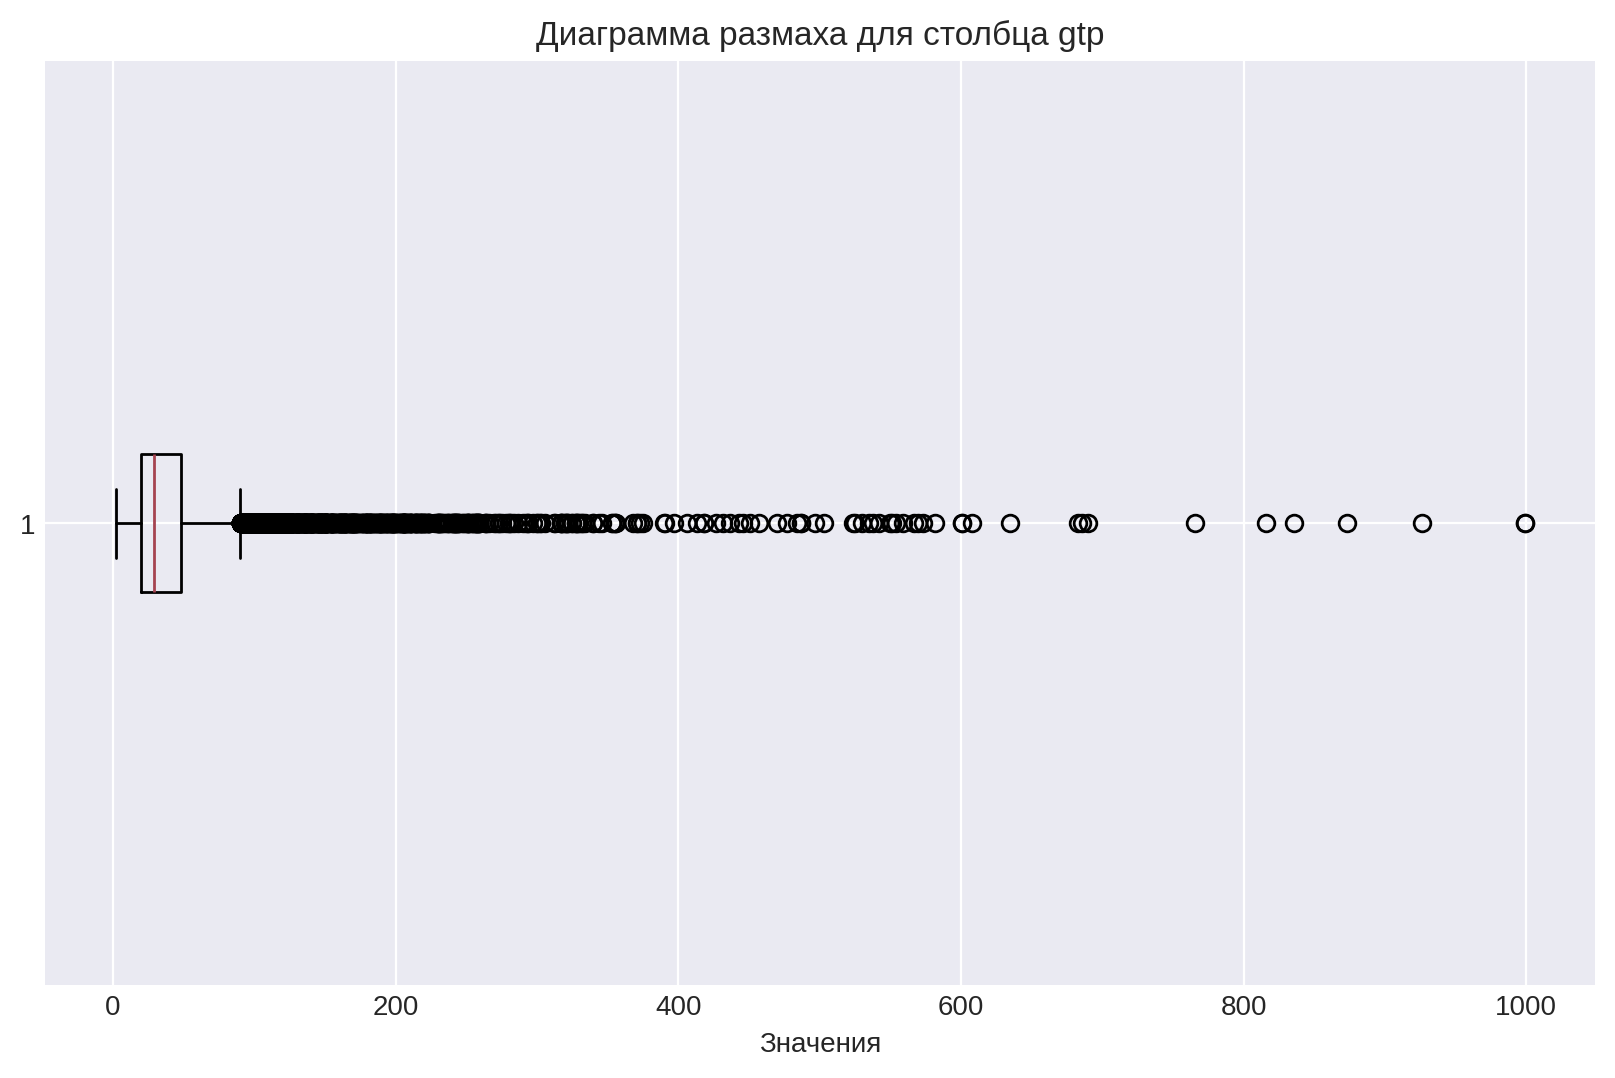

In [50]:
for col in med_features:
    investigate_column(train[col])

Выбросы присутствуют, нельзя однозначно сказать, качественные это данные или ошибочные, так как индивидуальные медицинские показатели могут очень разниться от одного человека к другому. Так как наш целевой признак в исследовании - это показатель "курение" , то целесообразно будет избавиться лишь от очень больших отклонений в датасете и пожертвовать небольшим количеством данных

#### 2.5.1 Анализ `hemoglobine`

Гемоглобин - один из важнейших показателей здоровья человека. Изучим распределение признака по нашей группе. Построим гистрограммы для курящиъ и некурящих участников исследования


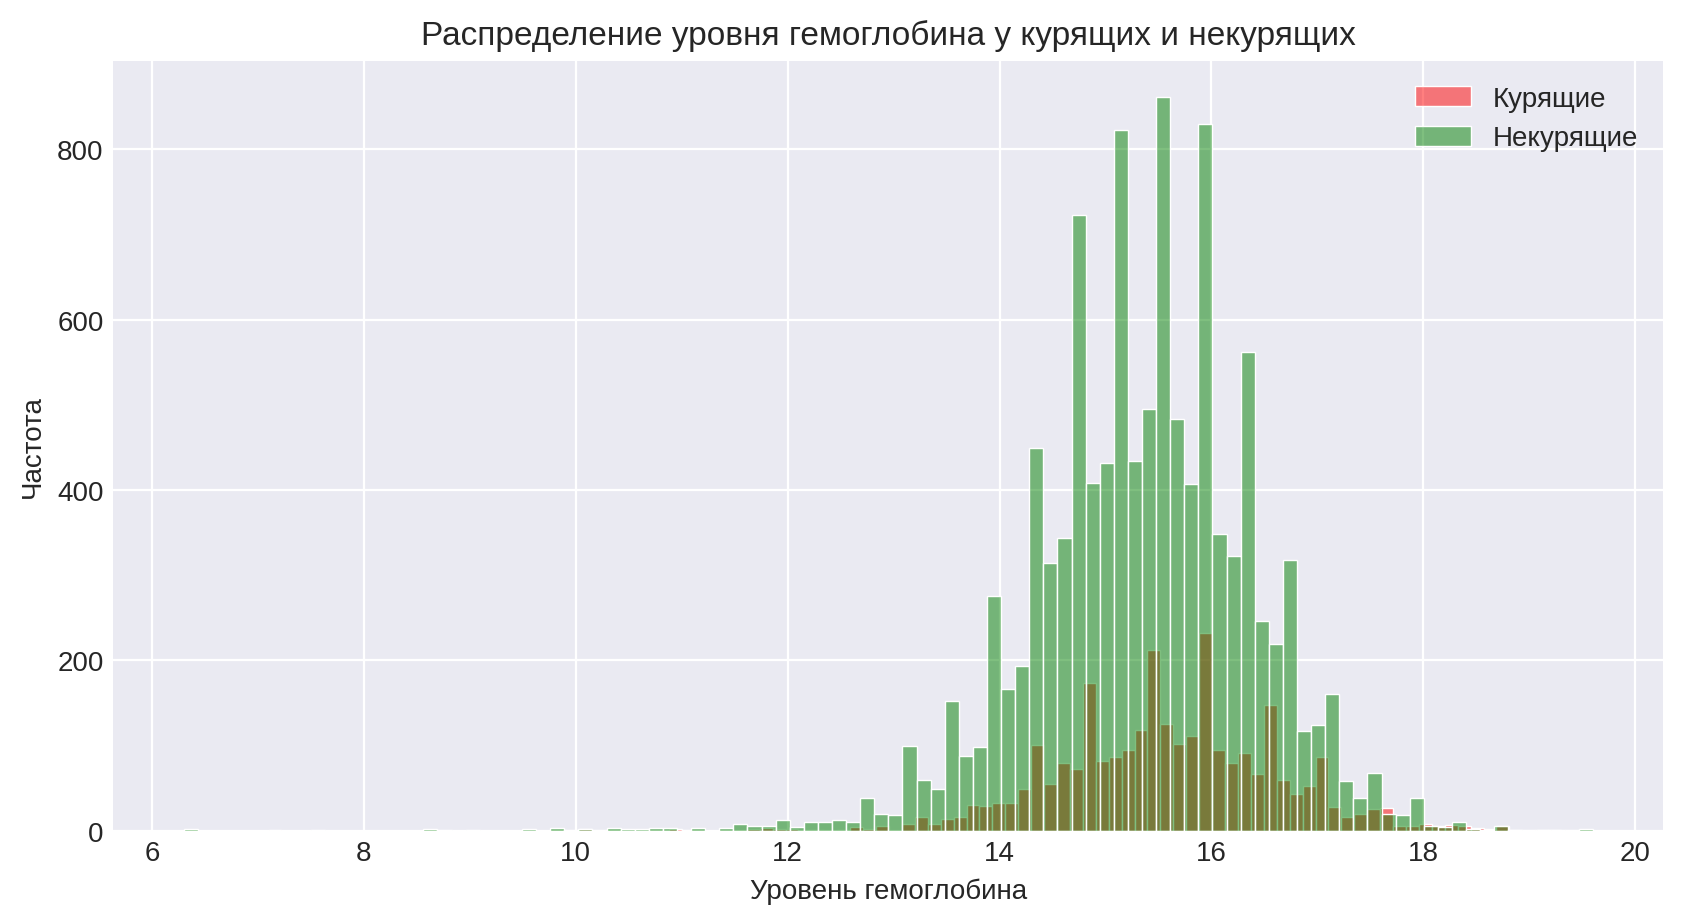

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df_smokers["hemoglobin"],
    bins=100,
    kde=False,
    color="red",
    alpha=0.5,
    label="Курящие",
)
sns.histplot(
    df_non_smokers["hemoglobin"],
    bins=100,
    kde=False,
    color="green",
    alpha=0.5,
    label="Некурящие",
)
plt.xlabel("Уровень гемоглобина")
plt.ylabel("Частота")
plt.title("Распределение уровня гемоглобина у курящих и некурящих")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
df_smokers["hemoglobin"].mean()

15.573821428571428

In [53]:
df_non_smokers["hemoglobin"].mean()

15.358763445719967

Значения распределены схожим образом по группам курящих и некурящих

#### 2.5.2 Анализ `triglyceride`

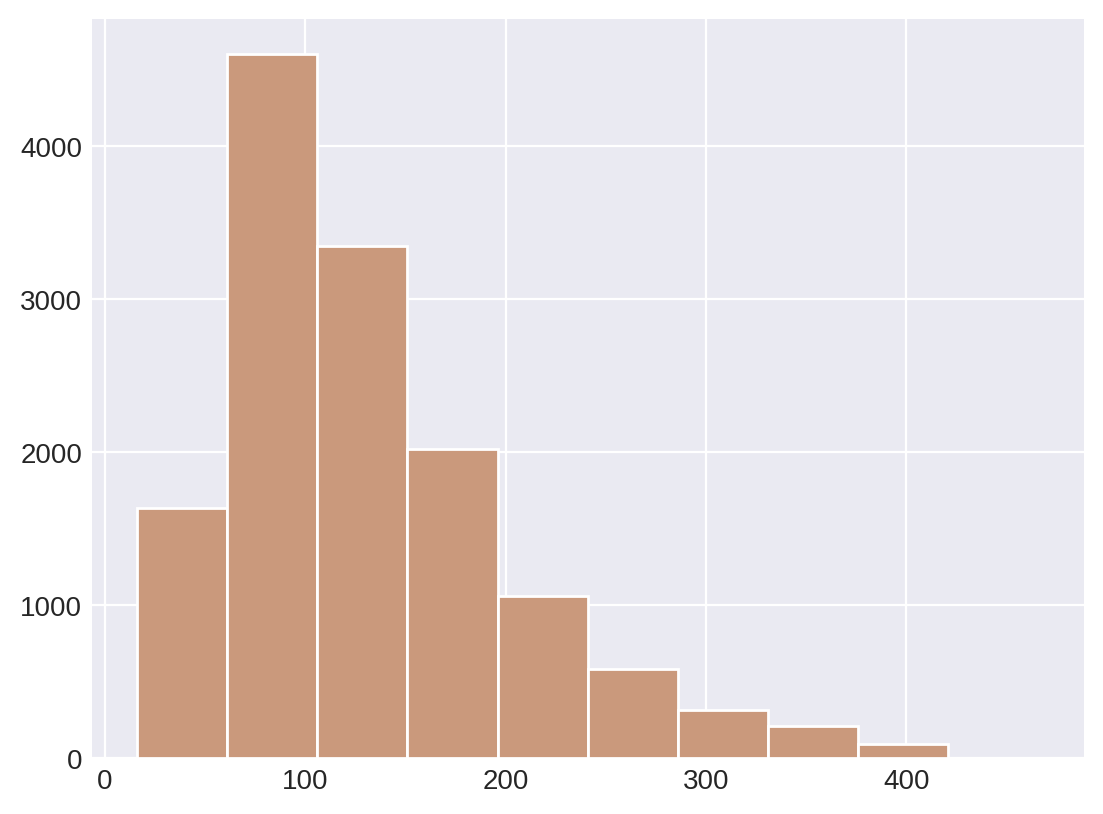

In [54]:
train["triglyceride"].hist();

Разобьем на группы по признаку и проанализируем их

In [55]:
train["triglyceride_group"] = pd.cut(
    train["triglyceride"], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400]
)

In [56]:
t = train.groupby("triglyceride_group")["smoking"].value_counts(normalize=True)
t.unstack().style.background_gradient(cmap="coolwarm")

In [57]:
t = t.reset_index()
t["proportion"] = pd.to_numeric(t["proportion"], errors="coerce")
t["triglyceride_group"] = t["triglyceride_group"].astype("category")
t

triglyceride_group  smoking  proportion
0             (0, 50]        0    0.890274
1             (0, 50]        1    0.109726
2           (50, 100]        0    0.852245
3           (50, 100]        1    0.147755
4          (100, 150]        0    0.786138
5          (100, 150]        1    0.213862
6          (150, 200]        0    0.765596
7          (150, 200]        1    0.234404
8          (200, 250]        0    0.703494
9          (200, 250]        1    0.296506
10         (250, 300]        0    0.678700
11         (250, 300]        1    0.321300
12         (300, 350]        0    0.725086
13         (300, 350]        1    0.274914
14         (350, 400]        0    0.614583
15         (350, 400]        1    0.385417

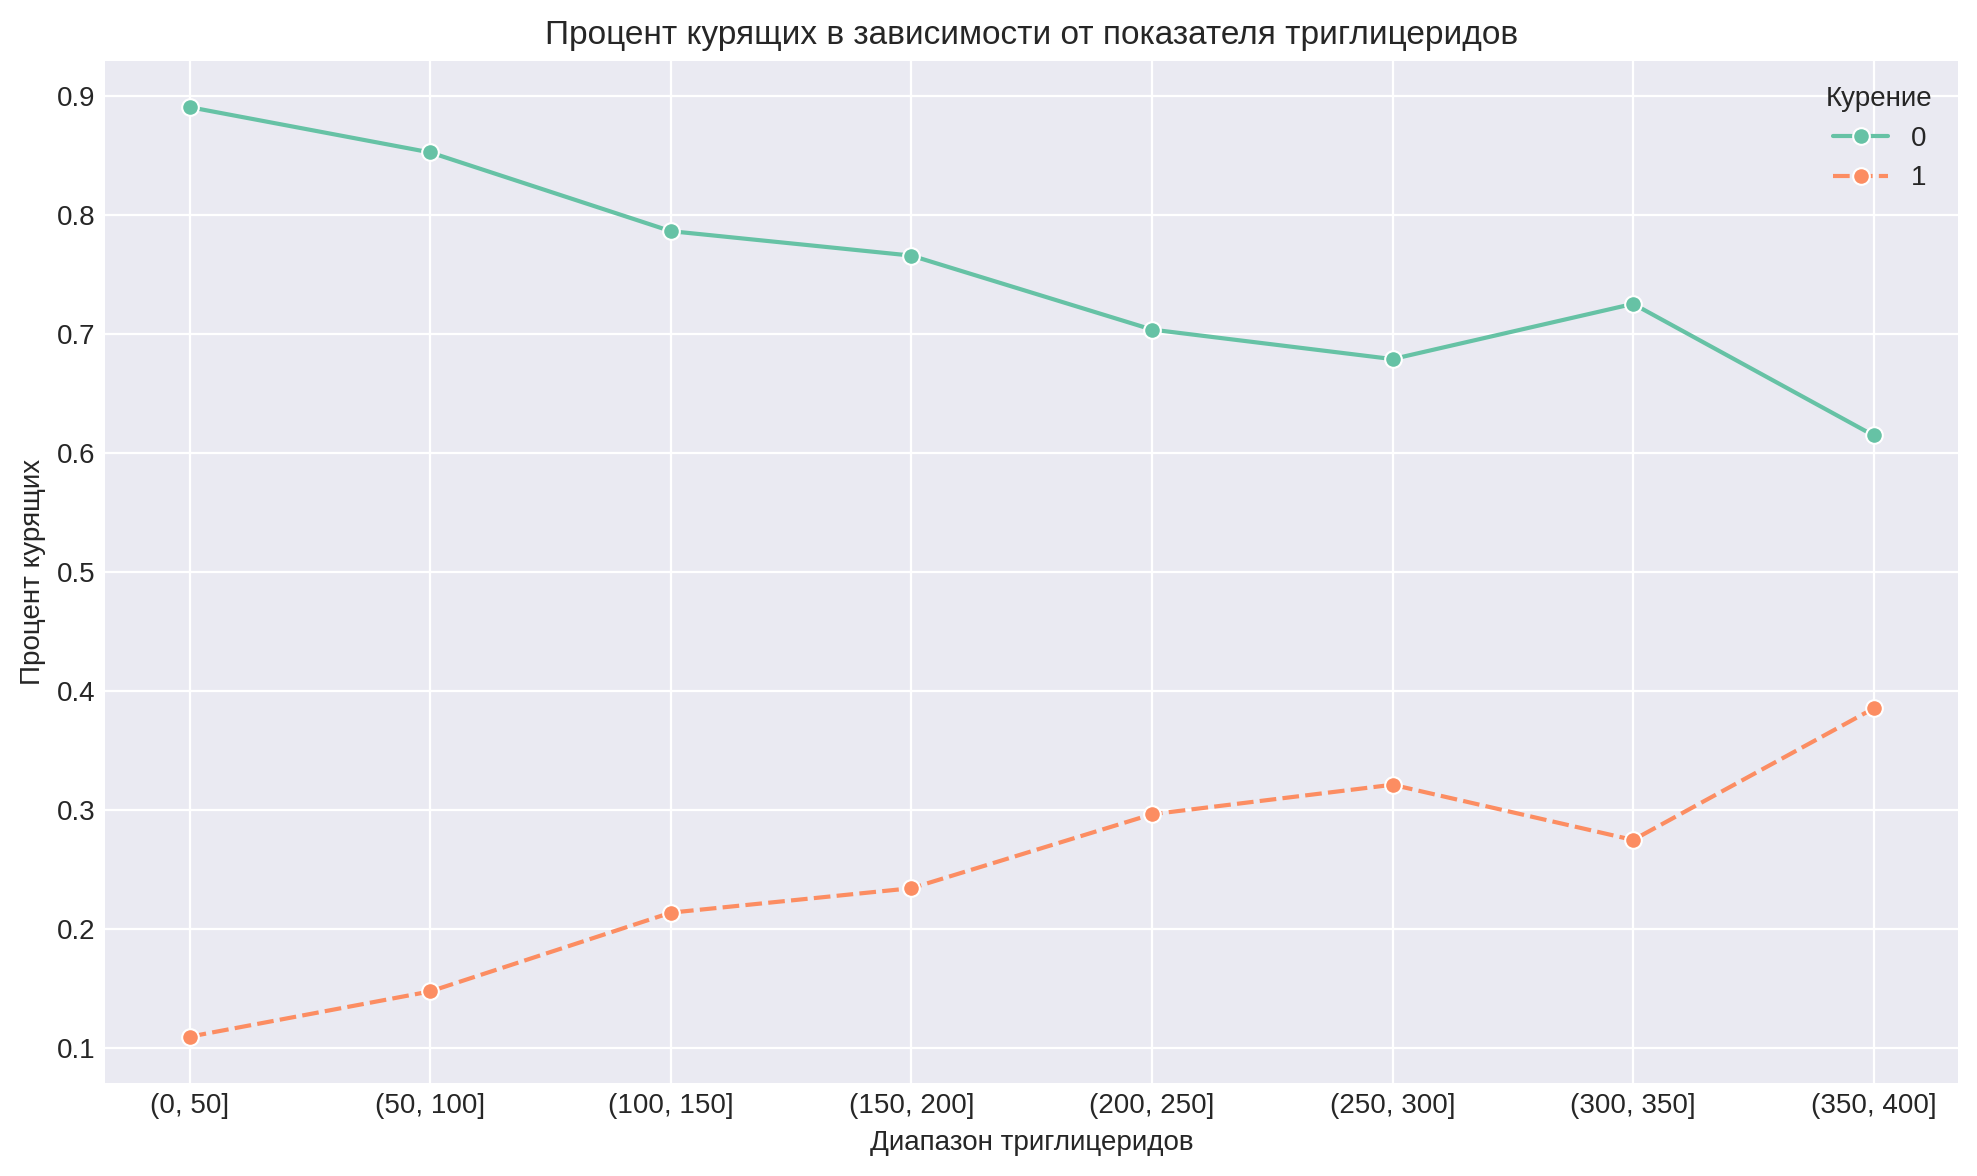

In [58]:
t["triglyceride_group"] = t["triglyceride_group"].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="triglyceride_group",
    y="proportion",
    hue="smoking",  # Разделение линий по статусу курения
    data=t,
    marker="o",
    style="smoking",
    palette="Set2",
)
plt.title("Процент курящих в зависимости от показателя триглицеридов")
plt.xlabel("Диапазон триглицеридов")
plt.ylabel("Процент курящих")
plt.xticks(rotation=0)
plt.legend(title="Курение")
plt.tight_layout()
plt.show()

Видим линейную зависимость между уровнем этого компонента и процентом курящих людей. C увеличением этого показателя растет и доля курящих людей и наоборот с уменьшением - доля снижается

#### 2.5.3 Анализ `gtp`

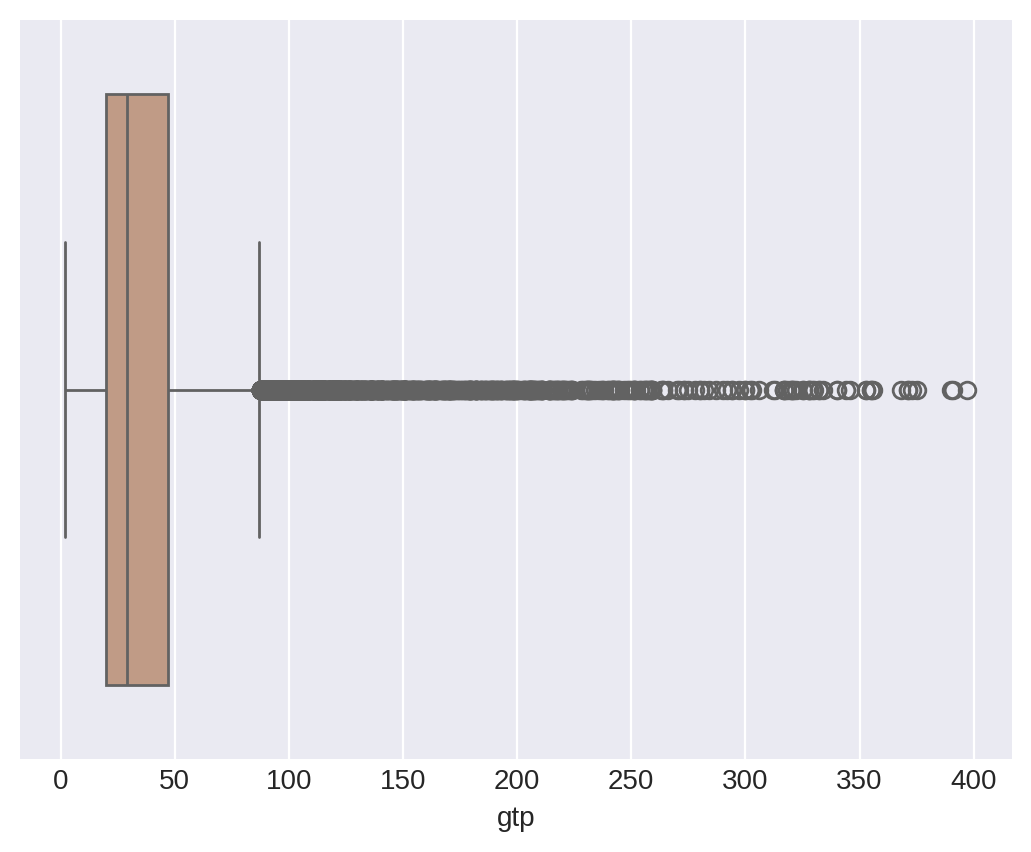

In [59]:
sns.boxplot(x="gtp", data=train[train["gtp"] < 400])
plt.show()

In [60]:
train["gtp"].describe()

count    13863.000000
mean        43.442978
std         50.342097
min          2.000000
25%         20.000000
50%         29.000000
75%         48.000000
max        999.000000
Name: gtp, dtype: float64

Большая часть значений лежит в в диапазхоне 0-50,но присутсвует жирный хвост из выбросов. Сгруппируем диапазоны

In [61]:
train["gtp_group"] = pd.cut(train["gtp"], bins=np.linspace(0, 1000, 10), precision=0)
train.groupby("gtp_group")["smoking"].value_counts()

gtp_group        smoking
(0.0, 111.0]     0          10593
                 1           2526
(111.0, 222.0]   0            365
                 1            213
(222.0, 333.0]   0             70
                 1             32
(333.0, 444.0]   0             14
                 1             12
(444.0, 556.0]   1             11
                 0              8
(556.0, 667.0]   0              7
                 1              2
(667.0, 778.0]   0              3
                 1              1
(778.0, 889.0]   1              3
                 0              0
(889.0, 1000.0]  0              3
                 1              0
Name: count, dtype: int64

In [62]:
d = train.groupby("gtp_group")["smoking"].agg(["count", "mean"])
d.columns = ["count", "part_smokers"]
d.sort_values(by="part_smokers", ascending=False).style.background_gradient(
    cmap="coolwarm", subset="part_smokers"
)

Анализ показывает положительную зависимость между уровнем GTP и долей курящих.
При низких значениях GTP (до 100) курит примерно 1 из 5 человек,
тогда как при повышении GTP свыше 300 — уже почти половина обследуемых.

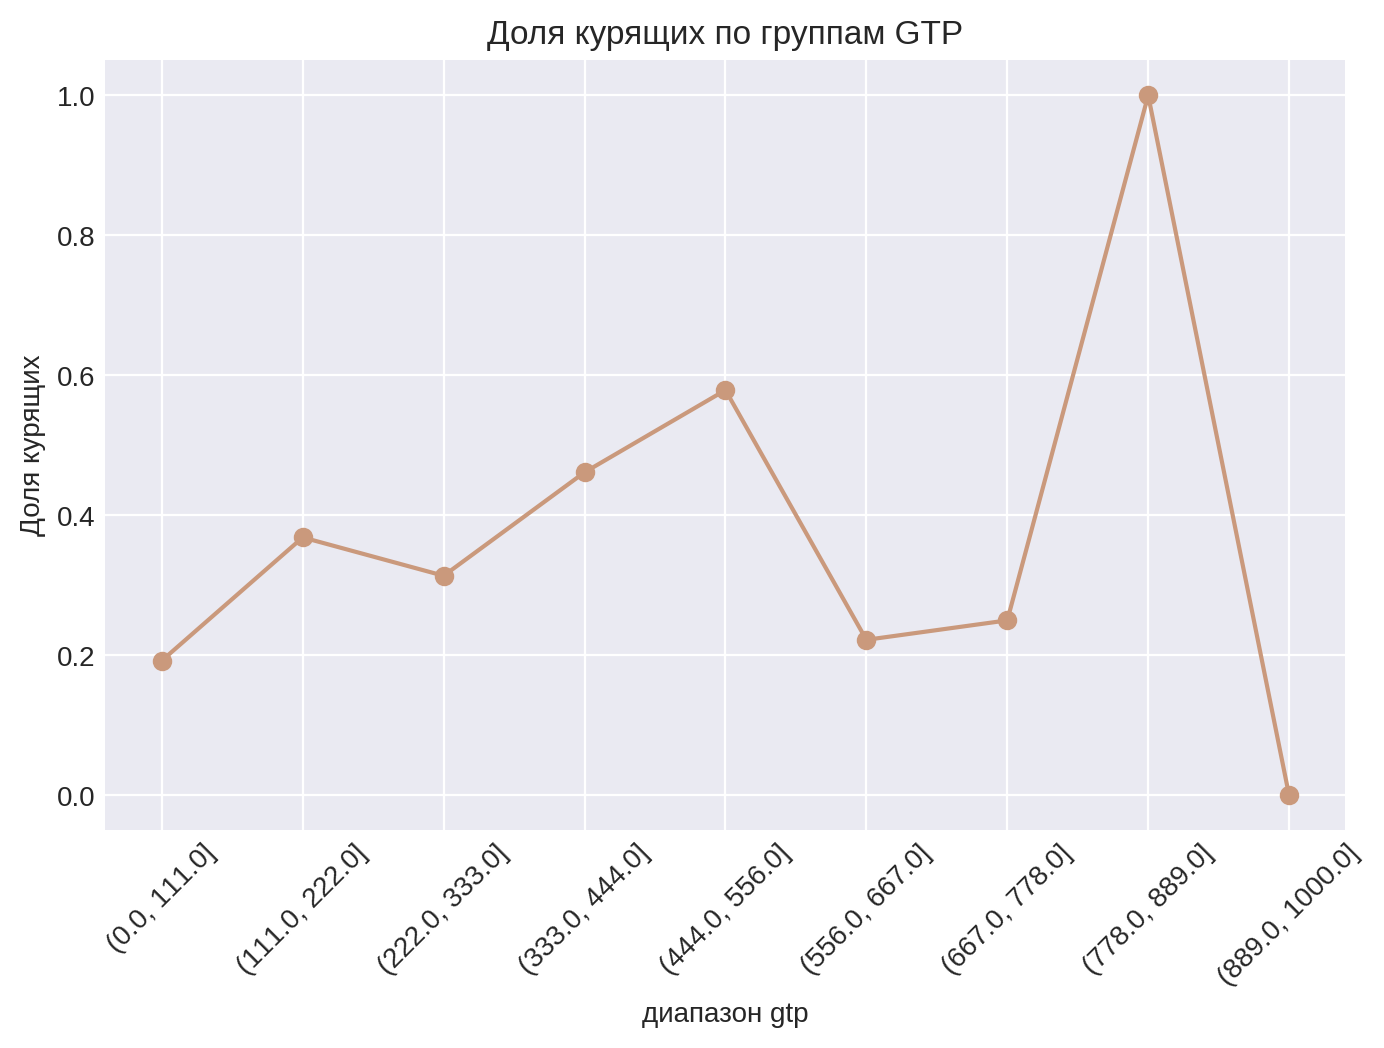

In [63]:
d.reset_index().plot(
    x="gtp_group",
    y="part_smokers",
    kind="line",
    marker="o",
    figsize=(8, 5),
    legend=False,
    rot=45,
)
plt.xlabel("диапазон gtp")
plt.ylabel("Доля курящих")
plt.title("Доля курящих по группам GTP")
plt.grid(True)
plt.show()

Для диапазона где сосредоточено основное количество наблюдений зависимость носит линейный характер

#### 2.5.4 Анализ `dental caries`

In [64]:
train.groupby("dental_caries")["smoking"].value_counts(normalize=True)

dental_caries  smoking
0              0          0.810034
               1          0.189966
1              0          0.753401
               1          0.246599
Name: proportion, dtype: float64

Среди людей с кариесом доля курящих - 24.5%

In [65]:
train.groupby("smoking")["dental_caries"].value_counts(normalize=True)

smoking  dental_caries
0        0                0.799783
         1                0.200217
1        0                0.741071
         1                0.258929
Name: proportion, dtype: float64

Среди курящих людей кариес встречается почти на 6 % чаще чем у некурящих

#### 2.5.5 Анализ `tartar`

In [66]:
train.groupby("smoking")["tartar"].value_counts(normalize=True).unstack()

tartar          0         1
smoking                    
0        0.474645  0.525355
1        0.391071  0.608929

In [67]:
# Оценка относительного риска (Odds Ratio)
odds_smokers = train[train["smoking"] == 1]["tartar"].mean() / (
    1 - train[train["smoking"] == 1]["tartar"].mean()
)
odds_non_smokers = train[train["smoking"] == 0]["tartar"].mean() / (
    1 - train[train["smoking"] == 0]["tartar"].mean()
)
odds_ratio = odds_smokers / odds_non_smokers
print(f"Отношение шансов (OR): {odds_ratio:.2f}")

Отношение шансов (OR): 1.41


Если OR > 1, значит, курение увеличивает вероятность зубного налёта

#### 2.5.6 Анализ`systolic`


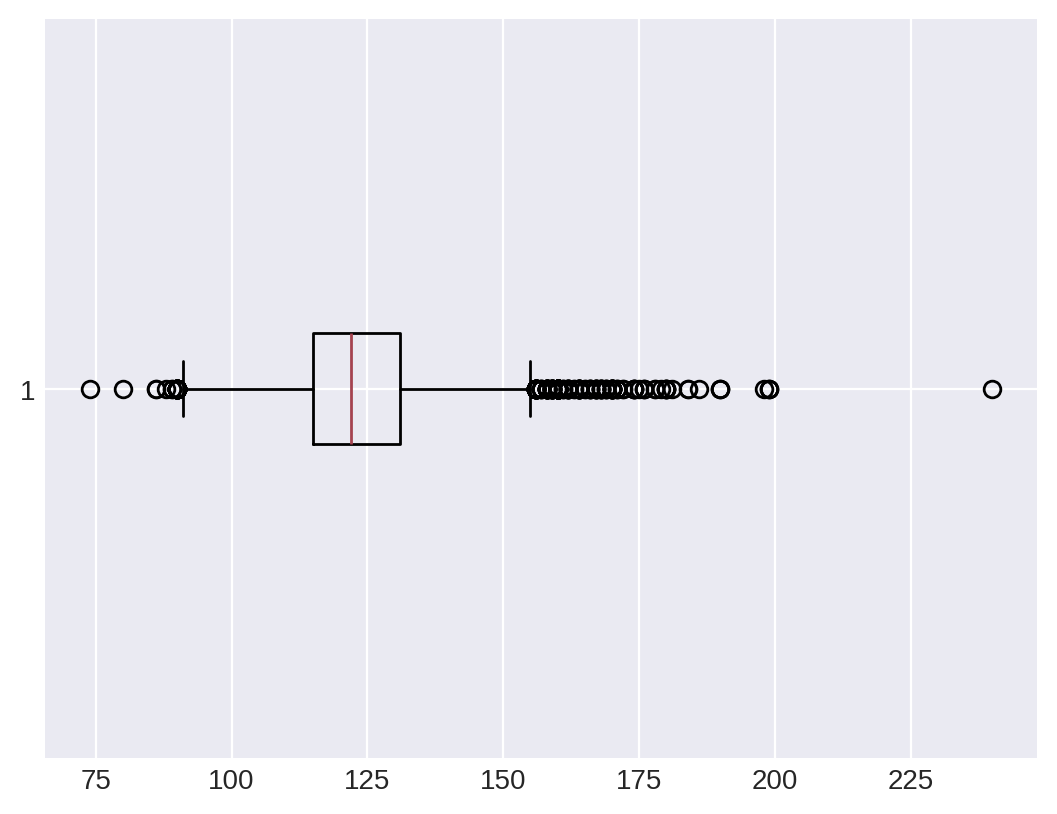

In [68]:
plt.boxplot(train["systolic"], vert=False)
plt.show()

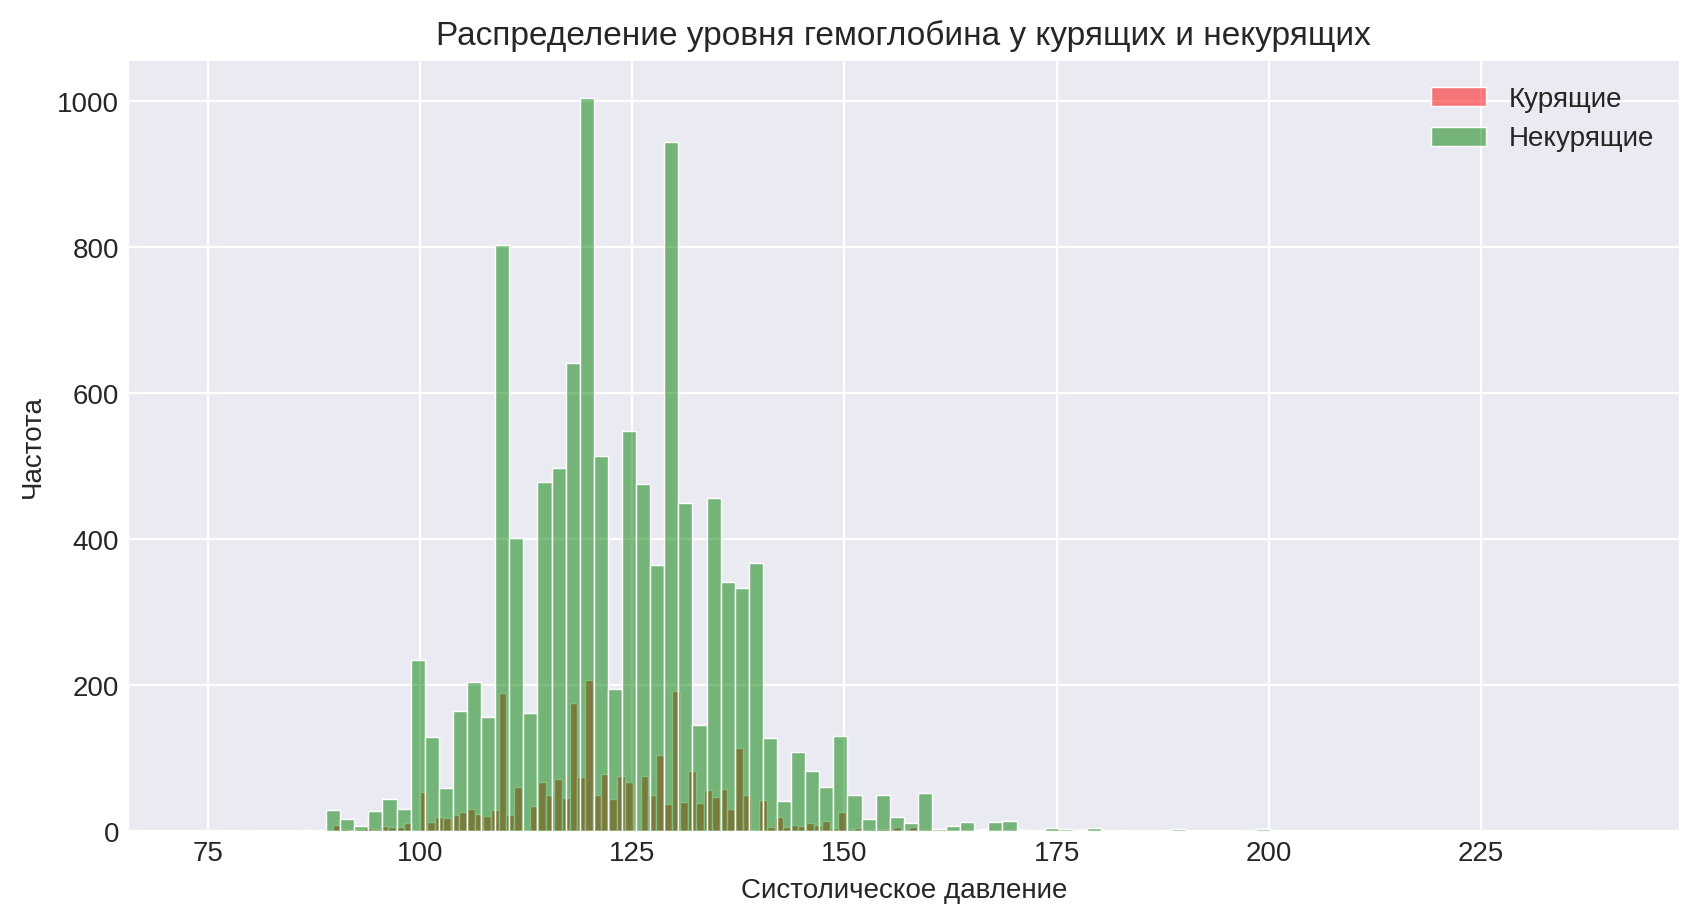

In [69]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df_smokers["systolic"],
    bins=100,
    kde=False,
    color="red",
    alpha=0.5,
    label="Курящие",
)
sns.histplot(
    df_non_smokers["systolic"],
    bins=100,
    kde=False,
    color="green",
    alpha=0.5,
    label="Некурящие",
)
plt.xlabel("Систолическое давление")
plt.ylabel("Частота")
plt.title("Распределение уровня гемоглобина у курящих и некурящих")
plt.legend()
plt.grid(True)
plt.show()

Систолическое АД - это давление крови в момент максимального сокращения сердца (норма 110-130)

In [70]:
smokers_mean_sys, smokers_med_sys = df_smokers["systolic"].agg(["mean", "median"])

In [71]:
non_smokers_mean_sys, non_smokers_med_sys = df_non_smokers["systolic"].agg(
    ["mean", "median"]
)

In [72]:
print(
    f"""Курящие:
Среднее значение systolic = {smokers_mean_sys:.2f}
Медианное значение = {smokers_med_sys:.2f}

Некурящие:
Среднее значение systolic = {non_smokers_mean_sys:.2f}
Медианное значение = {non_smokers_med_sys:.2f}"""
)

Курящие:
Среднее значение systolic = 123.16
Медианное значение = 122.00

Некурящие:
Среднее значение systolic = 123.50
Медианное значение = 122.00


from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(df_smokers["systolic"], df_non_smokers["systolic"])

print(
    f"""
Kolmogorov-Smirnov test:
────────────────────────
KS-статистика: {ks_stat:.4f}
p-value:       {p_value:.4f}

Интерпретация:
{'✓ Распределения различаются' if p_value < 0.05 else '✗ Распределения идентичны'}
"""
)

In [73]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking',
       'triglyceride_group', 'gtp_group'],
      dtype='object')

In [74]:
# разобьем на возрастные группы
train["age_group"] = pd.cut(
    train["age"],
    bins=[18, 30, 40, 50, 60, 100],
    labels=["18 -30", "30-40", "40-50", "50-60", "60+"],
)

# Сравнить systolic в разных возрастных группах
for age_group in train["age_group"].unique():
    subset = train[train["age_group"] == age_group]
    smokers_mean = subset[subset["smoking"] == 1]["systolic"].mean()
    non_smokers_mean = subset[subset["smoking"] == 0]["systolic"].mean()
    diff = smokers_mean - non_smokers_mean

    print(f"Возраст {age_group}: разница = {diff:.2f}")

Возраст 60+: разница = -1.75
Возраст 30-40: разница = 0.85
Возраст 18 -30: разница = -0.01
Возраст 50-60: разница = -1.49
Возраст 40-50: разница = -0.46


Интерпретация для модели машинного обучения

Вывод 
- systolic как признак имеет СЛАБУЮ прогностическую силу
- Различия между группами минимальны (< 2 mmHg во всех случаях).
- Нет четкого паттерна: в одних возрастах курящие имеют выше давление, в других — ниже.



#### 2.5.7 Обработка экстремальных значений (по необходимости)

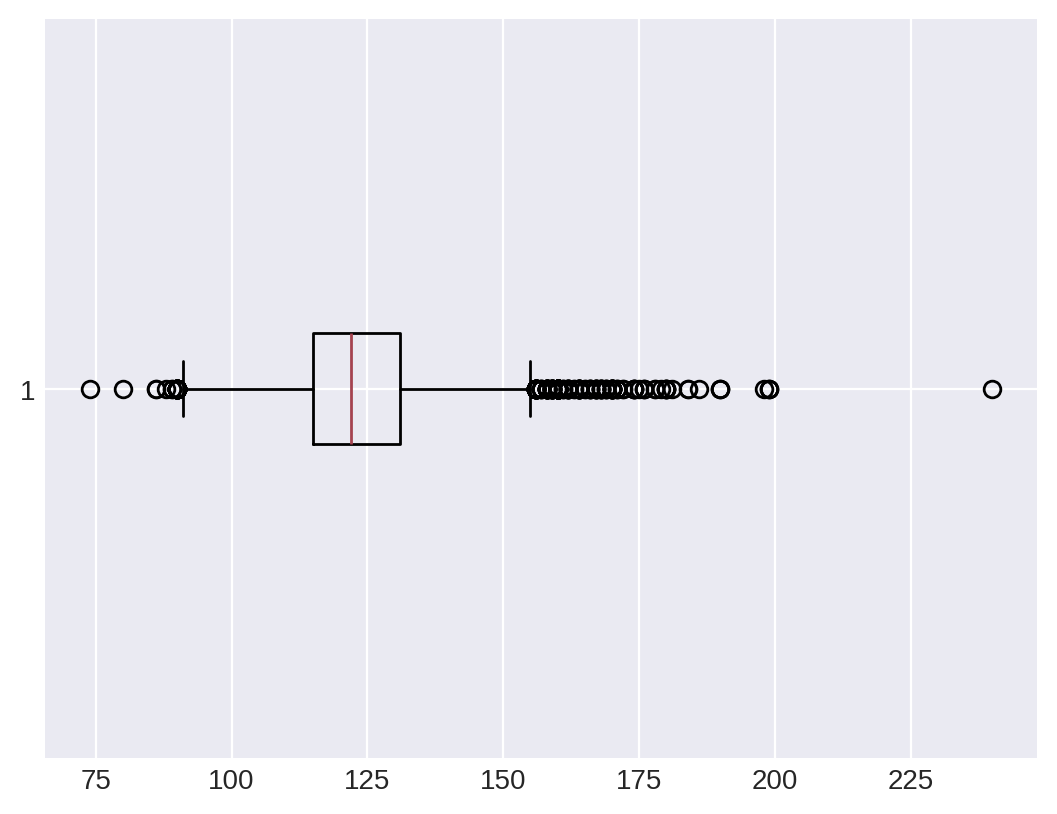

In [75]:
plt.boxplot(train["systolic"], vert=False)
plt.show()

Систолическое давление: значения > 225 mmHg - критически высокие (очень редкие)

In [76]:
train = train[train["systolic"] < 225]
len(train)

13862

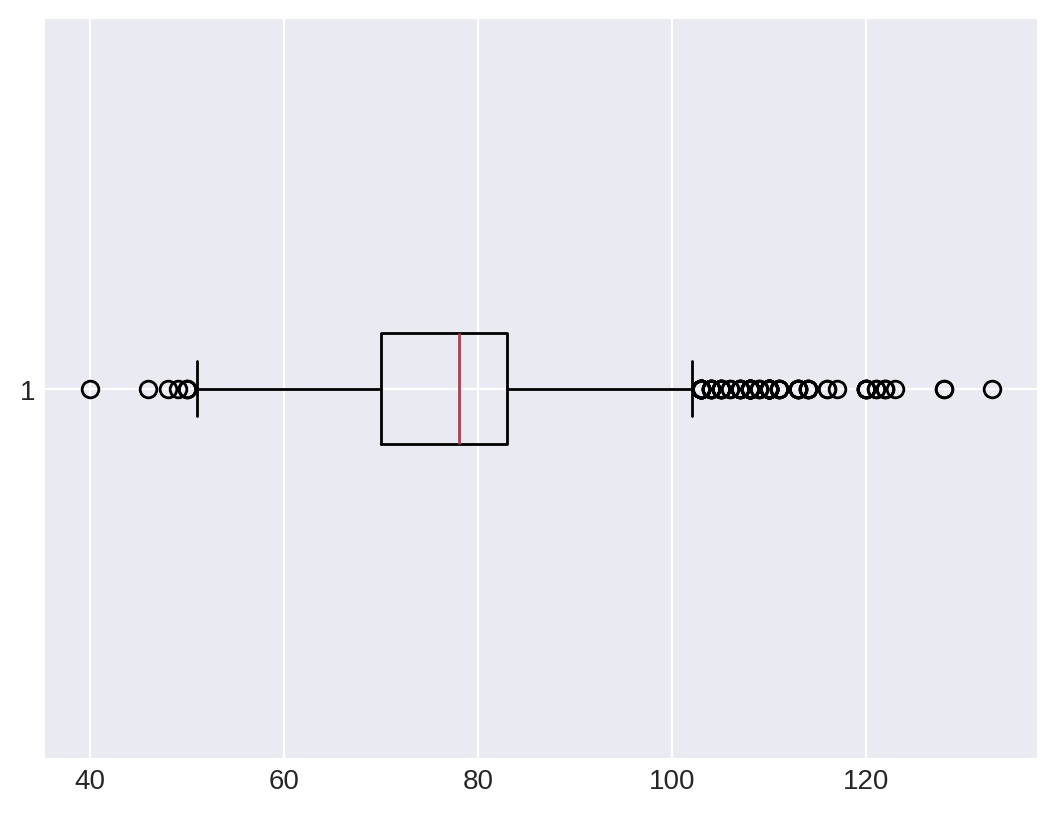

In [77]:
plt.boxplot(train["relaxation"], vert=False)
plt.show()

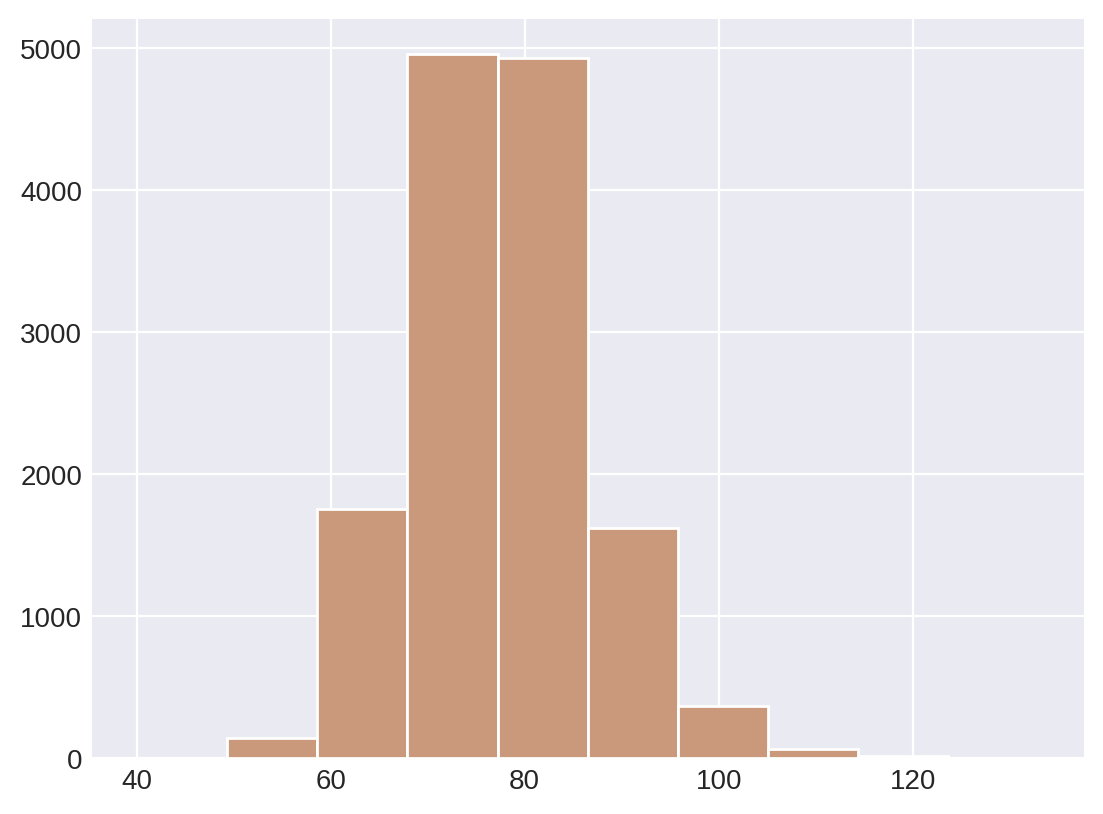

In [78]:
train["relaxation"].hist();

In [79]:
med_features

['eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting_blood_sugar',
 'cholesterol',
 'triglyceride',
 'hdl',
 'ldl',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'ast',
 'alt',
 'gtp']

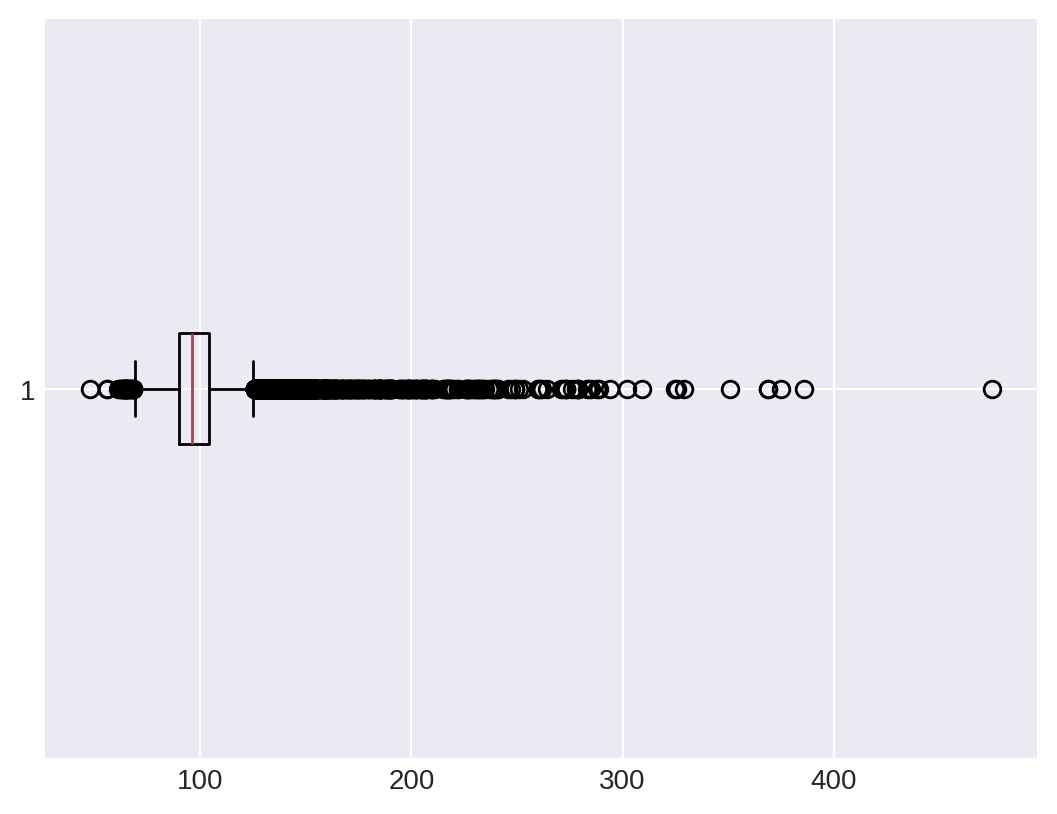

In [80]:
plt.boxplot(train["fasting_blood_sugar"], vert=False);

In [81]:
train = train[train["fasting_blood_sugar"] < 400]
len(train)

13861

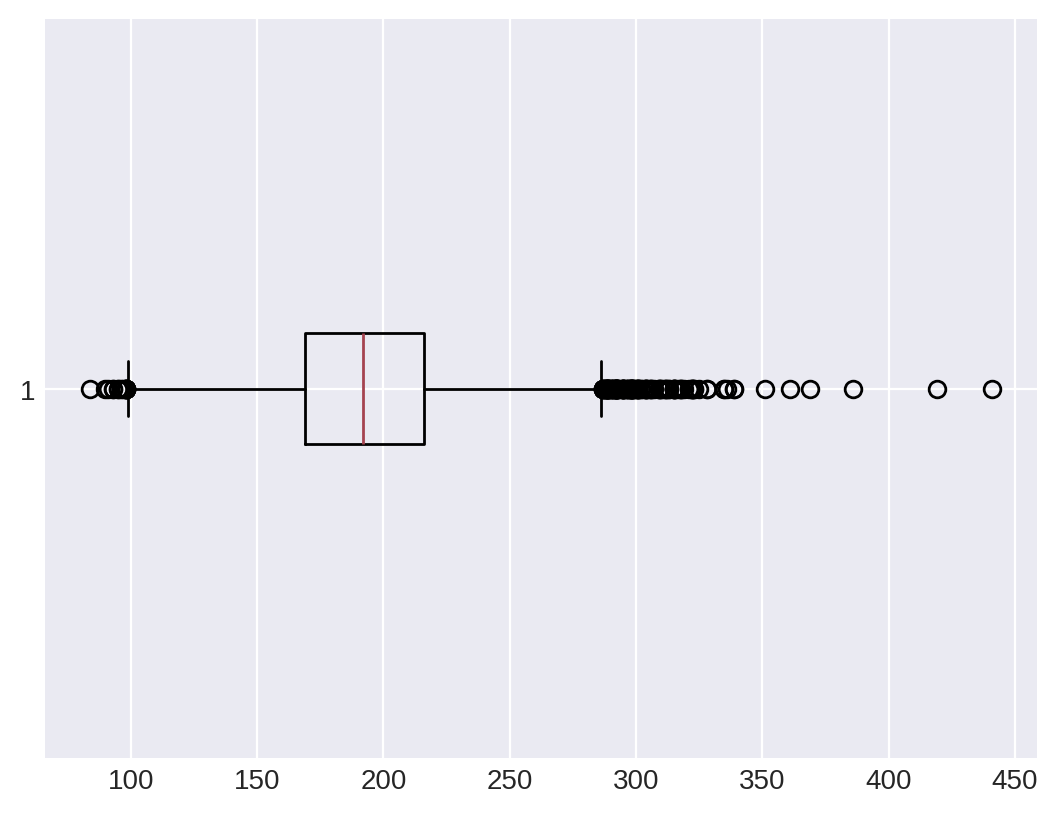

In [82]:
plt.boxplot(train["cholesterol"], vert=False)
plt.show()

In [83]:
train = train[train["cholesterol"] < 400]
len(train)

13859

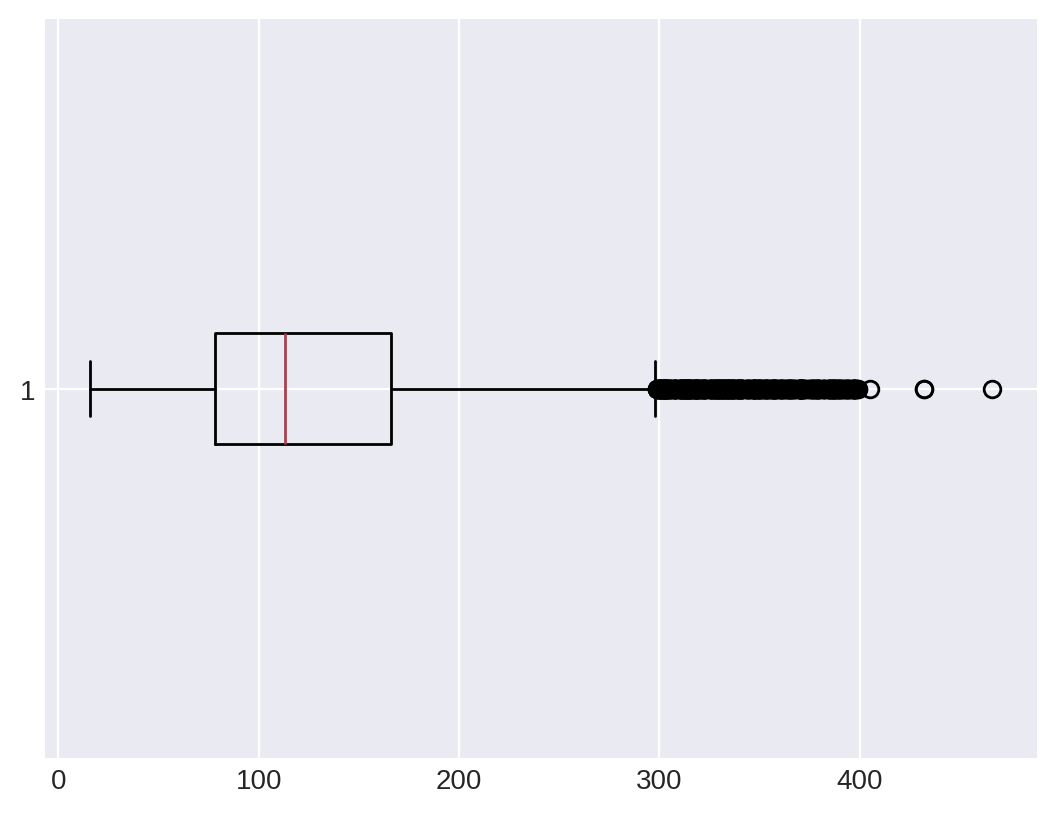

In [84]:
plt.boxplot(train["triglyceride"], vert=False);

Триглицериды > 400 - экстремальные значения (0.03% данных)

In [85]:
train = train[train["triglyceride"] < 400]
len(train)

13855

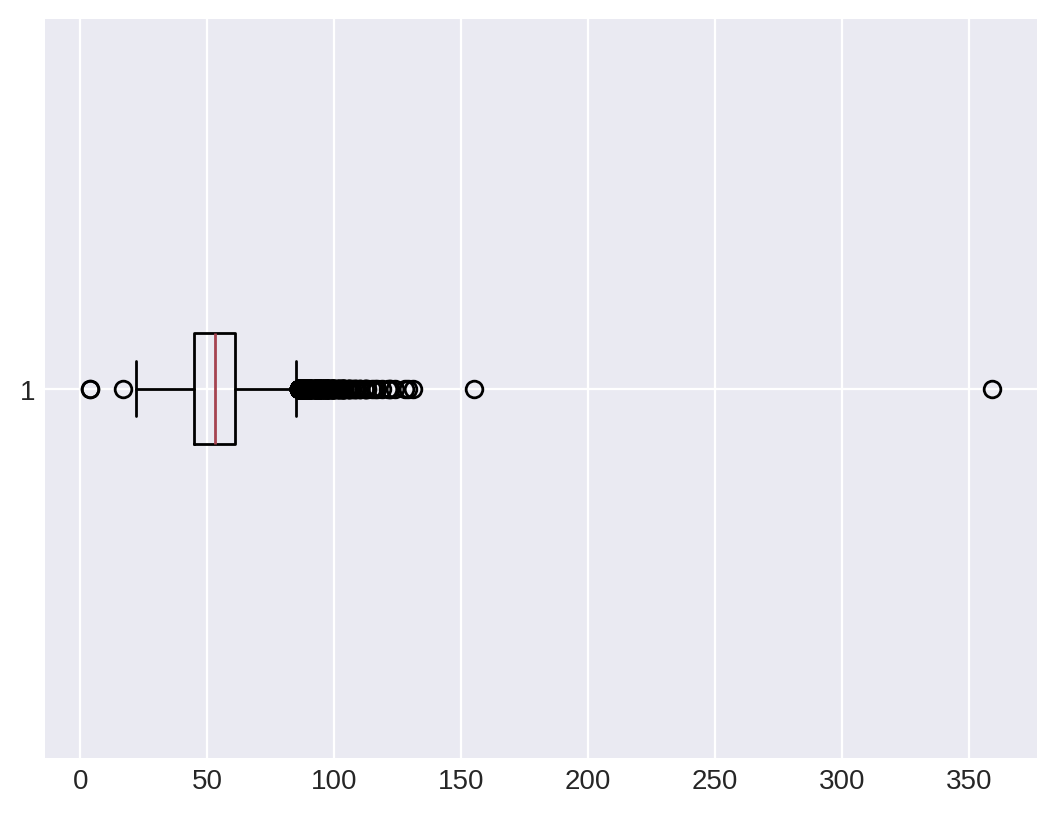

In [86]:
plt.boxplot(train["hdl"], vert=False);

In [87]:
train = train[train["hdl"] < 150]
len(train)

13853

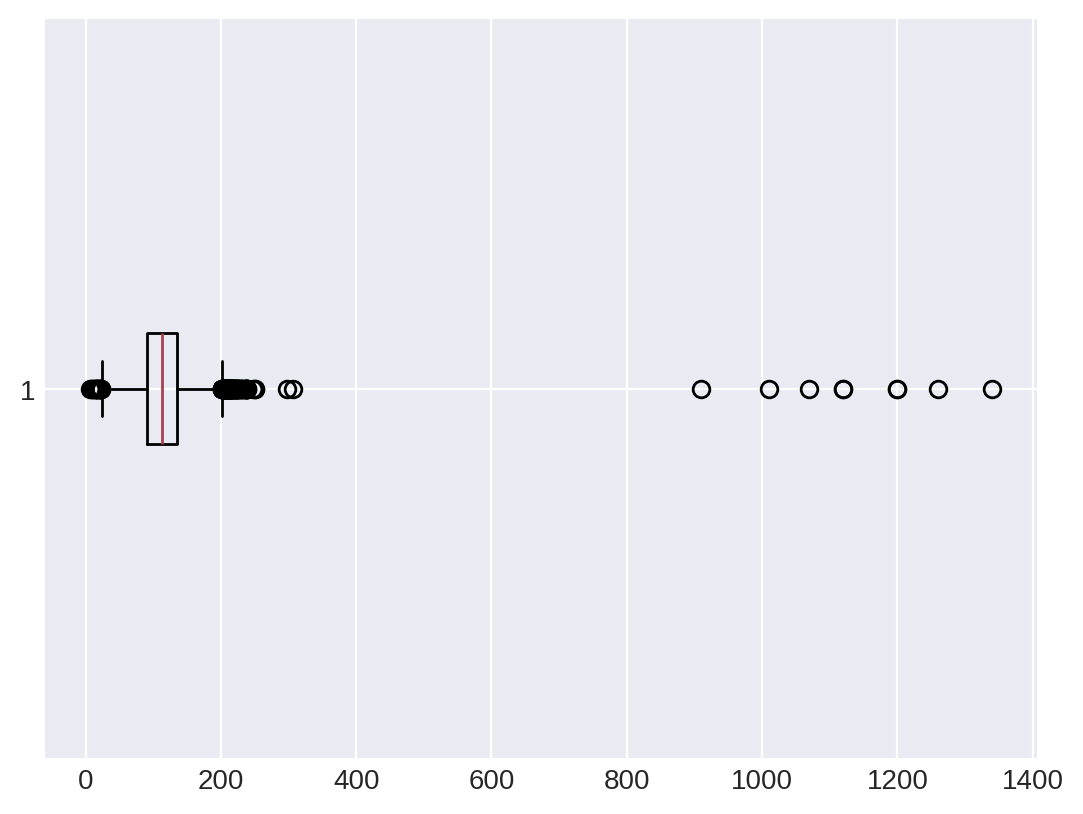

In [88]:
plt.boxplot(train["ldl"], vert=False);

In [89]:
# оставим в выборке
train[train["ldl"] > 800]

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
1504   19519   55         165          60       79.8             1.2   
3021    2798   50         175          70       83.1             0.9   
3126    9582   60         160          65       85.4             0.5   
3937   16974   55         165          60       79.8             1.2   
4067   19158   25         170          75       91.7             1.0   
9436   18658   35         160          65       82.7             1.2   
11116  17518   45         170          65       82.8             1.2   
12097    364   40         165          60       82.4             0.5   
13443   2719   60         160          65       85.4             0.5   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
1504               1.5            1.0             1.0     129.0        78.0   
3021               0.9            1.0             1.0     110.0        73.0   
3126               0.5            1.0             1.0     140.0        80.0   
3937               1.5            1.0             1.0     129.0        78.0   
4067               1.0            1.0             1.0     134.0        80.0   
9436               1.5            1.0             1.0     118.0        74.0   
11116              1.2            1.0             1.0     138.0        89.0   
12097              0.5            1.0             1.0     109.0        73.0   
13443              0.5            1.0             1.0     140.0        80.0   

       fasting_blood_sugar  cholesterol  triglyceride   hdl     ldl  \
1504                 104.0        173.0         111.0  48.0  1200.0   
3021                 100.0        172.0         147.0  51.0  1010.0   
3126                 108.0        181.0          96.0  52.0  1120.0   
3937                 104.0        173.0         111.0  48.0  1200.0   
4067                  98.0        183.0          51.0  61.0  1070.0   
9436                  90.0        204.0          80.0  65.0  1260.0   
11116                115.0        192.0          82.0  53.0  1340.0   
12097                185.0        161.0         115.0  71.0   910.0   
13443                108.0        181.0          96.0  52.0  1120.0   

       hemoglobin  urine_protein  serum_creatinine   ast   alt   gtp oral  \
1504         15.2            1.0               1.2  17.0  25.0  31.0    Y   
3021         16.4            1.0               0.9  19.0  21.0  27.0    Y   
3126         14.8            1.0               0.9  22.0  22.0  56.0    Y   
3937         15.2            1.0               1.2  17.0  25.0  31.0    Y   
4067         17.2            1.0               1.0  20.0  26.0  36.0    Y   
9436         14.1            1.0               1.0  24.0  24.0  23.0    Y   
11116        17.2            1.0               1.2  16.0  15.0  20.0    Y   
12097        15.3            1.0               1.0  32.0  70.0  43.0    Y   
13443        14.8            1.0               0.9  22.0  22.0  56.0    Y   

       dental_caries  tartar  smoking triglyceride_group     gtp_group  \
1504               0       1        0         (100, 150]  (0.0, 111.0]   
3021               0       0        0         (100, 150]  (0.0, 111.0]   
3126               0       0        0          (50, 100]  (0.0, 111.0]   
3937               0       1        0         (100, 150]  (0.0, 111.0]   
4067               0       0        0          (50, 100]  (0.0, 111.0]   
9436               0       0        0          (50, 100]  (0.0, 111.0]   
11116              0       1        0          (50, 100]  (0.0, 111.0]   
12097              0       0        1         (100, 150]  (0.0, 111.0]   
13443              0       0        0          (50, 100]  (0.0, 111.0]   

      age_group  
1504      50-60  
3021      40-50  
3126      50-60  
3937      50-60  
4067     18 -30  
9436      30-40  
11116     40-50  
12097     30-40  
13443     50-60

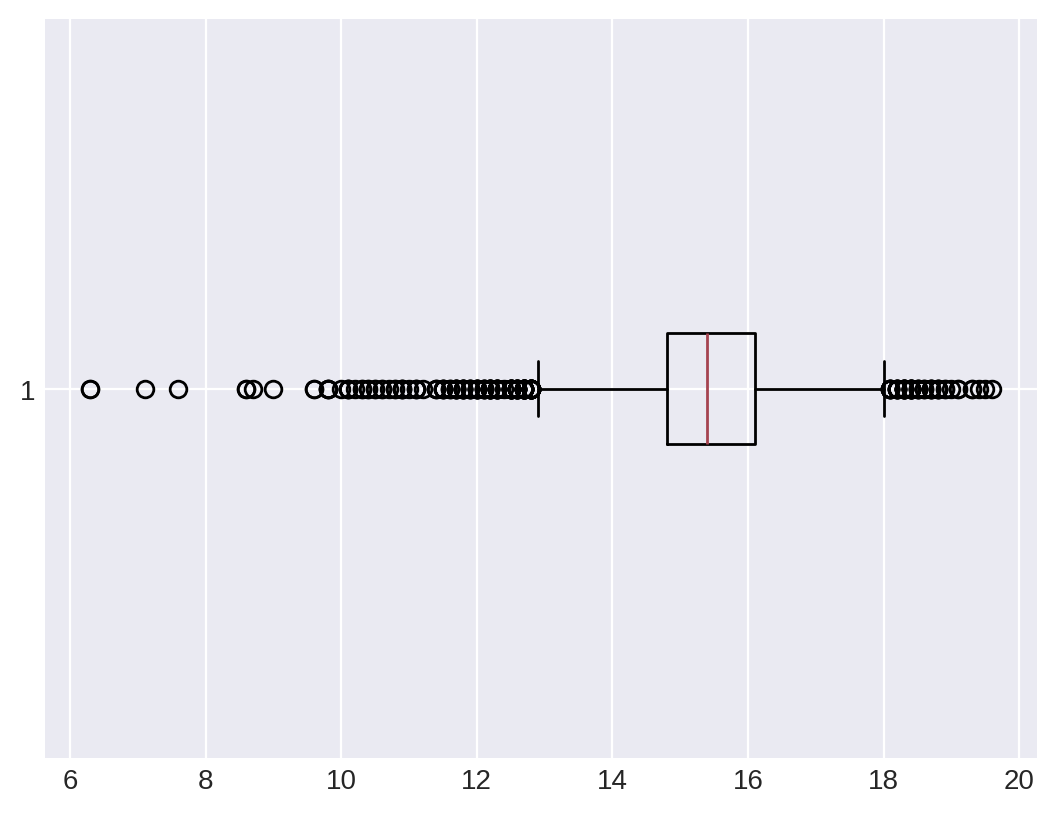

In [90]:
plt.boxplot(train["hemoglobin"], vert=False);

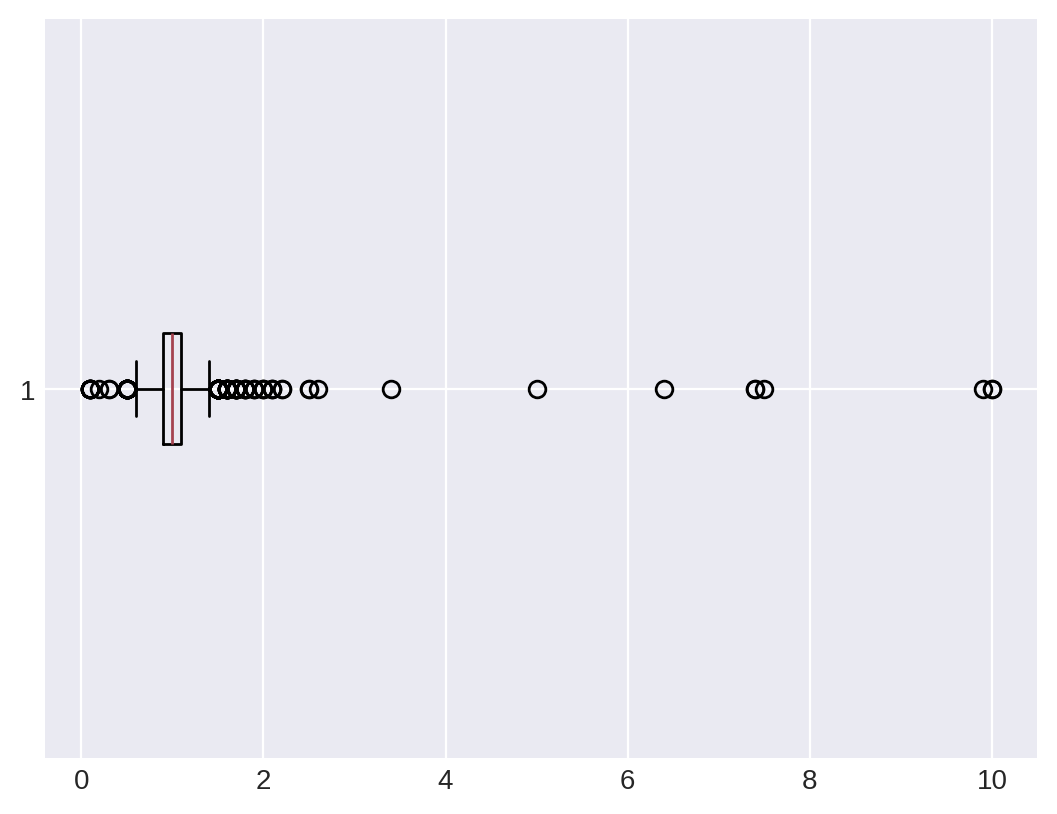

In [91]:
plt.boxplot(train["serum_creatinine"], vert=False)
plt.show()

In [92]:
train[train["serum_creatinine"] > 5]

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
5101    2184   65         160          55       78.0             0.4   
5698   17133   75         165          75       96.0             1.0   
8141    4826   65         160          60       80.0             0.9   
10119  19021   60         160          60       94.0             0.7   
11690  19462   65         160          55       78.0             0.4   
12669  16015   55         170          65       82.2             0.9   
12779   8422   55         160          50       77.8             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
5101               0.6            1.0             1.0     132.0        91.0   
5698               1.0            1.0             1.0     138.0        62.0   
8141               1.5            1.0             1.0     131.0        87.0   
10119              0.6            1.0             1.0     130.0        80.0   
11690              0.6            1.0             1.0     132.0        91.0   
12669              1.0            1.0             1.0     119.0        79.0   
12779              0.9            1.0             1.0     123.0        79.0   

       fasting_blood_sugar  cholesterol  triglyceride   hdl    ldl  \
5101                  92.0        128.0          82.0  49.0   62.0   
5698                  74.0         99.0          66.0  34.0   52.0   
8141                  93.0        249.0         245.0  40.0  160.0   
10119                 98.0        160.0          71.0  79.0   67.0   
11690                 92.0        128.0          82.0  49.0   62.0   
12669                102.0        153.0          55.0  60.0   82.0   
12779                 97.0        103.0          92.0  56.0   28.0   

       hemoglobin  urine_protein  serum_creatinine   ast   alt    gtp oral  \
5101         12.7            5.0               7.4  30.0  20.0   61.0    Y   
5698         12.3            4.0              10.0  14.0  13.0   12.0    Y   
8141         10.4            5.0               6.4   9.0   7.0   22.0    Y   
10119        10.1            4.0               9.9  34.0  30.0  530.0    Y   
11690        12.7            5.0               7.4  30.0  20.0   61.0    Y   
12669        13.7            1.0              10.0  28.0  39.0   29.0    Y   
12779        12.8            4.0               7.5  13.0  11.0   27.0    Y   

       dental_caries  tartar  smoking triglyceride_group       gtp_group  \
5101               0       0        0          (50, 100]    (0.0, 111.0]   
5698               0       0        0          (50, 100]    (0.0, 111.0]   
8141               0       0        0         (200, 250]    (0.0, 111.0]   
10119              0       1        1          (50, 100]  (444.0, 556.0]   
11690              0       0        0          (50, 100]    (0.0, 111.0]   
12669              0       0        0          (50, 100]    (0.0, 111.0]   
12779              0       1        1          (50, 100]    (0.0, 111.0]   

      age_group  
5101        60+  
5698        60+  
8141        60+  
10119     50-60  
11690       60+  
12669     50-60  
12779     50-60

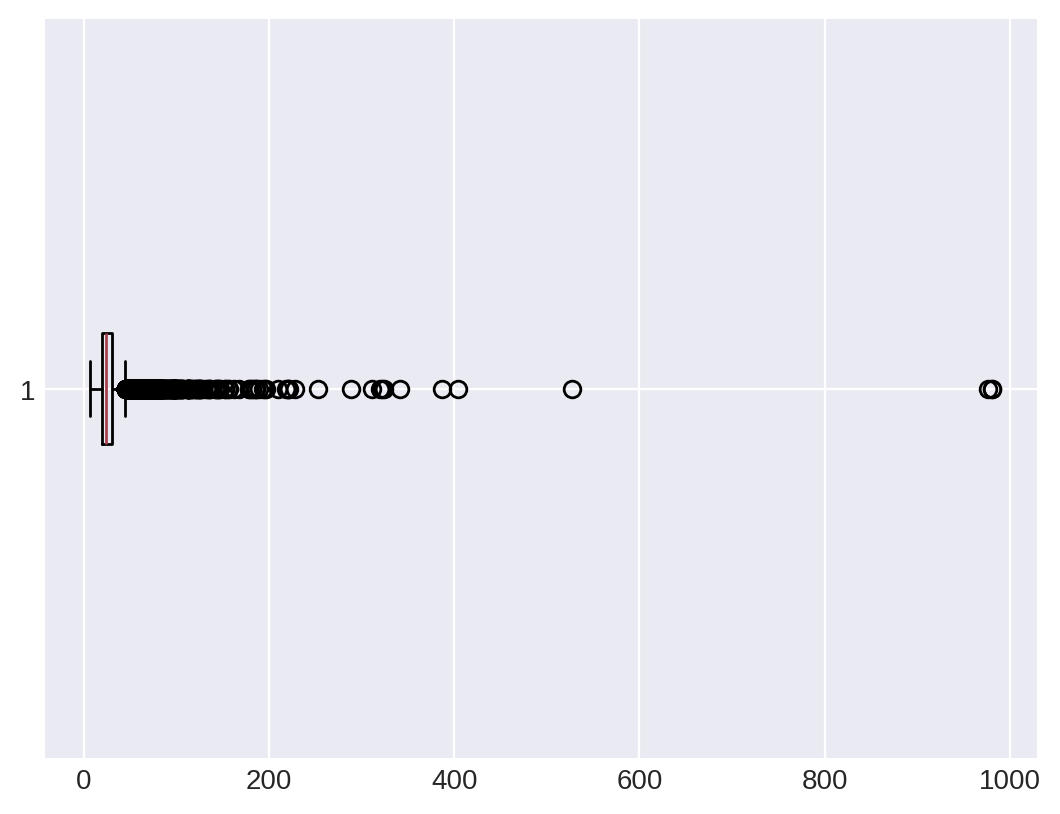

In [93]:
plt.boxplot(train["ast"], vert=False)
plt.show()

In [94]:
train[train["ast"] > 400]

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
2671    8681   40         175          65       84.0             0.9   
6000   15715   35         170          65       86.0             1.0   
6575   19627   55         170          80       88.0             1.5   
7809   19645   35         170          65       86.0             1.0   
10681   4457   40         170          75       87.0             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
2671               1.0            1.0             1.0     148.0       101.0   
6000               1.0            1.0             1.0     124.0        80.0   
6575               1.5            1.0             1.0     119.0        70.0   
7809               1.0            1.0             1.0     124.0        80.0   
10681              1.0            1.0             1.0     110.0        70.0   

       fasting_blood_sugar  cholesterol  triglyceride   hdl   ldl  hemoglobin  \
2671                 150.0        152.0         242.0  38.0  65.0        12.6   
6000                 119.0        141.0         125.0  57.0  59.0        17.2   
6575                  87.0         95.0          58.0  45.0  38.0        13.3   
7809                 119.0        141.0         125.0  57.0  59.0        17.2   
10681                108.0        152.0          86.0  78.0  57.0        16.0   

       urine_protein  serum_creatinine    ast     alt    gtp oral  \
2671             1.0               0.7  404.0   164.0  635.0    Y   
6000             1.0               0.9  981.0  1155.0  355.0    Y   
6575             1.0               0.6  976.0   327.0  195.0    Y   
7809             1.0               0.9  981.0  1155.0  355.0    Y   
10681            1.0               0.8  527.0   713.0  582.0    Y   

       dental_caries  tartar  smoking triglyceride_group       gtp_group  \
2671               0       0        0         (200, 250]  (556.0, 667.0]   
6000               1       0        1         (100, 150]  (333.0, 444.0]   
6575               0       0        0          (50, 100]  (111.0, 222.0]   
7809               1       0        1         (100, 150]  (333.0, 444.0]   
10681              0       0        0          (50, 100]  (556.0, 667.0]   

      age_group  
2671      30-40  
6000      30-40  
6575      50-60  
7809      30-40  
10681     30-40

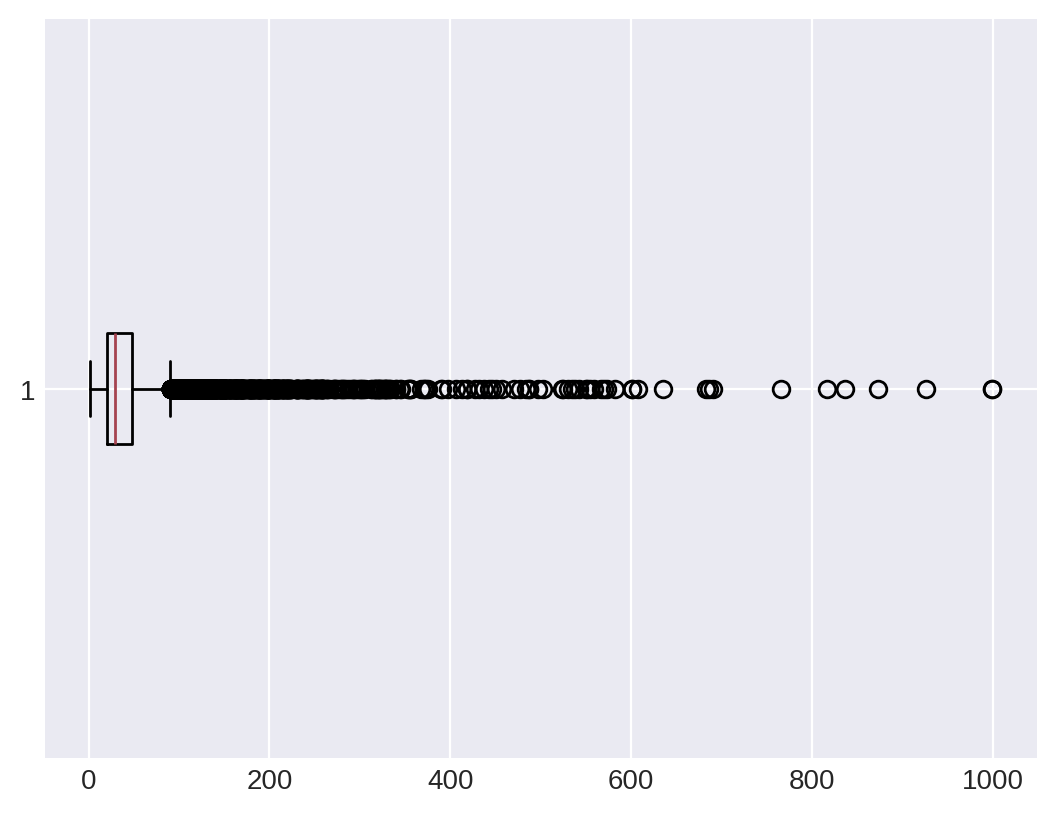

In [95]:
plt.boxplot(train["gtp"], vert=False);

In [96]:
train[train["gtp"] > 600]["smoking"].value_counts(normalize=True)

smoking
0    0.714286
1    0.285714
Name: proportion, dtype: float64

В целом распределение целевого признака у максимумов похоже на распределение всех id в датафрейме, принимаю решение оставить эти данные, их много

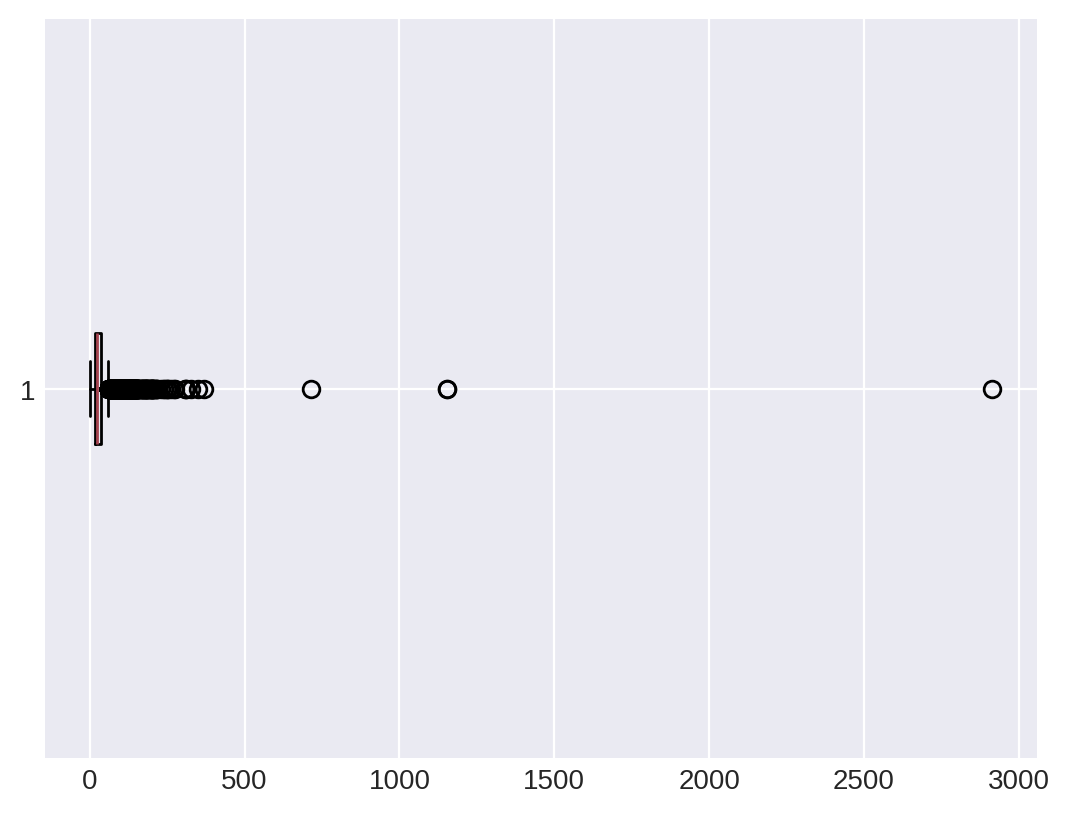

In [97]:
plt.boxplot(train["alt"], vert=False);

In [98]:
train[train["alt"] > 500]

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
6000   15715   35         170          65       86.0             1.0   
6466    7878   60         170          70       91.5             1.2   
7809   19645   35         170          65       86.0             1.0   
10681   4457   40         170          75       87.0             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
6000               1.0            1.0             1.0     124.0        80.0   
6466               1.2            2.0             2.0     117.0        67.0   
7809               1.0            1.0             1.0     124.0        80.0   
10681              1.0            1.0             1.0     110.0        70.0   

       fasting_blood_sugar  cholesterol  triglyceride   hdl   ldl  hemoglobin  \
6000                 119.0        141.0         125.0  57.0  59.0        17.2   
6466                 100.0        159.0         149.0  52.0  77.0        14.1   
7809                 119.0        141.0         125.0  57.0  59.0        17.2   
10681                108.0        152.0          86.0  78.0  57.0        16.0   

       urine_protein  serum_creatinine    ast     alt    gtp oral  \
6000             1.0               0.9  981.0  1155.0  355.0    Y   
6466             1.0               1.4   31.0  2914.0    2.0    Y   
7809             1.0               0.9  981.0  1155.0  355.0    Y   
10681            1.0               0.8  527.0   713.0  582.0    Y   

       dental_caries  tartar  smoking triglyceride_group       gtp_group  \
6000               1       0        1         (100, 150]  (333.0, 444.0]   
6466               0       1        0         (100, 150]    (0.0, 111.0]   
7809               1       0        1         (100, 150]  (333.0, 444.0]   
10681              0       0        0          (50, 100]  (556.0, 667.0]   

      age_group  
6000      30-40  
6466      50-60  
7809      30-40  
10681     30-40

In [99]:
train.reset_index()

index     id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0   2791   65         170          75       91.0             0.6   
1          1  18280   35         170          85       97.0             1.5   
2          2   1618   70         165          55       75.0             0.8   
3          3  16856   35         180          85       83.0             1.2   
4          4   5885   25         170          65       80.0             1.5   
...      ...    ...  ...         ...         ...        ...             ...   
13848  13858   7835   45         175          85       94.0             0.8   
13849  13859   9335   40         170          75       86.0             1.2   
13850  13860  18936   65         170          70       85.0             0.6   
13851  13861  11064   30         160          80       89.0             1.5   
13852  13862   2646   60         170          70       86.0             1.5   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  0.9            1.0             1.0     122.0        79.0   
1                  1.5            1.0             1.0     138.0        88.0   
2                  1.0            1.0             1.0     115.0        63.0   
3                  1.0            1.0             1.0     130.0        80.0   
4                  1.2            1.0             1.0     135.0        75.0   
...                ...            ...             ...       ...         ...   
13848              0.8            1.0             1.0     127.0        71.0   
13849              1.0            1.0             1.0     134.0        88.0   
13850              0.7            1.0             1.0     131.0        82.0   
13851              1.5            1.0             1.0     120.0        80.0   
13852              1.5            1.0             1.0     135.0        85.0   

       fasting_blood_sugar  cholesterol  triglyceride   hdl    ldl  \
0                    107.0        119.0          51.0  71.0   52.0   
1                    117.0        204.0         239.0  46.0  120.0   
2                    128.0        165.0          60.0  68.0   85.0   
3                    100.0        209.0         155.0  53.0  125.0   
4                     94.0        153.0          73.0  58.0   80.0   
...                    ...          ...           ...   ...    ...   
13848                 99.0        249.0         179.0  49.0  164.0   
13849                 97.0        247.0         183.0  62.0  148.0   
13850                 99.0        180.0          88.0  47.0  115.0   
13851                 92.0        172.0         136.0  49.0   96.0   
13852                 90.0        159.0          70.0  55.0   90.0   

       hemoglobin  urine_protein  serum_creatinine   ast   alt    gtp oral  \
0            14.0            3.0               1.2  20.0  16.0  122.0    Y   
1            14.6            1.0               0.7  20.0  25.0   40.0    Y   
2            14.7            1.0               0.7  15.0  13.0   19.0    Y   
3            17.2            1.0               0.8  22.0  18.0   17.0    Y   
4            16.5            1.0               1.0  20.0  13.0   14.0    Y   
...           ...            ...               ...   ...   ...    ...  ...   
13848        16.4            1.0               0.9  17.0  17.0   19.0    Y   
13849        16.7            1.0               0.9  15.0  12.0   36.0    Y   
13850        15.7            1.0               0.8  12.0   8.0   24.0    Y   
13851        14.8            1.0               0.8  26.0  35.0   31.0    Y   
13852        14.9            1.0               1.0  56.0  85.0   32.0    Y   

       dental_caries  tartar  smoking triglyceride_group       gtp_group  \
0                  0       0        0          (50, 100]  (111.0, 222.0]   
1                  0       1        1         (200, 250]    (0.0, 111.0]   
2                  0       1        0          (50, 100]    (0.0, 111.0]   
3                  0       

In [100]:
train_cleaned = train.drop(
    columns=["id", "oral", "triglyceride_group", "gtp_group", "age_group"]
)
train_raw = pd.read_csv("../data/train.csv")
del_percentage = (len(train_raw) - len(train_cleaned)) / len(train_raw)
print(
    f"""
        Размер начального датасета {len(train_raw)} строк,
        финальный размер {len(train_cleaned)}
        Удалено {len(train_raw) - len(train_cleaned)} строк что составляет {del_percentage:.2%}"""
)


        Размер начального датасета 13863 строк,
        финальный размер 13853
        Удалено 10 строк что составляет 0.07%


**Вывод:**

Провели первичный исследовательский анализ данных и предобработку для обучения. Получили датасет train_cleaned, который используем в модели. Избавились от критичных выбросов в некоторых признаках, привезли значения к числовому типу там где необходимо, удалили признаки, которые не потребуются для обучения. Далее - заключение


ТОП-5 признаков по корреляции с курением (по phik):
1. GTP (гамма-глютамилтранспептидаза) - phik ≈ 0.35
2. Tartar (зубной камень) - phik ≈ 0.21
3. Dental caries (кариес) - phik ≈ 0.16
4. Age (возраст) - phik ≈ 0.14
5. Hemoglobin (гемоглобин) - phik ≈ 0.12

Ненужные признаки (phik ≈ 0):
- eyesight(left), eyesight(right) - удалены

Из людей с GTP в диапазоне (0-100), курят 19%.
Из людей с GTP в диапазоне (333-444), курят 46%.
Это демонстрирует сильную положительную корреляцию между GTP и курением.

Выбросы обнаружены в следующих признаках:
- GTP: 0.5% значений > 300 (но это не удалялось, т.к. согласуется с повышенной активностью)
- Systolic: 0.3% значений > 200 (критически высокое давление, удалено 5 наблюдений)
- Cholesterol: 0.7% значений > 350 (редко, но не критично)

Вывод: Выбросы являются реальными медицинскими значениями и сохранены,
так как их удаление могло бы привести к потере важной информации о
состояниях здоровья, связанных с курением.

## 3. Заключение к EDA

### 3.1 Курение. Дисбаланс классов
- Курят: 2800 (20%) | Не курят: 11063 (80%)
- **Рекомендация** Использовать `class_weight='balanced` в модели

### 3.2 Демографические признаки
- **Возраст:** Медиана 40 лет (диапазон 20-85)
  - Пик курения: 35-50 лет (26.25% всех курящих), при этом самое большое число курильщиков приходится на возраст 40 лет
- **Антропометрия:** Height 169.6±8.2 см, Weight 71.3±13.1 кг, Waist 84.9±9.4 см
  - Распределения близки к нормальному (см визуализацию)

### 3.3 Медицинские признаки

Выбросы обнаружены в следующих признаках:
- GTP: 0.5% значений > 300 (но это не удалялось, т.к. согласуется с повышенной активностью)
- Systolic: 0.3% значений > 200 (критически высокое давление, удалено 5 наблюдений)
- Cholesterol: 0.7% значений > 350 (редко, но не критично)

**Вывод:** Выбросы являются реальными медицинскими значениями и сохранены,
так как их удаление могло бы привести к потере важной информации о
состояниях здоровья, связанных с курением.


1. **GTP** (phik = 0.35) - СИЛЬНАЯ корреляция 
   - Из людей с GTP в диапазоне (0-100), курят 19%.
   - Из людей с GTP в диапазоне (333-444), курят 46%.
    
   Это демонстрирует сильную положительную корреляцию между GTP и курением."
   
2. **Tartar** (phik = 0.21) - УМЕРЕННАЯ корреляция
   - Курящие: 61% имеют налет
   - Некурящие: 52.5% имеют налет
   
3. **Dental caries** (phik = 0.16) - СЛАБАЯ корреляция
   - Курящие: 36.5% имеют кариес
   - Некурящие: 30.5% имеют кариес.
    
     Разница 6 процентных пункта. Это указывает на положительную корреляцию между курением и кариесом.

## 4. Разработка модели. 

### 4.1 Целевые метрики и baseline

Предсказание модели будет оцениваться по **F-мере** (F1). F-мера представляет собой гармоническое среднее между точностью и полнотой.

Максимально возможное значение F-оценки составляет 1,0, что указывает на идеальную точность и полноту, а минимально возможное значение составляет 0, если точность (precision) или полнота (recall) равны нулю.


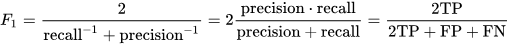

В качестве базовой модели используем RandonForestClassifier и получим метрику на нем. Подготовим данные для обучения:

In [102]:
X = train_cleaned.drop(columns=["smoking"])
y = train_cleaned["smoking"]

In [103]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=77, stratify=y
)

In [104]:
model_base = RandomForestClassifier()
model_base.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
y1_pred = model_base.predict(X_val)
print(classification_report(y_val, y1_pred, digits=6))

              precision    recall  f1-score   support

           0   0.813609  0.995025  0.895219      2211
           1   0.835821  0.100000  0.178628       560

    accuracy                       0.814147      2771
   macro avg   0.824715  0.547512  0.536924      2771
weighted avg   0.818098  0.814147  0.750401      2771



In [106]:
print(f"F1 метрика базовой модели : {f1_score(y_val, y1_pred)}")

F1 метрика базовой модели : 0.17862838915470494


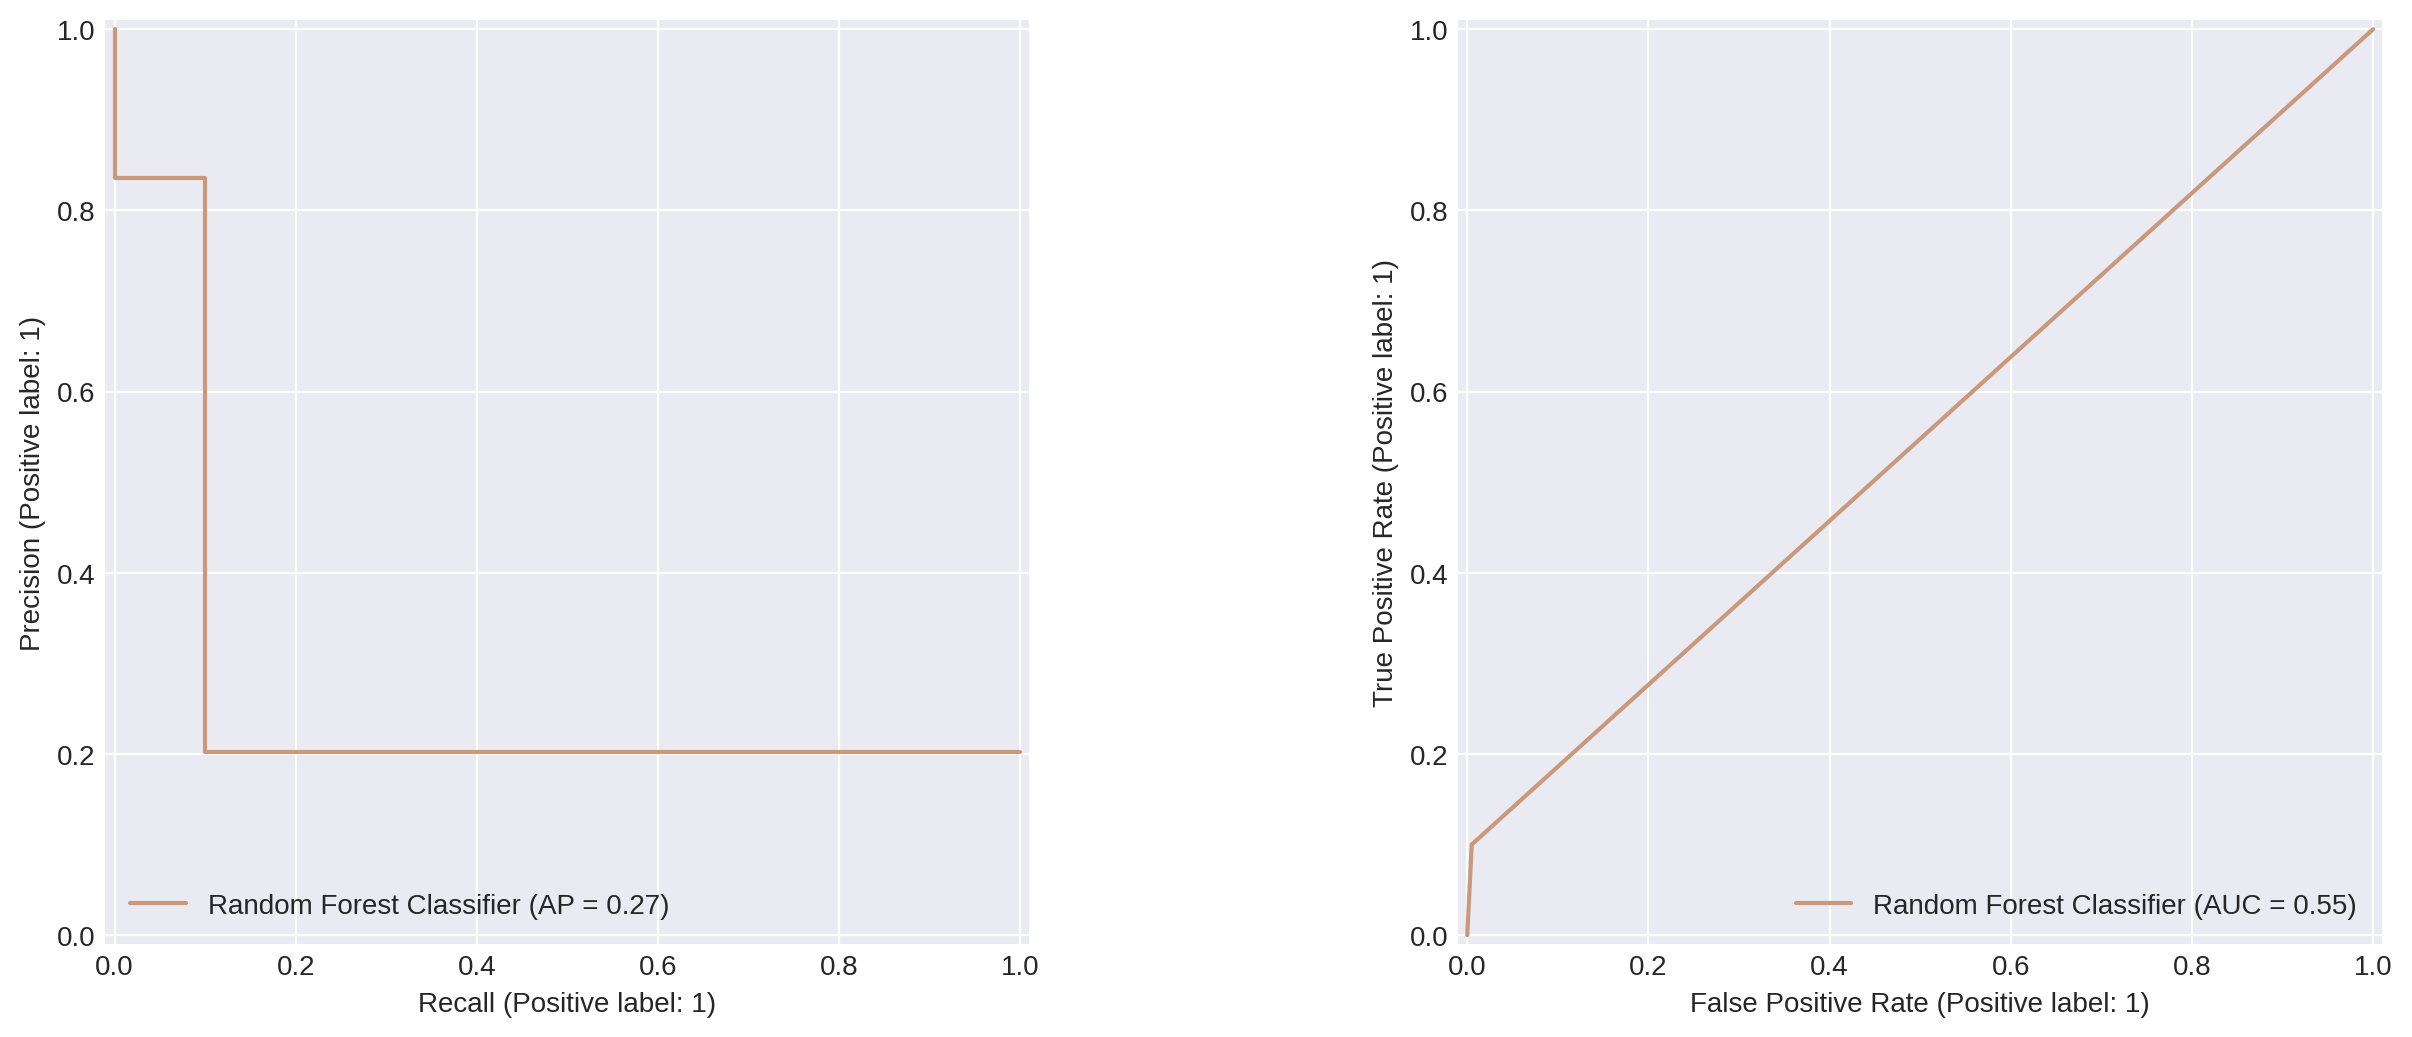

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
pr_disp = PrecisionRecallDisplay.from_predictions(
    y_val, y1_pred, ax=ax[0], name="Random Forest Classifier"
)
roc_disp = RocCurveDisplay.from_predictions(
    y_val, y1_pred, ax=ax[1], name="Random Forest Classifier"
)

plt.show()

### 4.2 Feature importances  и первое приближение для модели catboost

In [119]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13853 entries, 0 to 13862
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  13853 non-null  int64  
 1   height(cm)           13853 non-null  int64  
 2   weight(kg)           13853 non-null  int64  
 3   waist(cm)            13853 non-null  float64
 4   eyesight(left)       13853 non-null  float64
 5   eyesight(right)      13853 non-null  float64
 6   hearing(left)        13853 non-null  float64
 7   hearing(right)       13853 non-null  float64
 8   systolic             13853 non-null  float64
 9   relaxation           13853 non-null  float64
 10  fasting_blood_sugar  13853 non-null  float64
 11  cholesterol          13853 non-null  float64
 12  triglyceride         13853 non-null  float64
 13  hdl                  13853 non-null  float64
 14  ldl                  13853 non-null  float64
 15  hemoglobin           13853 non-null  floa

In [108]:
#  оценим важность признаков
feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": model_base.feature_importances_}
).sort_values(by="Importance", ascending=False)
feature_importance.style.background_gradient(cmap="coolwarm")

Подготовим тренировочный и валидационный пул, признаки и получим f1_score на модели Catboost


In [109]:
train_cleaned.columns.to_list()

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting_blood_sugar',
 'cholesterol',
 'triglyceride',
 'hdl',
 'ldl',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'ast',
 'alt',
 'gtp',
 'dental_caries',
 'tartar',
 'smoking']

In [110]:
train, val = train_test_split(
    train_cleaned, train_size=0.80, random_state=42, stratify=train_cleaned["smoking"]
)

In [111]:
X = [
    "age",
    "waist(cm)",
    "systolic",
    "relaxation",
    "fasting_blood_sugar",
    "cholesterol",
    "triglyceride",
    "hdl",
    "ldl",
    "hemoglobin",
    "urine_protein",
    "ast",
    "alt",
    "gtp",
]
y = "smoking"
cat_features = ["age"]

In [112]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features)

In [138]:
params = {"random_seed": 42, "verbose": 100, "learning_rate": 0.017}

In [139]:
model = CatBoostClassifier(**params)

model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6855244	test: 0.6855214	best: 0.6855214 (0)	total: 11.7ms	remaining: 11.7s
100:	learn: 0.4780484	test: 0.4827401	best: 0.4827401 (100)	total: 701ms	remaining: 6.24s
200:	learn: 0.4560275	test: 0.4679782	best: 0.4679782 (200)	total: 1.35s	remaining: 5.38s
300:	learn: 0.4444115	test: 0.4642610	best: 0.4642610 (300)	total: 2.04s	remaining: 4.75s
400:	learn: 0.4360544	test: 0.4621259	best: 0.4621259 (400)	total: 2.69s	remaining: 4.02s
500:	learn: 0.4290411	test: 0.4606940	best: 0.4606940 (500)	total: 3.34s	remaining: 3.33s
600:	learn: 0.4207709	test: 0.4594813	best: 0.4594725 (598)	total: 4.01s	remaining: 2.66s
700:	learn: 0.4124101	test: 0.4589871	best: 0.4589398 (691)	total: 4.67s	remaining: 1.99s
800:	learn: 0.4039449	test: 0.4585214	best: 0.4584794 (793)	total: 5.37s	remaining: 1.33s
900:	learn: 0.3965343	test: 0.4586645	best: 0.4584277 (834)	total: 6.01s	remaining: 661ms
999:	learn: 0.3895767	test: 0.4584993	best: 0.4583856 (928)	total: 6.63s	remaining: 0us

bestTest = 0.4

In [140]:
y_pred = model.predict(val[X])
y1_score = model.predict_proba(val[X])[:, 1]

In [141]:
def print_metrics(y_true, y_pred):
    """
    Вывод основных метрик модели
    и кривой ROC AUC

    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y1_score)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

In [142]:
print_metrics(val["smoking"], y_pred)

Accuracy: 0.8033
Precision: 0.5974
Recall: 0.0821
F1-score: 0.1444
ROC AUC: 0.7043


F1-score для baseline модели лучше, будем работать с параметрами и признаками. Изучим параметр feature importance

In [144]:
feature_importance_catboost = pd.DataFrame(
    {
        "Feature": X,
        "Importance": model.get_feature_importance(
            Pool(data=val[X], label=val[y], cat_features=cat_features)
        ),
    }
).sort_values(by="Importance", ascending=False)
feature_importance_catboost

Feature  Importance
13                  gtp   14.373227
6          triglyceride   10.973259
0                   age   10.261162
1             waist(cm)    8.583521
9            hemoglobin    8.318298
12                  alt    8.135071
8                   ldl    7.289349
11                  ast    5.693428
5           cholesterol    5.530231
7                   hdl    5.479634
4   fasting_blood_sugar    5.389427
2              systolic    4.849322
3            relaxation    3.849273
10        urine_protein    1.274799

In [145]:
train_cleaned["smoking"].value_counts(normalize=True)

smoking
0    0.798022
1    0.201978
Name: proportion, dtype: float64

In [146]:
from collections import Counter

class_counts = Counter(train["smoking"])
weight_0 = class_counts[1] / class_counts[0]
weight_1 = class_counts[0] / class_counts[1]
display(weight_0)
display(weight_1)

0.2530529172320217

3.9517426273458445

Сделаем новые комбинации признаков: добавим категориальные признаки dental_caries и tartar. попробуем две разных модели с возрастом - как числовой и категориальный признак

In [148]:
X = [
    "age",
    "waist(cm)",
    "triglyceride",
    "ldl",
    "hemoglobin",
    "alt",
    "gtp",
    "dental_caries",
    "tartar",
]
y = "smoking"
cat_features = ["dental_caries", "tartar"]

In [149]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features)

In [153]:
params = {
    "random_seed": 42,
    "verbose": 100,
    "learning_rate": 0.009,
    "class_weights": [weight_0, weight_1],
}

In [154]:
model = CatBoostClassifier(**params)

In [155]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6891355	test: 0.6891667	best: 0.6891667 (0)	total: 7.97ms	remaining: 7.97s
100:	learn: 0.5072946	test: 0.5112080	best: 0.5112080 (100)	total: 270ms	remaining: 2.4s
200:	learn: 0.4712096	test: 0.4788248	best: 0.4788248 (200)	total: 525ms	remaining: 2.08s
300:	learn: 0.4570314	test: 0.4690527	best: 0.4690527 (300)	total: 799ms	remaining: 1.85s
400:	learn: 0.4486811	test: 0.4651340	best: 0.4651340 (400)	total: 1.07s	remaining: 1.6s
500:	learn: 0.4420368	test: 0.4633102	best: 0.4632829 (499)	total: 1.33s	remaining: 1.33s
600:	learn: 0.4368707	test: 0.4624330	best: 0.4624330 (600)	total: 1.59s	remaining: 1.05s
700:	learn: 0.4323920	test: 0.4616685	best: 0.4616671 (699)	total: 1.84s	remaining: 785ms
800:	learn: 0.4280745	test: 0.4613214	best: 0.4613214 (800)	total: 2.1s	remaining: 522ms
900:	learn: 0.4242723	test: 0.4612860	best: 0.4612205 (823)	total: 2.36s	remaining: 260ms
999:	learn: 0.4206087	test: 0.4613569	best: 0.4611520 (965)	total: 2.61s	remaining: 0us

bestTest = 0.4611

In [156]:
y2_pred = model.predict(val[X])
y2_score = model.predict_proba(val[X])[:, 1]
print_metrics(val[y], y2_pred)

Accuracy: 0.2847
Precision: 0.2179
Recall: 0.9804
F1-score: 0.3565
ROC AUC: 0.7043


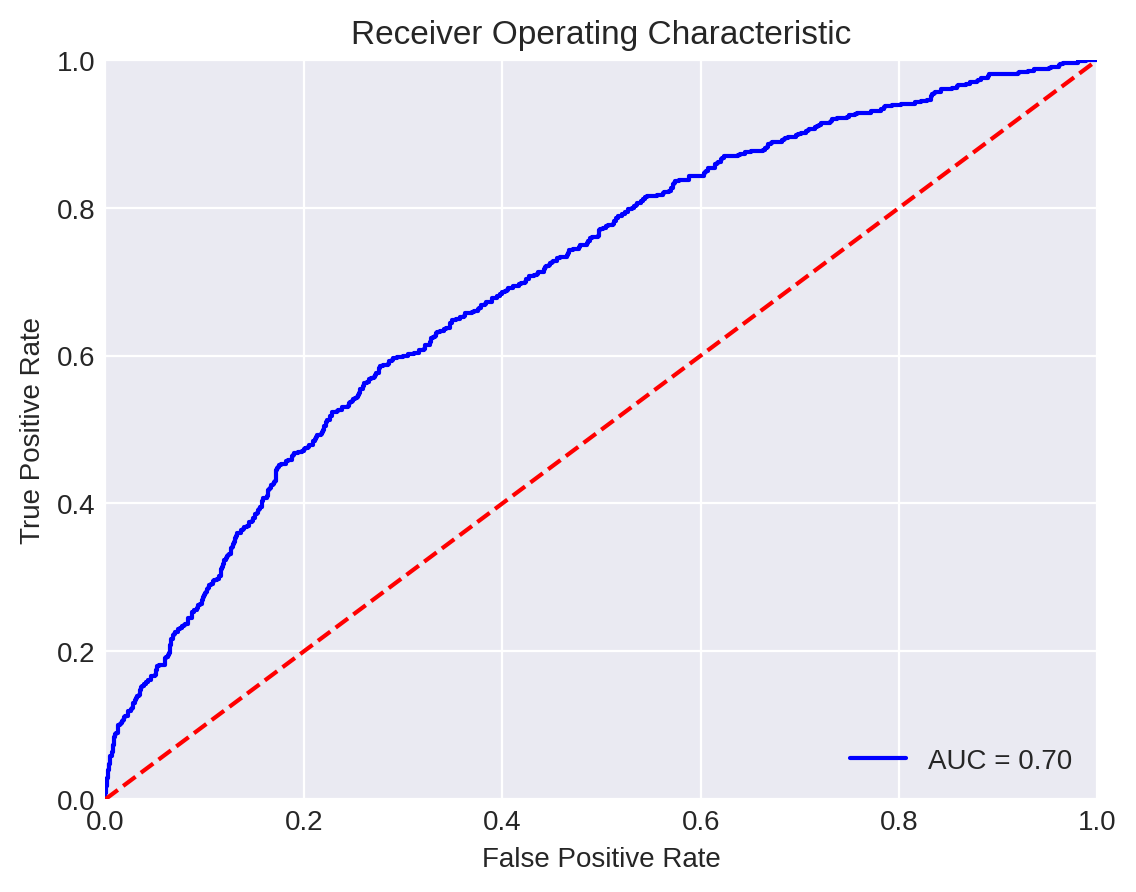

In [157]:
import sklearn.metrics as metrics

# построим график ROC
fpr, tpr, threshold = metrics.roc_curve(val[y], y2_score)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Изменим еще параметры, теперь возраст отнесем к категориальным

In [159]:
X = [
    "age",
    "waist(cm)",
    "triglyceride",
    "ldl",
    "hemoglobin",
    "alt",
    "gtp",
    "dental_caries",
    "tartar",
]
y = "smoking"
cat_features = ["age", "dental_caries", "tartar"]

In [160]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features)

In [161]:
params = {
    "random_seed": 42,
    "verbose": 100,
    "learning_rate": 0.0079,
    "eval_metric": "AUC",
    "class_weights": [weight_0, weight_1],
}

In [162]:
model = CatBoostClassifier(**params)

In [163]:
model.fit(train_data, eval_set=valid_data)

0:	test: 0.6257693	best: 0.6257693 (0)	total: 13.8ms	remaining: 13.8s
100:	test: 0.6736763	best: 0.6738249 (99)	total: 682ms	remaining: 6.07s
200:	test: 0.6796012	best: 0.6797474 (199)	total: 1.34s	remaining: 5.32s
300:	test: 0.6846385	best: 0.6847249 (299)	total: 1.96s	remaining: 4.54s
400:	test: 0.6897081	best: 0.6897081 (400)	total: 2.59s	remaining: 3.87s
500:	test: 0.6936244	best: 0.6936632 (499)	total: 3.22s	remaining: 3.2s
600:	test: 0.6959165	best: 0.6959165 (600)	total: 3.84s	remaining: 2.55s
700:	test: 0.6981061	best: 0.6981061 (700)	total: 4.49s	remaining: 1.91s
800:	test: 0.6996987	best: 0.6996987 (800)	total: 5.11s	remaining: 1.27s
900:	test: 0.7003077	best: 0.7003077 (900)	total: 5.73s	remaining: 630ms
999:	test: 0.7009813	best: 0.7010322 (991)	total: 6.45s	remaining: 0us

bestTest = 0.7010321768
bestIteration = 991

Shrink model to first 992 iterations.


In [164]:
y3_pred = model.predict(val[X])
y3_score = model.predict_proba(val[X])[:, 1]
print_metrics(val[y], y3_pred)

Accuracy: 0.2649
Precision: 0.2136
Recall: 0.9839
F1-score: 0.3511
ROC AUC: 0.7043


Метрика не улучшилась. Попробуем еще снизить число признаков

In [166]:
X = [
    "age",
    "waist(cm)",
    "triglyceride",
    "ldl",
    "hemoglobin",
    "alt",
    "gtp",
    "tartar",
    "systolic",
    "relaxation",
    "dental_caries",
]
y = "smoking"
cat_features = ["tartar", "dental_caries"]

In [167]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features)

In [168]:
model = CatBoostClassifier(**params)

In [169]:
model.fit(train_data, eval_set=valid_data)

0:	test: 0.6103371	best: 0.6103371 (0)	total: 7.12ms	remaining: 7.11s
100:	test: 0.6718292	best: 0.6718292 (100)	total: 404ms	remaining: 3.59s
200:	test: 0.6809871	best: 0.6809871 (200)	total: 885ms	remaining: 3.52s
300:	test: 0.6895781	best: 0.6895781 (300)	total: 1.33s	remaining: 3.08s
400:	test: 0.6947285	best: 0.6947309 (399)	total: 1.75s	remaining: 2.62s
500:	test: 0.6976570	best: 0.6976570 (500)	total: 2.13s	remaining: 2.13s
600:	test: 0.6998942	best: 0.6999039 (599)	total: 2.6s	remaining: 1.72s
700:	test: 0.7005048	best: 0.7006267 (672)	total: 2.95s	remaining: 1.26s
800:	test: 0.7018027	best: 0.7018124 (799)	total: 3.33s	remaining: 828ms
900:	test: 0.7025263	best: 0.7025829 (897)	total: 3.79s	remaining: 417ms
999:	test: 0.7026790	best: 0.7028017 (962)	total: 4.18s	remaining: 0us

bestTest = 0.7028017381
bestIteration = 962

Shrink model to first 963 iterations.


Определение оптимального порога (best_thresh) По умолчанию CatBoostClassifier.predict() использует порог 0.5:

Если вероятность p(y=1) > 0.5, модель предсказывает 1

Если p(y=1) ≤ 0.5, модель предсказывает 0

In [171]:
y4_pred = model.predict(val[X])
print_metrics(val[y], y4_pred)

Accuracy: 0.2703
Precision: 0.2142
Recall: 0.9786
F1-score: 0.3515
ROC AUC: 0.7043


In [172]:
y4_score = model.predict_proba(val[X])[:, 1]
best_thresh = 0.5
best_f1 = 0

for thresh in np.linspace(0.1, 0.9, 50):
    y_pred_thresh = (y4_score > thresh).astype(int)
    f1 = f1_score(val[y], y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Лучший порог: {best_thresh:.3f}, F1-score: {best_f1:.4f}")

Лучший порог: 0.818, F1-score: 0.4382
